# Homework1: Data sumarization and understanding

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Define-the-functions" data-toc-modified-id="Define-the-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define the functions</a></span></li><li><span><a href="#Turn-RAW-to-Tokens" data-toc-modified-id="Turn-RAW-to-Tokens-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Turn RAW to Tokens</a></span></li><li><span><a href="#TOP-10-MOST-COMMON-WORDS" data-toc-modified-id="TOP-10-MOST-COMMON-WORDS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TOP 10 MOST COMMON WORDS</a></span><ul class="toc-item"><li><span><a href="#For-All-Tokens" data-toc-modified-id="For-All-Tokens-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>For All Tokens</a></span></li><li><span><a href="#For-each-document" data-toc-modified-id="For-each-document-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>For each document</a></span></li></ul></li><li><span><a href="#N-Gram" data-toc-modified-id="N-Gram-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>N-Gram</a></span><ul class="toc-item"><li><span><a href="#For-all-corpus" data-toc-modified-id="For-all-corpus-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>For all corpus</a></span></li><li><span><a href="#For-each-document" data-toc-modified-id="For-each-document-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>For each document</a></span></li></ul></li><li><span><a href="#Noun-Tokens" data-toc-modified-id="Noun-Tokens-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Noun Tokens</a></span><ul class="toc-item"><li><span><a href="#Extract-Names" data-toc-modified-id="Extract-Names-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Extract Names</a></span></li><li><span><a href="#Extract-noun-phrase" data-toc-modified-id="Extract-noun-phrase-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Extract noun phrase</a></span></li><li><span><a href="#For-each-Document" data-toc-modified-id="For-each-Document-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>For each Document</a></span><ul class="toc-item"><li><span><a href="#Wordcloud-for-Nouns-in-each-document" data-toc-modified-id="Wordcloud-for-Nouns-in-each-document-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Wordcloud for Nouns in each document</a></span></li><li><span><a href="#Top-10-most-common-nouns-for-each-document" data-toc-modified-id="Top-10-most-common-nouns-for-each-document-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Top 10 most common nouns for each document</a></span></li></ul></li><li><span><a href="#For-whole-corpus" data-toc-modified-id="For-whole-corpus-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>For whole corpus</a></span></li></ul></li><li><span><a href="#Find-the-Topic" data-toc-modified-id="Find-the-Topic-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Find the Topic</a></span></li><li><span><a href="#Find-the-different-document" data-toc-modified-id="Find-the-different-document-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Find the different document</a></span></li><li><span><a href="#HERE-1" data-toc-modified-id="HERE-1-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>HERE 1</a></span></li><li><span><a href="#HERE-2" data-toc-modified-id="HERE-2-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>HERE 2</a></span></li><li><span><a href="#Checking-Only!" data-toc-modified-id="Checking-Only!-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Checking Only!</a></span></li><li><span><a href="#Check-the-folders" data-toc-modified-id="Check-the-folders-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Check the folders</a></span></li><li><span><a href="#Difference-to-topic's-vectors" data-toc-modified-id="Difference-to-topic's-vectors-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Difference to topic's vectors</a></span></li></ul></div>

## Load data

In [87]:
import numpy as np
import nltk, io, os
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [360]:
data_path = r'../../DATA/DistributedFolder/15316046_Krishnan Aditya/'


In [361]:
df_raw = pd.DataFrame([],columns=['filename','content'])

for root, directories, files in os.walk(data_path):
    for filename in files:
        _name = os.path.splitext(filename)[0]
        filepath = os.path.join(root, filename)
        f = open(filepath,"r",encoding='latin-1') 
        content = f.read()
        content = " ".join(str(content).split())
#             content = str(content).replace("\n"," ")
        pieces = {'filename': _name, 'content': (content)}
        df_raw = df_raw.append(pieces,ignore_index=True)
df_raw.head(10)

filename                                            content
0        0  UK net users leading TV downloads British TV v...
1        1  Britons fed up with net service A survey condu...
2       10  Rich pickings for hi-tech thieves Viruses, tro...
3       11  Voters flock to blog awards site Voting is und...
4       12  What high-definition will do to DVDs First it ...
5       13  Mobile games come of age The BBC News website ...
6       14  Web helps collect aid donations The web is hel...
7       15  Blogs take on the mainstream Web logs or blogs...
8       16  Bush website blocked outside US Surfers outsid...
9       17  Blogger grounded by her airline A US airline a...

## Define the functions

In [362]:
## Function to transfer the tags of POS
def transfer_tag(treebank_tag):
        if treebank_tag.startswith('j' or 'J'):
            return 'a'
        elif treebank_tag.startswith('v' or 'V'):
            return 'v'
        elif treebank_tag.startswith('n' or 'N'):
            return 'n'
        elif treebank_tag.startswith('r' or 'R'):
            return 'r'
        else:
            # As default pos in lemmatization is Noun
            return 'v'

In [363]:
## Remove number in string
import re
def rmnumber(str):
    string_no_numbers = re.sub("\d+", " ", str)
    print(string_no_numbers)

In [364]:
## Function to handle text to key words
def text_to_keys(rawtext, verbose):
    if (verbose == 1):
        print('Raw Text:' + rawtext[0:10])
        
    # First:  split text
    from nltk.tokenize import RegexpTokenizer
    pattern = r'\w+'
    tokenizer = RegexpTokenizer(pattern)
    token_words = tokenizer.tokenize(rawtext)
    if (verbose == 1):
        print('Tokens:' + str(token_words[0:10]))
    
    # Second: decapitalize
    dep_words = [word.lower() for word in token_words]
    if (verbose == 1):
        print('Decapitalized Tokens:' + str(dep_words[0:10]))
    
    # Third: lemmatization nltk
    from nltk import pos_tag
    from nltk.stem import WordNetLemmatizer
    wnl = WordNetLemmatizer()

    lemma_words = []
    for word, tag in nltk.pos_tag(dep_words):
        firstletter = tag[0].lower() # -> get the first letter of tag and put them decapitalized form
        wtag = transfer_tag(firstletter) # -> extract the word's tag (noun, verb, adverb, adjective)
        if not wtag:
            lemma_words.extend([word])
        else:
            lemma_words.extend([wnl.lemmatize(word, wtag)]) # -> get lemma for word with tag
    if (verbose == 1):
        print('Lemmas:' + str(lemma_words[0:10]))
        
    # Fouth: remove stop words
    from nltk.corpus import stopwords
    stopwords_json = {"af":["'n","aan","af","al","as","baie","by","daar","dag","dat","die","dit","een","ek","en","gaan","gesê","haar","het","hom","hulle","hy","in","is","jou","jy","kan","kom","ma","maar","met","my","na","nie","om","ons","op","saam","sal","se","sien","so","sy","te","toe","uit","van","vir","was","wat","ŉ"],"ha":["a","amma","ba","ban","ce","cikin","da","don","ga","in","ina","ita","ji","ka","ko","kuma","lokacin","ma","mai","na","ne","ni","sai","shi","su","suka","sun","ta","tafi","take","tana","wani","wannan","wata","ya","yake","yana","yi","za"],"so":["aad","albaabkii","atabo","ay","ayaa","ayee","ayuu","dhan","hadana","in","inuu","isku","jiray","jirtay","ka","kale","kasoo","ku","kuu","lakin","markii","oo","si","soo","uga","ugu","uu","waa","waxa","waxuu"],"st":["a","ba","bane","bona","e","ea","eaba","empa","ena","ha","hae","hape","ho","hore","ka","ke","la","le","li","me","mo","moo","ne","o","oa","re","sa","se","tloha","tsa","tse"],"sw":["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"],"yo":["a","an","bá","bí","bẹ̀rẹ̀","fún","fẹ́","gbogbo","inú","jù","jẹ","jẹ́","kan","kì","kí","kò","láti","lè","lọ","mi","mo","máa","mọ̀","ni","náà","ní","nígbà","nítorí","nǹkan","o","padà","pé","púpọ̀","pẹ̀lú","rẹ̀","sì","sí","sínú","ṣ","ti","tí","wà","wá","wọn","wọ́n","yìí","àti","àwọn","é","í","òun","ó","ń","ńlá","ṣe","ṣé","ṣùgbọ́n","ẹmọ́","ọjọ́","ọ̀pọ̀lọpọ̀"],"zu":["futhi","kahle","kakhulu","kanye","khona","kodwa","kungani","kusho","la","lakhe","lapho","mina","ngesikhathi","nje","phansi","phezulu","u","ukuba","ukuthi","ukuze","uma","wahamba","wakhe","wami","wase","wathi","yakhe","zakhe","zonke"],"da":["af","alle","andet","andre","at","begge","da","de","den","denne","der","deres","det","dette","dig","din","dog","du","ej","eller","en","end","ene","eneste","enhver","et","fem","fire","flere","fleste","for","fordi","forrige","fra","få","før","god","han","hans","har","hendes","her","hun","hvad","hvem","hver","hvilken","hvis","hvor","hvordan","hvorfor","hvornår","i","ikke","ind","ingen","intet","jeg","jeres","kan","kom","kommer","lav","lidt","lille","man","mand","mange","med","meget","men","mens","mere","mig","ned","ni","nogen","noget","ny","nyt","nær","næste","næsten","og","op","otte","over","på","se","seks","ses","som","stor","store","syv","ti","til","to","tre","ud","var"],"de":["Ernst","Ordnung","Schluss","a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"],"es":["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"],"et":["aga","ei","et","ja","jah","kas","kui","kõik","ma","me","mida","midagi","mind","minu","mis","mu","mul","mulle","nad","nii","oled","olen","oli","oma","on","pole","sa","seda","see","selle","siin","siis","ta","te","ära"],"fi":["aiemmin","aika","aikaa","aikaan","aikaisemmin","aikaisin","aikajen","aikana","aikoina","aikoo","aikovat","aina","ainakaan","ainakin","ainoa","ainoat","aiomme","aion","aiotte","aist","aivan","ajan","alas","alemmas","alkuisin","alkuun","alla","alle","aloitamme","aloitan","aloitat","aloitatte","aloitattivat","aloitettava","aloitettevaksi","aloitettu","aloitimme","aloitin","aloitit","aloititte","aloittaa","aloittamatta","aloitti","aloittivat","alta","aluksi","alussa","alusta","annettavaksi","annetteva","annettu","ansiosta","antaa","antamatta","antoi","aoua","apu","asia","asiaa","asian","asiasta","asiat","asioiden","asioihin","asioita","asti","avuksi","avulla","avun","avutta","edelle","edelleen","edellä","edeltä","edemmäs","edes","edessä","edestä","ehkä","ei","eikä","eilen","eivät","eli","ellei","elleivät","ellemme","ellen","ellet","ellette","emme","en","enemmän","eniten","ennen","ensi","ensimmäinen","ensimmäiseksi","ensimmäisen","ensimmäisenä","ensimmäiset","ensimmäisiksi","ensimmäisinä","ensimmäisiä","ensimmäistä","ensin","entinen","entisen","entisiä","entisten","entistä","enää","eri","erittäin","erityisesti","eräiden","eräs","eräät","esi","esiin","esillä","esimerkiksi","et","eteen","etenkin","etessa","ette","ettei","että","haikki","halua","haluaa","haluamatta","haluamme","haluan","haluat","haluatte","haluavat","halunnut","halusi","halusimme","halusin","halusit","halusitte","halusivat","halutessa","haluton","he","hei","heidän","heihin","heille","heiltä","heissä","heistä","heitä","helposti","heti","hetkellä","hieman","hitaasti","hoikein","huolimatta","huomenna","hyvien","hyviin","hyviksi","hyville","hyviltä","hyvin","hyvinä","hyvissä","hyvistä","hyviä","hyvä","hyvät","hyvää","hän","häneen","hänelle","hänellä","häneltä","hänen","hänessä","hänestä","hänet","ihan","ilman","ilmeisesti","itse","itsensä","itseään","ja","jo","johon","joiden","joihin","joiksi","joilla","joille","joilta","joissa","joista","joita","joka","jokainen","jokin","joko","joku","jolla","jolle","jolloin","jolta","jompikumpi","jonka","jonkin","jonne","joo","jopa","jos","joskus","jossa","josta","jota","jotain","joten","jotenkin","jotenkuten","jotka","jotta","jouduimme","jouduin","jouduit","jouduitte","joudumme","joudun","joudutte","joukkoon","joukossa","joukosta","joutua","joutui","joutuivat","joutumaan","joutuu","joutuvat","juuri","jälkeen","jälleen","jää","kahdeksan","kahdeksannen","kahdella","kahdelle","kahdelta","kahden","kahdessa","kahdesta","kahta","kahteen","kai","kaiken","kaikille","kaikilta","kaikkea","kaikki","kaikkia","kaikkiaan","kaikkialla","kaikkialle","kaikkialta","kaikkien","kaikkin","kaksi","kannalta","kannattaa","kanssa","kanssaan","kanssamme","kanssani","kanssanne","kanssasi","kauan","kauemmas","kaukana","kautta","kehen","keiden","keihin","keiksi","keille","keillä","keiltä","keinä","keissä","keistä","keitten","keittä","keitä","keneen","keneksi","kenelle","kenellä","keneltä","kenen","kenenä","kenessä","kenestä","kenet","kenettä","kennessästä","kenties","kerran","kerta","kertaa","keskellä","kesken","keskimäärin","ketkä","ketä","kiitos","kohti","koko","kokonaan","kolmas","kolme","kolmen","kolmesti","koska","koskaan","kovin","kuin","kuinka","kuinkan","kuitenkaan","kuitenkin","kuka","kukaan","kukin","kukka","kumpainen","kumpainenkaan","kumpi","kumpikaan","kumpikin","kun","kuten","kuuden","kuusi","kuutta","kylliksi","kyllä","kymmenen","kyse","liian","liki","lisäksi","lisää","lla","luo","luona","lähekkäin","lähelle","lähellä","läheltä","lähemmäs","lähes","lähinnä","lähtien","läpi","mahdollisimman","mahdollista","me","meidän","meille","meillä","melkein","melko","menee","meneet","menemme","menen","menet","menette","menevät","meni","menimme","menin","menit","menivät","mennessä","mennyt","menossa","mihin","mikin","miksi","mikä","mikäli","mikään","milloin","milloinkan","minne","minun","minut","minä","missä","mistä","miten","mitä","mitään","moi","molemmat","mones","monesti","monet","moni","moniaalla","moniaalle","moniaalta","monta","muassa","muiden","muita","muka","mukaan","mukaansa","mukana","mutta","muu","muualla","muualle","muualta","muuanne","muulloin","muun","muut","muuta","muutama","muutaman","muuten","myöhemmin","myös","myöskin","myöskään","myötä","ne","neljä","neljän","neljää","niiden","niin","niistä","niitä","noin","nopeammin","nopeasti","nopeiten","nro","nuo","nyt","näiden","näin","näissä","näissähin","näissälle","näissältä","näissästä","näitä","nämä","ohi","oikea","oikealla","oikein","ole","olemme","olen","olet","olette","oleva","olevan","olevat","oli","olimme","olin","olisi","olisimme","olisin","olisit","olisitte","olisivat","olit","olitte","olivat","olla","olleet","olli","ollut","oma","omaa","omaan","omaksi","omalle","omalta","oman","omassa","omat","omia","omien","omiin","omiksi","omille","omilta","omissa","omista","on","onkin","onko","ovat","paikoittain","paitsi","pakosti","paljon","paremmin","parempi","parhaillaan","parhaiten","perusteella","peräti","pian","pieneen","pieneksi","pienelle","pienellä","pieneltä","pienempi","pienestä","pieni","pienin","puolesta","puolestaan","päälle","runsaasti","saakka","sadam","sama","samaa","samaan","samalla","samallalta","samallassa","samallasta","saman","samat","samoin","sata","sataa","satojen","se","seitsemän","sekä","sen","seuraavat","siellä","sieltä","siihen","siinä","siis","siitä","sijaan","siksi","silloin","sillä","silti","sinne","sinua","sinulle","sinulta","sinun","sinussa","sinusta","sinut","sinä","sisäkkäin","sisällä","siten","sitten","sitä","ssa","sta","suoraan","suuntaan","suuren","suuret","suuri","suuria","suurin","suurten","taa","taas","taemmas","tahansa","tai","takaa","takaisin","takana","takia","tapauksessa","tarpeeksi","tavalla","tavoitteena","te","tietysti","todella","toinen","toisaalla","toisaalle","toisaalta","toiseen","toiseksi","toisella","toiselle","toiselta","toisemme","toisen","toisensa","toisessa","toisesta","toista","toistaiseksi","toki","tosin","tuhannen","tuhat","tule","tulee","tulemme","tulen","tulet","tulette","tulevat","tulimme","tulin","tulisi","tulisimme","tulisin","tulisit","tulisitte","tulisivat","tulit","tulitte","tulivat","tulla","tulleet","tullut","tuntuu","tuo","tuolla","tuolloin","tuolta","tuonne","tuskin","tykö","tähän","tällä","tällöin","tämä","tämän","tänne","tänä","tänään","tässä","tästä","täten","tätä","täysin","täytyvät","täytyy","täällä","täältä","ulkopuolella","usea","useasti","useimmiten","usein","useita","uudeksi","uudelleen","uuden","uudet","uusi","uusia","uusien","uusinta","uuteen","uutta","vaan","vahemmän","vai","vaiheessa","vaikea","vaikean","vaikeat","vaikeilla","vaikeille","vaikeilta","vaikeissa","vaikeista","vaikka","vain","varmasti","varsin","varsinkin","varten","vasen","vasenmalla","vasta","vastaan","vastakkain","vastan","verran","vielä","vierekkäin","vieressä","vieri","viiden","viime","viimeinen","viimeisen","viimeksi","viisi","voi","voidaan","voimme","voin","voisi","voit","voitte","voivat","vuoden","vuoksi","vuosi","vuosien","vuosina","vuotta","vähemmän","vähintään","vähiten","vähän","välillä","yhdeksän","yhden","yhdessä","yhteen","yhteensä","yhteydessä","yhteyteen","yhtä","yhtäälle","yhtäällä","yhtäältä","yhtään","yhä","yksi","yksin","yksittäin","yleensä","ylemmäs","yli","ylös","ympäri","älköön","älä"],"fr":["a","abord","absolument","afin","ah","ai","aie","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aujourd","aujourd'hui","aupres","auquel","aura","auraient","aurait","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","avons","ayant","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","dès","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","est","et","etant","etc","etre","eu","euh","eux","eux-mêmes","exactement","excepté","extenso","exterieur","f","fais","faisaient","faisant","fait","façon","feront","fi","flac","floc","font","g","gens","h","ha","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","minimale","moi","moi-meme","moi-même","moindres","moins","mon","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","plein","plouf","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","seraient","serait","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","souvent","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","superpose","sur","surtout","t","ta","tac","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","été","être","ô"],"hr":["a","ako","ali","bi","bih","bila","bili","bilo","bio","bismo","biste","biti","bumo","da","do","duž","ga","hoće","hoćemo","hoćete","hoćeš","hoću","i","iako","ih","ili","iz","ja","je","jedna","jedne","jedno","jer","jesam","jesi","jesmo","jest","jeste","jesu","jim","joj","još","ju","kada","kako","kao","koja","koje","koji","kojima","koju","kroz","li","me","mene","meni","mi","mimo","moj","moja","moje","mu","na","nad","nakon","nam","nama","nas","naš","naša","naše","našeg","ne","nego","neka","neki","nekog","neku","nema","netko","neće","nećemo","nećete","nećeš","neću","nešto","ni","nije","nikoga","nikoje","nikoju","nisam","nisi","nismo","niste","nisu","njega","njegov","njegova","njegovo","njemu","njezin","njezina","njezino","njih","njihov","njihova","njihovo","njim","njima","njoj","nju","no","o","od","odmah","on","ona","oni","ono","ova","pa","pak","po","pod","pored","prije","s","sa","sam","samo","se","sebe","sebi","si","smo","ste","su","sve","svi","svog","svoj","svoja","svoje","svom","ta","tada","taj","tako","te","tebe","tebi","ti","to","toj","tome","tu","tvoj","tvoja","tvoje","u","uz","vam","vama","vas","vaš","vaša","vaše","već","vi","vrlo","za","zar","će","ćemo","ćete","ćeš","ću","što"],"hu":["a","abba","abban","abból","addig","ahhoz","ahogy","ahol","aki","akik","akkor","akár","alapján","alatt","alatta","alattad","alattam","alattatok","alattuk","alattunk","alá","alád","alájuk","alám","alánk","alátok","alól","alóla","alólad","alólam","alólatok","alóluk","alólunk","amely","amelybol","amelyek","amelyekben","amelyeket","amelyet","amelyik","amelynek","ami","amikor","amit","amolyan","amott","amíg","annak","annál","arra","arról","attól","az","aznap","azok","azokat","azokba","azokban","azokból","azokhoz","azokig","azokkal","azokká","azoknak","azoknál","azokon","azokra","azokról","azoktól","azokért","azon","azonban","azonnal","azt","aztán","azután","azzal","azzá","azért","bal","balra","ban","be","belé","beléd","beléjük","belém","belénk","belétek","belül","belőle","belőled","belőlem","belőletek","belőlük","belőlünk","ben","benne","benned","bennem","bennetek","bennük","bennünk","bár","bárcsak","bármilyen","búcsú","cikk","cikkek","cikkeket","csak","csakhogy","csupán","de","dehogy","e","ebbe","ebben","ebből","eddig","egy","egyebek","egyebet","egyedül","egyelőre","egyes","egyet","egyetlen","egyik","egymás","egyre","egyszerre","egyéb","együtt","egész","egészen","ehhez","ekkor","el","eleinte","ellen","ellenes","elleni","ellenére","elmondta","első","elsők","elsősorban","elsőt","elé","eléd","elég","eléjük","elém","elénk","elétek","elő","előbb","elől","előle","előled","előlem","előletek","előlük","előlünk","először","előtt","előtte","előtted","előttem","előttetek","előttük","előttünk","előző","emilyen","engem","ennek","ennyi","ennél","enyém","erre","erről","esetben","ettől","ez","ezek","ezekbe","ezekben","ezekből","ezeken","ezeket","ezekhez","ezekig","ezekkel","ezekké","ezeknek","ezeknél","ezekre","ezekről","ezektől","ezekért","ezen","ezentúl","ezer","ezret","ezt","ezután","ezzel","ezzé","ezért","fel","fele","felek","felet","felett","felé","fent","fenti","fél","fölé","gyakran","ha","halló","hamar","hanem","harmadik","harmadikat","harminc","hat","hatodik","hatodikat","hatot","hatvan","helyett","hetedik","hetediket","hetet","hetven","hirtelen","hiszen","hiába","hogy","hogyan","hol","holnap","holnapot","honnan","hova","hozzá","hozzád","hozzájuk","hozzám","hozzánk","hozzátok","hurrá","huszadik","hány","hányszor","hármat","három","hát","hátha","hátulsó","hét","húsz","ide","ide-оda","idén","igazán","igen","ill","illetve","ilyen","ilyenkor","immár","inkább","is","ismét","ison","itt","jelenleg","jobban","jobbra","jó","jól","jólesik","jóval","jövőre","kell","kellene","kellett","kelljen","keressünk","keresztül","ketten","kettő","kettőt","kevés","ki","kiben","kiből","kicsit","kicsoda","kihez","kik","kikbe","kikben","kikből","kiken","kiket","kikhez","kikkel","kikké","kiknek","kiknél","kikre","kikről","kiktől","kikért","kilenc","kilencedik","kilencediket","kilencet","kilencven","kin","kinek","kinél","kire","kiről","kit","kitől","kivel","kivé","kié","kiért","korábban","képest","kérem","kérlek","kész","késő","később","későn","két","kétszer","kívül","körül","köszönhetően","köszönöm","közben","közel","közepesen","közepén","közé","között","közül","külön","különben","különböző","különbözőbb","különbözőek","lassan","le","legalább","legyen","lehet","lehetetlen","lehetett","lehetőleg","lehetőség","lenne","lenni","lennék","lennének","lesz","leszek","lesznek","leszünk","lett","lettek","lettem","lettünk","lévő","ma","maga","magad","magam","magatokat","magukat","magunkat","magát","mai","majd","majdnem","manapság","meg","megcsinál","megcsinálnak","megint","megvan","mellett","mellette","melletted","mellettem","mellettetek","mellettük","mellettünk","mellé","melléd","melléjük","mellém","mellénk","mellétek","mellől","mellőle","mellőled","mellőlem","mellőletek","mellőlük","mellőlünk","mely","melyek","melyik","mennyi","mert","mi","miatt","miatta","miattad","miattam","miattatok","miattuk","miattunk","mibe","miben","miből","mihez","mik","mikbe","mikben","mikből","miken","miket","mikhez","mikkel","mikké","miknek","miknél","mikor","mikre","mikről","miktől","mikért","milyen","min","mind","mindegyik","mindegyiket","minden","mindenesetre","mindenki","mindent","mindenütt","mindig","mindketten","minek","minket","mint","mintha","minél","mire","miről","mit","mitől","mivel","mivé","miért","mondta","most","mostanáig","már","más","másik","másikat","másnap","második","másodszor","mások","másokat","mást","még","mégis","míg","mögé","mögéd","mögéjük","mögém","mögénk","mögétek","mögött","mögötte","mögötted","mögöttem","mögöttetek","mögöttük","mögöttünk","mögül","mögüle","mögüled","mögülem","mögületek","mögülük","mögülünk","múltkor","múlva","na","nagy","nagyobb","nagyon","naponta","napot","ne","negyedik","negyediket","negyven","neked","nekem","neki","nekik","nektek","nekünk","nem","nemcsak","nemrég","nincs","nyolc","nyolcadik","nyolcadikat","nyolcat","nyolcvan","nála","nálad","nálam","nálatok","náluk","nálunk","négy","négyet","néha","néhány","nélkül","o","oda","ok","olyan","onnan","ott","pedig","persze","pár","például","rajta","rajtad","rajtam","rajtatok","rajtuk","rajtunk","rendben","rosszul","rá","rád","rájuk","rám","ránk","rátok","régen","régóta","részére","róla","rólad","rólam","rólatok","róluk","rólunk","rögtön","s","saját","se","sem","semmi","semmilyen","semmiség","senki","soha","sok","sokan","sokat","sokkal","sokszor","sokáig","során","stb.","szemben","szerbusz","szerint","szerinte","szerinted","szerintem","szerintetek","szerintük","szerintünk","szervusz","szinte","számára","száz","századik","százat","szépen","szét","szíves","szívesen","szíveskedjék","sőt","talán","tavaly","te","tegnap","tegnapelőtt","tehát","tele","teljes","tessék","ti","tied","titeket","tizedik","tizediket","tizenegy","tizenegyedik","tizenhat","tizenhárom","tizenhét","tizenkettedik","tizenkettő","tizenkilenc","tizenkét","tizennyolc","tizennégy","tizenöt","tizet","tovább","további","továbbá","távol","téged","tényleg","tíz","több","többi","többször","túl","tőle","tőled","tőlem","tőletek","tőlük","tőlünk","ugyanakkor","ugyanez","ugyanis","ugye","urak","uram","urat","utoljára","utolsó","után","utána","vagy","vagyis","vagyok","vagytok","vagyunk","vajon","valahol","valaki","valakit","valamelyik","valami","valamint","való","van","vannak","vele","veled","velem","veletek","velük","velünk","vissza","viszlát","viszont","viszontlátásra","volna","volnának","volnék","volt","voltak","voltam","voltunk","végre","végén","végül","által","általában","ám","át","éljen","én","éppen","érte","érted","értem","értetek","értük","értünk","és","év","évben","éve","évek","éves","évi","évvel","így","óta","ön","önbe","önben","önből","önhöz","önnek","önnel","önnél","önre","önről","önt","öntől","önért","önök","önökbe","önökben","önökből","önöket","önökhöz","önökkel","önöknek","önöknél","önökre","önökről","önöktől","önökért","önökön","önön","össze","öt","ötven","ötödik","ötödiket","ötöt","úgy","úgyis","úgynevezett","új","újabb","újra","úr","ő","ők","őket","őt"],"it":["IE","a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","bene","benissimo","berlusconi","brava","bravo","c","casa","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comunque","con","concernente","conciliarsi","conclusione","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gia","giacche","giorni","giorno","già","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ieri","il","improvviso","in","inc","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","mancanza","marche","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","ministro","mio","modo","molti","moltissimo","molto","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","proprio","puo","pure","purtroppo","può","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","realmente","recente","recentemente","registrazione","relativo","riecco","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","sotto","spesso","srl","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","ti","titolo","torino","tra","tranne","tre","trenta","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vale","vari","varia","varie","vario","verso","vi","via","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"],"ko":["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"nl":["aan","achte","achter","af","al","alle","alleen","alles","als","ander","anders","beetje","behalve","beide","beiden","ben","beneden","bent","bij","bijna","bijv","blijkbaar","blijken","boven","bv","daar","daardoor","daarin","daarna","daarom","daaruit","dan","dat","de","deden","deed","derde","derhalve","dertig","deze","dhr","die","dit","doe","doen","doet","door","drie","duizend","echter","een","eens","eerst","eerste","eigen","eigenlijk","elk","elke","en","enige","er","erg","ergens","etc","etcetera","even","geen","genoeg","geweest","haar","haarzelf","had","hadden","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierin","hierna","hierom","hij","hijzelf","hoe","honderd","hun","ieder","iedere","iedereen","iemand","iets","ik","in","inderdaad","intussen","is","ja","je","jij","jijzelf","jou","jouw","jullie","kan","kon","konden","kun","kunnen","kunt","laatst","later","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mij","mijn","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nam","namelijk","nee","neem","negen","nemen","nergens","niemand","niet","niets","niks","noch","nochtans","nog","nooit","nu","nv","of","om","omdat","ondanks","onder","ondertussen","ons","onze","onzeker","ooit","ook","op","over","overal","overige","paar","per","recent","redelijk","samen","sinds","steeds","te","tegen","tegenover","thans","tien","tiende","tijdens","tja","toch","toe","tot","totdat","tussen","twee","tweede","u","uit","uw","vaak","van","vanaf","veel","veertig","verder","verscheidene","verschillende","via","vier","vierde","vijf","vijfde","vijftig","volgend","volgens","voor","voordat","voorts","waar","waarom","waarschijnlijk","wanneer","waren","was","wat","we","wederom","weer","weinig","wel","welk","welke","werd","werden","werder","whatever","wie","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zes","zeven","zich","zij","zijn","zijzelf","zo","zoals","zodat","zou","zouden","zulk","zullen"],"no":["alle","at","av","bare","begge","ble","blei","bli","blir","blitt","både","båe","da","de","deg","dei","deim","deira","deires","dem","den","denne","der","dere","deres","det","dette","di","din","disse","ditt","du","dykk","dykkar","då","eg","ein","eit","eitt","eller","elles","en","enn","er","et","ett","etter","for","fordi","fra","før","ha","hadde","han","hans","har","hennar","henne","hennes","her","hjå","ho","hoe","honom","hoss","hossen","hun","hva","hvem","hver","hvilke","hvilken","hvis","hvor","hvordan","hvorfor","i","ikke","ikkje","ingen","ingi","inkje","inn","inni","ja","jeg","kan","kom","korleis","korso","kun","kunne","kva","kvar","kvarhelst","kven","kvi","kvifor","man","mange","me","med","medan","meg","meget","mellom","men","mi","min","mine","mitt","mot","mykje","ned","no","noe","noen","noka","noko","nokon","nokor","nokre","nå","når","og","også","om","opp","oss","over","på","samme","seg","selv","si","sia","sidan","siden","sin","sine","sitt","sjøl","skal","skulle","slik","so","som","somme","somt","så","sånn","til","um","upp","ut","uten","var","vart","varte","ved","vere","verte","vi","vil","ville","vore","vors","vort","vår","være","vært","å"],"pl":["aby","ach","aj","albo","ale","ani","aż","bardzo","bez","bo","bowiem","by","byli","bym","być","był","była","było","były","będzie","będą","chce","choć","ci","ciebie","cię","co","coraz","coś","czy","czyli","często","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dr","dużo","dwa","dwaj","dwie","dwoje","dzisiaj","dziś","gdy","gdyby","gdyż","gdzie","go","godz","hab","i","ich","ii","iii","ile","im","inne","inny","inż","iv","ix","iż","ja","jak","jakby","jaki","jakie","jako","je","jeden","jedna","jednak","jedno","jednym","jedynie","jego","jej","jemu","jest","jestem","jeszcze","jeśli","jeżeli","już","ją","każdy","kiedy","kierunku","kilku","kto","która","które","którego","której","który","których","którym","którzy","ku","lat","lecz","lub","ma","mają","mam","mamy","mgr","mi","miał","mimo","mnie","mną","mogą","moi","moja","moje","może","można","mu","musi","my","mój","na","nad","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nawet","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","nią","niż","no","nowe","np","nr","o","o.o.","obok","od","ok","około","on","ona","one","oni","ono","oraz","owszem","pan","pl","po","pod","ponad","ponieważ","poza","prof","przed","przede","przedtem","przez","przy","raz","razie","roku","również","sam","sama","się","skąd","sobie","sposób","swoje","są","ta","tak","taki","takich","takie","także","tam","te","tego","tej","tel","temu","ten","teraz","też","to","tobie","tobą","trzeba","tu","tutaj","twoi","twoja","twoje","twój","ty","tych","tylko","tym","tys","tzw","tę","u","ul","vi","vii","viii","vol","w","wam","wami","was","wasi","wasz","wasza","wasze","we","wie","więc","wszystko","wtedy","www","wy","właśnie","wśród","xi","xii","xiii","xiv","xv","z","za","zawsze","zaś","ze","zł","żaden","że","żeby"],"pt":["a","acerca","adeus","agora","ainda","algmas","algo","algumas","alguns","ali","além","ambos","ano","anos","antes","ao","aos","apenas","apoio","apontar","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","bom","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","corrente","custa","cá","da","daquela","daquele","dar","das","de","debaixo","demais","dentro","depois","desde","desligado","dessa","desse","desta","deste","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","diz","dizem","dizer","do","dois","dos","doze","duas","dá","dão","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entre","então","era","essa","essas","esse","esses","esta","estado","estar","estará","estas","estava","este","estes","esteve","estive","estivemos","estiveram","estiveste","estivestes","estou","está","estás","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forma","foste","fostes","fui","geral","grande","grandes","grupo","hoje","horas","há","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","meio","menor","menos","meses","mesmo","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","naquela","naquele","nas","nem","nenhuma","nessa","nesse","nesta","neste","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","nove","novo","novos","num","numa","nunca","não","nível","nós","número","o","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","pegar","pela","pelas","pelo","pelos","perto","pessoas","pode","podem","poder","poderá","podia","ponto","pontos","por","porque","porquê","posição","possivelmente","posso","possível","pouca","pouco","povo","primeira","primeiro","promeiro","próprio","próximo","puderam","pôde","põe","põem","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quero","questão","quieto","quinta","quinto","quinze","quê","relação","sabe","saber","se","segunda","segundo","sei","seis","sem","sempre","ser","seria","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","são","sétima","sétimo","tal","talvez","também","tanto","tarde","te","tem","temos","tempo","tendes","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","teu","teus","teve","tipo","tive","tivemos","tiveram","tiveste","tivestes","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","têm","um","uma","umas","uns","usa","usar","vai","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vão","vêm","vós","zero","à","às","área","é","és","último"],"ru":["а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видеть","вместе","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делать","дело","день","деньги","десятый","десять","для","до","довольно","долго","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","идти","из","или","им","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могут","мож","может","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я"],"sv":["aderton","adertonde","adjö","aldrig","alla","allas","allt","alltid","alltså","andra","andras","annan","annat","artonde","artonn","att","av","bakom","bara","behöva","behövas","behövde","behövt","beslut","beslutat","beslutit","bland","blev","bli","blir","blivit","bort","borta","bra","bäst","bättre","båda","bådas","dag","dagar","dagarna","dagen","de","del","delen","dem","den","denna","deras","dess","dessa","det","detta","dig","din","dina","dit","ditt","dock","du","där","därför","då","efter","eftersom","ej","elfte","eller","elva","en","enkel","enkelt","enkla","enligt","er","era","ert","ett","ettusen","fanns","fem","femte","femtio","femtionde","femton","femtonde","fick","fin","finnas","finns","fjorton","fjortonde","fjärde","fler","flera","flesta","fram","framför","från","fyra","fyrtio","fyrtionde","få","får","fått","följande","för","före","förlåt","förra","första","genast","genom","gick","gjorde","gjort","god","goda","godare","godast","gott","gälla","gäller","gällt","gärna","gå","går","gått","gör","göra","ha","hade","haft","han","hans","har","heller","hellre","helst","helt","henne","hennes","hit","hon","honom","hundra","hundraen","hundraett","hur","här","hög","höger","högre","högst","i","ibland","icke","idag","igen","igår","imorgon","in","inför","inga","ingen","ingenting","inget","innan","inne","inom","inte","inuti","ja","jag","ju","jämfört","kan","kanske","knappast","kom","komma","kommer","kommit","kr","kunde","kunna","kunnat","kvar","legat","ligga","ligger","lika","likställd","likställda","lilla","lite","liten","litet","länge","längre","längst","lätt","lättare","lättast","långsam","långsammare","långsammast","långsamt","långt","man","med","mellan","men","mer","mera","mest","mig","min","mina","mindre","minst","mitt","mittemot","mot","mycket","många","måste","möjlig","möjligen","möjligt","möjligtvis","ned","nederst","nedersta","nedre","nej","ner","ni","nio","nionde","nittio","nittionde","nitton","nittonde","nog","noll","nr","nu","nummer","när","nästa","någon","någonting","något","några","nödvändig","nödvändiga","nödvändigt","nödvändigtvis","och","också","ofta","oftast","olika","olikt","om","oss","på","rakt","redan","rätt","sade","sagt","samma","sedan","senare","senast","sent","sex","sextio","sextionde","sexton","sextonde","sig","sin","sina","sist","sista","siste","sitt","sitta","sju","sjunde","sjuttio","sjuttionde","sjutton","sjuttonde","själv","sjätte","ska","skall","skulle","slutligen","små","smått","snart","som","stor","stora","stort","större","störst","säga","säger","sämre","sämst","så","sådan","sådana","sådant","tack","tidig","tidigare","tidigast","tidigt","till","tills","tillsammans","tio","tionde","tjugo","tjugoen","tjugoett","tjugonde","tjugotre","tjugotvå","tjungo","tolfte","tolv","tre","tredje","trettio","trettionde","tretton","trettonde","två","tvåhundra","under","upp","ur","ursäkt","ut","utan","utanför","ute","vad","var","vara","varför","varifrån","varit","varje","varken","vars","varsågod","vart","vem","vems","verkligen","vi","vid","vidare","viktig","viktigare","viktigast","viktigt","vilka","vilkas","vilken","vilket","vill","vänster","vänstra","värre","vår","våra","vårt","än","ännu","är","även","åt","åtminstone","åtta","åttio","åttionde","åttonde","över","övermorgon","överst","övre"],"tr":["acaba","acep","adeta","altmýþ","altmış","altý","altı","ama","ancak","arada","artýk","aslında","aynen","ayrıca","az","bana","bari","bazen","bazý","bazı","baţka","belki","ben","benden","beni","benim","beri","beþ","beş","beţ","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birþey","birþeyi","birşey","birşeyi","birţey","biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil","diye","diđer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eđer","eğer","fakat","gibi","göre","halbuki","halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte","iţte","kadar","kanýmca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keţke","ki","kim","kimden","kime","kimi","kimse","kýrk","kýsaca","kırk","lakin","madem","međer","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle","ţayet","ţimdi","ţu","ţöyle"],"zh":["、","。","〈","〉","《","》","一","一切","一则","一方面","一旦","一来","一样","一般","七","万一","三","上下","不仅","不但","不光","不单","不只","不如","不怕","不惟","不成","不拘","不比","不然","不特","不独","不管","不论","不过","不问","与","与其","与否","与此同时","且","两者","个","临","为","为了","为什么","为何","为着","乃","乃至","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","于","于是","于是乎","云云","五","人家","什么","什么样","从","从而","他","他人","他们","以","以便","以免","以及","以至","以至于","以致","们","任","任何","任凭","似的","但","但是","何","何况","何处","何时","作为","你","你们","使得","例如","依","依照","俺","俺们","倘","倘使","倘或","倘然","倘若","借","假使","假如","假若","像","八","六","兮","关于","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","再者","再说","冒","冲","况且","几","几时","凭","凭借","则","别","别的","别说","到","前后","前者","加之","即","即令","即使","即便","即或","即若","又","及","及其","及至","反之","反过来","反过来说","另","另一方面","另外","只是","只有","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","向","向着","吓","吗","否则","吧","吧哒","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呸","呼哧","咋","和","咚","咦","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","啊","啐","啥","啦","啪达","喂","喏","喔唷","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","四","因","因为","因此","因而","固然","在","在下","地","多","多少","她","她们","如","如上所述","如何","如其","如果","如此","如若","宁","宁可","宁愿","宁肯","它","它们","对","对于","将","尔后","尚且","就","就是","就是说","尽","尽管","岂但","己","并","并且","开外","开始","归","当","当着","彼","彼此","往","待","得","怎","怎么","怎么办","怎么样","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","慢说","我","我们","或","或是","或者","所","所以","打","把","抑或","拿","按","按照","换句话说","换言之","据","接着","故","故此","旁人","无宁","无论","既","既是","既然","时候","是","是的","替","有","有些","有关","有的","望","朝","朝着","本","本着","来","来着","极了","果然","果真","某","某个","某些","根据","正如","此","此外","此间","毋宁","每","每当","比","比如","比方","沿","沿着","漫说","焉","然则","然后","然而","照","照着","甚么","甚而","甚至","用","由","由于","由此可见","的","的话","相对而言","省得","着","着呢","矣","离","第","等","等等","管","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继而","综上所述","罢了","者","而","而且","而况","而外","而已","而是","而言","能","腾","自","自个儿","自从","自各儿","自家","自己","自身","至","至于","若","若是","若非","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","让","论","设使","设若","该","诸位","谁","谁知","赶","起","起见","趁","趁着","越是","跟","较","较之","边","过","还是","还有","这","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这边","这里","进而","连","连同","通过","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那边","那里","鄙人","鉴于","阿","除","除了","除此之外","除非","随","随着","零","非但","非徒","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"eo":["adiaŭ","ajn","al","ankoraŭ","antaŭ","aŭ","bonan","bonvole","bonvolu","bv","ci","cia","cian","cin","d-ro","da","de","dek","deka","do","doktor'","doktoro","du","dua","dum","eble","ekz","ekzemple","en","estas","estis","estos","estu","estus","eĉ","f-no","feliĉan","for","fraŭlino","ha","havas","havis","havos","havu","havus","he","ho","hu","ili","ilia","ilian","ilin","inter","io","ion","iu","iujn","iun","ja","jam","je","jes","k","kaj","ke","kio","kion","kiu","kiujn","kiun","kvankam","kvar","kvara","kvazaŭ","kvin","kvina","la","li","lia","lian","lin","malantaŭ","male","malgraŭ","mem","mi","mia","mian","min","minus","naŭ","naŭa","ne","nek","nenio","nenion","neniu","neniun","nepre","ni","nia","nian","nin","nu","nun","nur","ok","oka","oni","onia","onian","onin","plej","pli","plu","plus","por","post","preter","s-no","s-ro","se","sed","sep","sepa","ses","sesa","si","sia","sian","sin","sinjor'","sinjorino","sinjoro","sub","super","supren","sur","tamen","tio","tion","tiu","tiujn","tiun","tra","tri","tria","tuj","tute","unu","unua","ve","verŝajne","vi","via","vian","vin","ĉi","ĉio","ĉion","ĉiu","ĉiujn","ĉiun","ĉu","ĝi","ĝia","ĝian","ĝin","ĝis","ĵus","ŝi","ŝia","ŝin"],"he":["אבל","או","אולי","אותה","אותו","אותי","אותך","אותם","אותן","אותנו","אז","אחר","אחרות","אחרי","אחריכן","אחרים","אחרת","אי","איזה","איך","אין","איפה","איתה","איתו","איתי","איתך","איתכם","איתכן","איתם","איתן","איתנו","אך","אל","אלה","אלו","אם","אנחנו","אני","אס","אף","אצל","אשר","את","אתה","אתכם","אתכן","אתם","אתן","באיזומידה","באמצע","באמצעות","בגלל","בין","בלי","במידה","במקוםשבו","ברם","בשביל","בשעהש","בתוך","גם","דרך","הוא","היא","היה","היכן","היתה","היתי","הם","הן","הנה","הסיבהשבגללה","הרי","ואילו","ואת","זאת","זה","זות","יהיה","יוכל","יוכלו","יותרמדי","יכול","יכולה","יכולות","יכולים","יכל","יכלה","יכלו","יש","כאן","כאשר","כולם","כולן","כזה","כי","כיצד","כך","ככה","כל","כלל","כמו","כן","כפי","כש","לא","לאו","לאיזותכלית","לאן","לבין","לה","להיות","להם","להן","לו","לי","לכם","לכן","למה","למטה","למעלה","למקוםשבו","למרות","לנו","לעבר","לעיכן","לפיכך","לפני","מאד","מאחורי","מאיזוסיבה","מאין","מאיפה","מבלי","מבעד","מדוע","מה","מהיכן","מול","מחוץ","מי","מכאן","מכיוון","מלבד","מן","מנין","מסוגל","מעט","מעטים","מעל","מצד","מקוםבו","מתחת","מתי","נגד","נגר","נו","עד","עז","על","עלי","עליה","עליהם","עליהן","עליו","עליך","עליכם","עלינו","עם","עצמה","עצמהם","עצמהן","עצמו","עצמי","עצמם","עצמן","עצמנו","פה","רק","שוב","של","שלה","שלהם","שלהן","שלו","שלי","שלך","שלכה","שלכם","שלכן","שלנו","שם","תהיה","תחת"],"la":["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam","ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo","quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"],"sk":["a","aby","aj","ako","aký","ale","alebo","ani","avšak","ba","bez","buï","cez","do","ho","hoci","i","ich","im","ja","jeho","jej","jemu","ju","k","kam","kde","kedže","keï","kto","ktorý","ku","lebo","ma","mi","mne","mnou","mu","my","mòa","môj","na","nad","nami","neho","nej","nemu","nich","nielen","nim","no","nám","nás","náš","ním","o","od","on","ona","oni","ono","ony","po","pod","pre","pred","pri","s","sa","seba","sem","so","svoj","taký","tam","teba","tebe","tebou","tej","ten","ti","tie","to","toho","tomu","tou","tvoj","ty","tá","tým","v","vami","veï","vo","vy","vám","vás","váš","však","z","za","zo","a","èi","èo","èí","òom","òou","òu","že"],"sl":["a","ali","april","avgust","b","bi","bil","bila","bile","bili","bilo","biti","blizu","bo","bodo","bojo","bolj","bom","bomo","boste","bova","boš","brez","c","cel","cela","celi","celo","d","da","daleč","dan","danes","datum","december","deset","deseta","deseti","deseto","devet","deveta","deveti","deveto","do","dober","dobra","dobri","dobro","dokler","dol","dolg","dolga","dolgi","dovolj","drug","druga","drugi","drugo","dva","dve","e","eden","en","ena","ene","eni","enkrat","eno","etc.","f","februar","g","g.","ga","ga.","gor","gospa","gospod","h","halo","i","idr.","ii","iii","in","iv","ix","iz","j","januar","jaz","je","ji","jih","jim","jo","julij","junij","jutri","k","kadarkoli","kaj","kajti","kako","kakor","kamor","kamorkoli","kar","karkoli","katerikoli","kdaj","kdo","kdorkoli","ker","ki","kje","kjer","kjerkoli","ko","koder","koderkoli","koga","komu","kot","kratek","kratka","kratke","kratki","l","lahka","lahke","lahki","lahko","le","lep","lepa","lepe","lepi","lepo","leto","m","maj","majhen","majhna","majhni","malce","malo","manj","marec","me","med","medtem","mene","mesec","mi","midva","midve","mnogo","moj","moja","moje","mora","morajo","moram","moramo","morate","moraš","morem","mu","n","na","nad","naj","najina","najino","najmanj","naju","največ","nam","narobe","nas","nato","nazaj","naš","naša","naše","ne","nedavno","nedelja","nek","neka","nekaj","nekatere","nekateri","nekatero","nekdo","neke","nekega","neki","nekje","neko","nekoga","nekoč","ni","nikamor","nikdar","nikjer","nikoli","nič","nje","njega","njegov","njegova","njegovo","njej","njemu","njen","njena","njeno","nji","njih","njihov","njihova","njihovo","njiju","njim","njo","njun","njuna","njuno","no","nocoj","november","npr.","o","ob","oba","obe","oboje","od","odprt","odprta","odprti","okoli","oktober","on","onadva","one","oni","onidve","osem","osma","osmi","osmo","oz.","p","pa","pet","peta","petek","peti","peto","po","pod","pogosto","poleg","poln","polna","polni","polno","ponavadi","ponedeljek","ponovno","potem","povsod","pozdravljen","pozdravljeni","prav","prava","prave","pravi","pravo","prazen","prazna","prazno","prbl.","precej","pred","prej","preko","pri","pribl.","približno","primer","pripravljen","pripravljena","pripravljeni","proti","prva","prvi","prvo","r","ravno","redko","res","reč","s","saj","sam","sama","same","sami","samo","se","sebe","sebi","sedaj","sedem","sedma","sedmi","sedmo","sem","september","seveda","si","sicer","skoraj","skozi","slab","smo","so","sobota","spet","sreda","srednja","srednji","sta","ste","stran","stvar","sva","t","ta","tak","taka","take","taki","tako","takoj","tam","te","tebe","tebi","tega","težak","težka","težki","težko","ti","tista","tiste","tisti","tisto","tj.","tja","to","toda","torek","tretja","tretje","tretji","tri","tu","tudi","tukaj","tvoj","tvoja","tvoje","u","v","vaju","vam","vas","vaš","vaša","vaše","ve","vedno","velik","velika","veliki","veliko","vendar","ves","več","vi","vidva","vii","viii","visok","visoka","visoke","visoki","vsa","vsaj","vsak","vsaka","vsakdo","vsake","vsaki","vsakomur","vse","vsega","vsi","vso","včasih","včeraj","x","z","za","zadaj","zadnji","zakaj","zaprta","zaprti","zaprto","zdaj","zelo","zunaj","č","če","često","četrta","četrtek","četrti","četrto","čez","čigav","š","šest","šesta","šesti","šesto","štiri","ž","že"],"br":["a","ainda","alem","ambas","ambos","antes","ao","aonde","aos","apos","aquele","aqueles","as","assim","com","como","contra","contudo","cuja","cujas","cujo","cujos","da","das","de","dela","dele","deles","demais","depois","desde","desta","deste","dispoe","dispoem","diversa","diversas","diversos","do","dos","durante","e","ela","elas","ele","eles","em","entao","entre","essa","essas","esse","esses","esta","estas","este","estes","ha","isso","isto","logo","mais","mas","mediante","menos","mesma","mesmas","mesmo","mesmos","na","nao","nas","nem","nesse","neste","nos","o","os","ou","outra","outras","outro","outros","pelas","pelo","pelos","perante","pois","por","porque","portanto","propios","proprio","quais","qual","qualquer","quando","quanto","que","quem","quer","se","seja","sem","sendo","seu","seus","sob","sobre","sua","suas","tal","tambem","teu","teus","toda","todas","todo","todos","tua","tuas","tudo","um","uma","umas","uns"],"ca":["a","abans","ací","ah","així","això","al","aleshores","algun","alguna","algunes","alguns","alhora","allà","allí","allò","als","altra","altre","altres","amb","ambdues","ambdós","apa","aquell","aquella","aquelles","aquells","aquest","aquesta","aquestes","aquests","aquí","baix","cada","cadascuna","cadascunes","cadascuns","cadascú","com","contra","d'un","d'una","d'unes","d'uns","dalt","de","del","dels","des","després","dins","dintre","donat","doncs","durant","e","eh","el","els","em","en","encara","ens","entre","eren","es","esta","estaven","esteu","està","estàvem","estàveu","et","etc","ets","fins","fora","gairebé","ha","han","has","havia","he","hem","heu","hi","ho","i","igual","iguals","ja","l'hi","la","les","li","li'n","llavors","m'he","ma","mal","malgrat","mateix","mateixa","mateixes","mateixos","me","mentre","meu","meus","meva","meves","molt","molta","moltes","molts","mon","mons","més","n'he","n'hi","ne","ni","no","nogensmenys","només","nosaltres","nostra","nostre","nostres","o","oh","oi","on","pas","pel","pels","per","perquè","però","poc","poca","pocs","poques","potser","propi","qual","quals","quan","quant","que","quelcom","qui","quin","quina","quines","quins","què","s'ha","s'han","sa","semblant","semblants","ses","seu","seus","seva","seves","si","sobre","sobretot","solament","sols","son","sons","sota","sou","sóc","són","t'ha","t'han","t'he","ta","tal","també","tampoc","tan","tant","tanta","tantes","teu","teus","teva","teves","ton","tons","tot","tota","totes","tots","un","una","unes","uns","us","va","vaig","vam","van","vas","veu","vosaltres","vostra","vostre","vostres","érem","éreu","és"],"cs":["a","aby","ahoj","aj","ale","anebo","ani","ano","asi","aspoň","atd","atp","ačkoli","až","bez","beze","blízko","bohužel","brzo","bude","budem","budeme","budete","budeš","budou","budu","by","byl","byla","byli","bylo","byly","bys","být","během","chce","chceme","chcete","chceš","chci","chtít","chtějí","chut'","chuti","co","což","cz","daleko","další","den","deset","devatenáct","devět","dnes","do","dobrý","docela","dva","dvacet","dvanáct","dvě","dál","dále","děkovat","děkujeme","děkuji","ho","hodně","i","jak","jakmile","jako","jakož","jde","je","jeden","jedenáct","jedna","jedno","jednou","jedou","jeho","jehož","jej","jejich","její","jelikož","jemu","jen","jenom","jestli","jestliže","ještě","jež","ji","jich","jimi","jinak","jiné","již","jsem","jseš","jsi","jsme","jsou","jste","já","jí","jím","jíž","k","kam","kde","kdo","kdy","když","ke","kolik","kromě","kterou","která","které","který","kteří","kvůli","mají","mezi","mi","mne","mnou","mně","moc","mohl","mohou","moje","moji","možná","musí","my","má","málo","mám","máme","máte","máš","mé","mí","mít","mě","můj","může","na","nad","nade","napište","naproti","načež","naše","naši","ne","nebo","nebyl","nebyla","nebyli","nebyly","nedělají","nedělá","nedělám","neděláme","neděláte","neděláš","neg","nejsi","nejsou","nemají","nemáme","nemáte","neměl","není","nestačí","nevadí","než","nic","nich","nimi","nové","nový","nula","nám","námi","nás","náš","ním","ně","něco","nějak","někde","někdo","němu","němuž","o","od","ode","on","ona","oni","ono","ony","osm","osmnáct","pak","patnáct","po","pod","podle","pokud","potom","pouze","pozdě","pořád","pravé","pro","prostě","prosím","proti","proto","protože","proč","první","pta","pět","před","přes","přese","při","přičemž","re","rovně","s","se","sedm","sedmnáct","si","skoro","smí","smějí","snad","spolu","sta","sto","strana","sté","své","svých","svým","svými","ta","tady","tak","takhle","taky","také","takže","tam","tamhle","tamhleto","tamto","tato","tebe","tebou","ted'","tedy","ten","tento","teto","ti","tipy","tisíc","tisíce","to","tobě","tohle","toho","tohoto","tom","tomto","tomu","tomuto","toto","trošku","tu","tuto","tvoje","tvá","tvé","tvůj","ty","tyto","téma","tím","tímto","tě","těm","těmu","třeba","tři","třináct","u","určitě","už","v","vaše","vaši","ve","vedle","večer","vlastně","vy","vám","vámi","vás","váš","více","však","všechno","všichni","vůbec","vždy","z","za","zatímco","zač","zda","zde","ze","zprávy","zpět","čau","či","článku","články","čtrnáct","čtyři","šest","šestnáct","že"],"el":["αλλα","αν","αντι","απο","αυτα","αυτεσ","αυτη","αυτο","αυτοι","αυτοσ","αυτουσ","αυτων","για","δε","δεν","εαν","ειμαι","ειμαστε","ειναι","εισαι","ειστε","εκεινα","εκεινεσ","εκεινη","εκεινο","εκεινοι","εκεινοσ","εκεινουσ","εκεινων","ενω","επι","η","θα","ισωσ","κ","και","κατα","κι","μα","με","μετα","μη","μην","να","ο","οι","ομωσ","οπωσ","οσο","οτι","παρα","ποια","ποιεσ","ποιο","ποιοι","ποιοσ","ποιουσ","ποιων","που","προσ","πωσ","σε","στη","στην","στο","στον","τα","την","τησ","το","τον","τοτε","του","των","ωσ"],"eu":["al","anitz","arabera","asko","baina","bat","batean","batek","bati","batzuei","batzuek","batzuetan","batzuk","bera","beraiek","berau","berauek","bere","berori","beroriek","beste","bezala","da","dago","dira","ditu","du","dute","edo","egin","ere","eta","eurak","ez","gainera","gu","gutxi","guzti","haiei","haiek","haietan","hainbeste","hala","han","handik","hango","hara","hari","hark","hartan","hau","hauei","hauek","hauetan","hemen","hemendik","hemengo","hi","hona","honek","honela","honetan","honi","hor","hori","horiei","horiek","horietan","horko","horra","horrek","horrela","horretan","horri","hortik","hura","izan","ni","noiz","nola","non","nondik","nongo","nor","nora","ze","zein","zen","zenbait","zenbat","zer","zergatik","ziren","zituen","zu","zuek","zuen","zuten"],"ga":["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba","beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó","chuig","chun","cois","céad","cúig","cúigear","d'","daichead","dar","de","deich","deichniúr","den","dhá","do","don","dtí","dá","dár","dó","faoi","faoin","faoina","faoinár","fara","fiche","gach","gan","go","gur","haon","hocht","i","iad","idir","in","ina","ins","inár","is","le","leis","lena","lenár","m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní","níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht","seachtar","seachtó","seasca","seisear","siad","sibh","sinn","sna","sé","sí","tar","thar","thú","triúr","trí","trína","trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"],"gl":["a","alí","ao","aos","aquel","aquela","aquelas","aqueles","aquilo","aquí","as","así","aínda","ben","cando","che","co","coa","coas","comigo","con","connosco","contigo","convosco","cos","cun","cunha","cunhas","cuns","da","dalgunha","dalgunhas","dalgún","dalgúns","das","de","del","dela","delas","deles","desde","deste","do","dos","dun","dunha","dunhas","duns","e","el","ela","elas","eles","en","era","eran","esa","esas","ese","eses","esta","estaba","estar","este","estes","estiven","estou","está","están","eu","facer","foi","foron","fun","había","hai","iso","isto","la","las","lle","lles","lo","los","mais","me","meu","meus","min","miña","miñas","moi","na","nas","neste","nin","no","non","nos","nosa","nosas","noso","nosos","nun","nunha","nunhas","nuns","nós","o","os","ou","para","pero","pode","pois","pola","polas","polo","polos","por","que","se","senón","ser","seu","seus","sexa","sido","sobre","súa","súas","tamén","tan","te","ten","ter","teu","teus","teñen","teño","ti","tido","tiven","tiña","túa","túas","un","unha","unhas","uns","vos","vosa","vosas","voso","vosos","vós","á","é","ó","ós"],"hy":["այդ","այլ","այն","այս","դու","դուք","եմ","են","ենք","ես","եք","է","էի","էին","էինք","էիր","էիք","էր","ըստ","թ","ի","ին","իսկ","իր","կամ","համար","հետ","հետո","մենք","մեջ","մի","ն","նա","նաև","նրա","նրանք","որ","որը","որոնք","որպես","ու","ում","պիտի","վրա","և"],"id":["ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bahkan","bahwa","bahwasanya","banyak","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","belum","belumlah","berapa","berapakah","berapalah","berapapun","bermacam","bersama","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","dialah","diantara","diantaranya","dikarenakan","dini","diri","dirinya","disini","disinilah","dong","dulu","enggak","enggaknya","entah","entahlah","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","khususnya","kini","kinilah","kiranya","kita","kitalah","kok","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lebih","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","masing","mau","maupun","melainkan","melalui","memang","mengapa","mereka","merekalah","merupakan","meski","meskipun","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","pada","padahal","padanya","paling","pantas","para","pasti","pastilah","per","percuma","pernah","pula","pun","rupanya","saat","saatnya","saja","sajalah","saling","sama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebetulnya","sebisanya","sebuah","sedang","sedangkan","sedemikian","sedikit","sedikitnya","segala","segalanya","segera","seharusnya","sehingga","sejak","sejenak","sekali","sekalian","sekaligus","sekalipun","sekarang","seketika","sekiranya","sekitar","sekitarnya","sela","selagi","selain","selaku","selalu","selama","selamanya","seluruh","seluruhnya","semacam","semakin","semasih","semaunya","sementara","sempat","semua","semuanya","semula","sendiri","sendirinya","seolah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperti","sepertinya","sering","seringnya","serta","serupa","sesaat","sesama","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","seterusnya","setiap","setidaknya","sewaktu","siapa","siapakah","siapapun","sini","sinilah","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","tapi","telah","tentang","tentu","tentulah","tentunya","terdiri","terhadap","terhadapnya","terlalu","terlebih","tersebut","tersebutlah","tertentu","tetapi","tiap","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","walau","walaupun","wong","yaitu","yakni","yang"],"ja":["あっ","あり","ある","い","いう","いる","う","うち","お","および","おり","か","かつて","から","が","き","ここ","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そして","その","その他","その後","それ","それぞれ","た","ただし","たち","ため","たり","だ","だっ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","な","ない","なお","なかっ","ながら","なく","なっ","など","なら","なり","なる","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","及び","特に"],"lv":["aiz","ap","apakš","apakšpus","ar","arī","augšpus","bet","bez","bija","biji","biju","bijām","bijāt","būs","būsi","būsiet","būsim","būt","būšu","caur","diemžēl","diezin","droši","dēļ","esam","esat","esi","esmu","gan","gar","iekam","iekams","iekām","iekāms","iekš","iekšpus","ik","ir","it","itin","iz","ja","jau","jeb","jebšu","jel","jo","jā","ka","kamēr","kaut","kolīdz","kopš","kā","kļuva","kļuvi","kļuvu","kļuvām","kļuvāt","kļūs","kļūsi","kļūsiet","kļūsim","kļūst","kļūstam","kļūstat","kļūsti","kļūstu","kļūt","kļūšu","labad","lai","lejpus","līdz","līdzko","ne","nebūt","nedz","nekā","nevis","nezin","no","nu","nē","otrpus","pa","par","pat","pie","pirms","pret","priekš","pār","pēc","starp","tad","tak","tapi","taps","tapsi","tapsiet","tapsim","tapt","tapāt","tapšu","taču","te","tiec","tiek","tiekam","tiekat","tieku","tik","tika","tikai","tiki","tikko","tiklab","tiklīdz","tiks","tiksiet","tiksim","tikt","tiku","tikvien","tikām","tikāt","tikšu","tomēr","topat","turpretim","turpretī","tā","tādēļ","tālab","tāpēc","un","uz","vai","var","varat","varēja","varēji","varēju","varējām","varējāt","varēs","varēsi","varēsiet","varēsim","varēt","varēšu","vien","virs","virspus","vis","viņpus","zem","ārpus","šaipus"],"th":["กล่าว","กว่า","กัน","กับ","การ","ก็","ก่อน","ขณะ","ขอ","ของ","ขึ้น","คง","ครั้ง","ความ","คือ","จะ","จัด","จาก","จึง","ช่วง","ซึ่ง","ดัง","ด้วย","ด้าน","ตั้ง","ตั้งแต่","ตาม","ต่อ","ต่าง","ต่างๆ","ต้อง","ถึง","ถูก","ถ้า","ทั้ง","ทั้งนี้","ทาง","ที่","ที่สุด","ทุก","ทํา","ทําให้","นอกจาก","นัก","นั้น","นี้","น่า","นํา","บาง","ผล","ผ่าน","พบ","พร้อม","มา","มาก","มี","ยัง","รวม","ระหว่าง","รับ","ราย","ร่วม","ลง","วัน","ว่า","สุด","ส่ง","ส่วน","สําหรับ","หนึ่ง","หรือ","หลัง","หลังจาก","หลาย","หาก","อยาก","อยู่","อย่าง","ออก","อะไร","อาจ","อีก","เขา","เข้า","เคย","เฉพาะ","เช่น","เดียว","เดียวกัน","เนื่องจาก","เปิด","เปิดเผย","เป็น","เป็นการ","เพราะ","เพื่อ","เมื่อ","เรา","เริ่ม","เลย","เห็น","เอง","แต่","แบบ","แรก","และ","แล้ว","แห่ง","โดย","ใน","ให้","ได้","ไป","ไม่","ไว้"],"ar":["،","أ","ا","اثر","اجل","احد","اخرى","اذا","اربعة","اطار","اعادة","اعلنت","اف","اكثر","اكد","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","باسم","بان","برس","بسبب","بشكل","بعد","بعض","بن","به","بها","بين","تم","ثلاثة","ثم","جميع","حاليا","حتى","حوالى","حول","حيث","حين","خلال","دون","ذلك","زيارة","سنة","سنوات","شخصا","صباح","صفر","ضد","ضمن","عام","عاما","عدة","عدد","عدم","عشر","عشرة","على","عليه","عليها","عن","عند","عندما","غدا","غير","ـ","ف","فان","فى","في","فيه","فيها","قال","قبل","قد","قوة","كان","كانت","كل","كلم","كما","لا","لدى","لقاء","لكن","للامم","لم","لن","له","لها","لوكالة","ما","مايو","مساء","مع","مقابل","مليار","مليون","من","منذ","منها","نحو","نفسه","نهاية","هذا","هذه","هناك","هو","هي","و","و6","واحد","واضاف","واضافت","واكد","وان","واوضح","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","وهو","وهي","يكون","يمكن","يوم"],"bg":["а","автентичен","аз","ако","ала","бе","без","беше","би","бивш","бивша","бившо","бил","била","били","било","благодаря","близо","бъдат","бъде","бяха","в","вас","ваш","ваша","вероятно","вече","взема","ви","вие","винаги","внимава","време","все","всеки","всички","всичко","всяка","във","въпреки","върху","г","ги","главен","главна","главно","глас","го","година","години","годишен","д","да","дали","два","двама","двамата","две","двете","ден","днес","дни","до","добра","добре","добро","добър","докато","докога","дори","досега","доста","друг","друга","други","е","евтин","едва","един","една","еднаква","еднакви","еднакъв","едно","екип","ето","живот","за","забавям","зад","заедно","заради","засега","заспал","затова","защо","защото","и","из","или","им","има","имат","иска","й","каза","как","каква","какво","както","какъв","като","кога","когато","което","които","кой","който","колко","която","къде","където","към","лесен","лесно","ли","лош","м","май","малко","ме","между","мек","мен","месец","ми","много","мнозина","мога","могат","може","мокър","моля","момента","му","н","на","над","назад","най","направи","напред","например","нас","не","него","нещо","нея","ни","ние","никой","нито","нищо","но","нов","нова","нови","новина","някои","някой","няколко","няма","обаче","около","освен","особено","от","отгоре","отново","още","пак","по","повече","повечето","под","поне","поради","после","почти","прави","пред","преди","през","при","пък","първата","първи","първо","пъти","равен","равна","с","са","сам","само","се","сега","си","син","скоро","след","следващ","сме","смях","според","сред","срещу","сте","съм","със","също","т","т.н.","тази","така","такива","такъв","там","твой","те","тези","ти","то","това","тогава","този","той","толкова","точно","три","трябва","тук","тъй","тя","тях","у","утре","харесва","хиляди","ч","часа","че","често","чрез","ще","щом","юмрук","я","як"],"bn":["অনেক","অন্য","অবশ্য","আগে","আছে","আজ","আবার","আমরা","আমাদের","আর","ই","উত্তর","উপর","উপরে","এ","এই","এক্","এখন","এত","এব","এমন","এমনি","এর","এস","এসে","ও","ওই","কমনে","করা","করে","কাছে","কাজ","কাজে","কারণ","কি","কিছু","কে","কেউ","কেখা","কেন","কোটি","কোনো","কয়েক","খুব","গিয়ে","গেল","চার","চালু","চেষ্টা","ছিল","জানা","জ্নজন","টি","তখন","তবে","তা","তাই","তো","থাকা","থেকে","দিন","দু","দুই","দেওয়া","ধামার","নতুন","না","নাগাদ","নিয়ে","নেওয়া","নয়","পর","পরে","পাচ","পি","পেয়্র্","প্রতি","প্রথম","প্রযন্ত","প্রাথমিক","প্রায়","বক্তব্য","বন","বলা","বলে","বলেন","বহু","বা","বি","বিভিন্ন","বেশ","বেশি","মতো","মধ্যে","মনে","যখন","যদি","যা","যাওয়া","যে","র","রকম","লক্ষ","শুধু","শুরু","সঙ্গে","সব","সহ","সাধারণ","সামনে","সি","সে","সেই","হতে","হাজার","হয়"],"fa":["آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنكه","آنها","آنچه","آورد","آورده","آيد","آیا","اثرِ","از","است","استفاده","اش","اكنون","البته","البتّه","ام","اما","امروز","امسال","اند","انکه","او","اول","اي","ايشان","ايم","اين","اينكه","اگر","با","بار","بارة","باره","باشد","باشند","باشيم","بالا","بالایِ","بايد","بدون","بر","برابرِ","براساس","براي","برایِ","برخوردار","برخي","برداري","بروز","بسيار","بسياري","بعد","بعری","بعضي","بلكه","بله","بلکه","بلی","بنابراين","بندي","به","بهترين","بود","بودن","بودند","بوده","بي","بيست","بيش","بيشتر","بيشتري","بين","بی","بیرونِ","تا","تازه","تاكنون","تان","تحت","تر","ترين","تمام","تمامي","تنها","تواند","توانند","توسط","تولِ","تویِ","جا","جاي","جايي","جدا","جديد","جريان","جز","جلوگيري","جلویِ","حتي","حدودِ","حق","خارجِ","خدمات","خواست","خواهد","خواهند","خواهيم","خود","خويش","خیاه","داد","دادن","دادند","داده","دارد","دارند","داريم","داشت","داشتن","داشتند","داشته","دانست","دانند","در","درباره","دنبالِ","ده","دهد","دهند","دو","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیگر","را","راه","رفت","رفته","روب","روزهاي","روي","رویِ","ريزي","زياد","زير","زيرا","زیرِ","سابق","ساخته","سازي","سراسر","سریِ","سعي","سمتِ","سوم","سوي","سویِ","سپس","شان","شايد","شد","شدن","شدند","شده","شش","شما","شناسي","شود","شوند","صورت","ضدِّ","ضمن","طبقِ","طريق","طور","طي","عقبِ","علّتِ","عنوانِ","غير","فقط","فكر","فوق","قابل","قبل","قصدِ","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لطفاً","ما","مان","مانند","مانندِ","مثل","مثلِ","مختلف","مدّتی","مردم","مرسی","مقابل","من","مورد","مي","ميليارد","ميليون","مگر","ناشي","نام","نبايد","نبود","نخست","نخستين","نخواهد","ندارد","ندارند","نداشته","نزديك","نزدِ","نزدیکِ","نشان","نشده","نظير","نكرده","نمايد","نمي","نه","نوعي","نيز","نيست","ها","هاي","هايي","هر","هرگز","هزار","هست","هستند","هستيم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچون","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","و","وسطِ","وقتي","وقتیکه","ولی","وي","وگو","يا","يابد","يك","يكديگر","يكي","ّه","پاعینِ","پس","پنج","پيش","پیش","پیشِ","چرا","چطور","چند","چندین","چنين","چه","چهار","چون","چيزي","چگونه","چیز","چیزی","چیست","کجا","کجاست","کدام","کس","کسی","کنارِ","که","کَی","کی","گذاري","گذاشته","گردد","گرفت","گرفته","گروهي","گفت","گفته","گويد","گويند","گيرد","گيري","یا","یک"],"hi":["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों","इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस","उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"],"mr":["अधिक","अनेक","अशी","असलयाचे","असलेल्या","असा","असून","असे","आज","आणि","आता","आपल्या","आला","आली","आले","आहे","आहेत","एक","एका","कमी","करणयात","करून","का","काम","काय","काही","किवा","की","केला","केली","केले","कोटी","गेल्या","घेऊन","जात","झाला","झाली","झाले","झालेल्या","टा","डॉ","तर","तरी","तसेच","ता","ती","तीन","ते","तो","त्या","त्याचा","त्याची","त्याच्या","त्याना","त्यानी","त्यामुळे","त्री","दिली","दोन","न","नाही","निर्ण्य","पण","पम","परयतन","पाटील","म","मात्र","माहिती","मी","मुबी","म्हणजे","म्हणाले","म्हणून","या","याचा","याची","याच्या","याना","यानी","येणार","येत","येथील","येथे","लाख","व","व्यकत","सर्व","सागित्ले","सुरू","हजार","हा","ही","हे","होणार","होत","होता","होती","होते"],"ro":["acea","aceasta","această","aceea","acei","aceia","acel","acela","acele","acelea","acest","acesta","aceste","acestea","aceşti","aceştia","acolo","acord","acum","ai","aia","aibă","aici","al","ale","alea","altceva","altcineva","am","ar","are","asemenea","asta","astea","astăzi","asupra","au","avea","avem","aveţi","azi","aş","aşadar","aţi","bine","bucur","bună","ca","care","caut","ce","cel","ceva","chiar","cinci","cine","cineva","contra","cu","cum","cumva","curând","curînd","când","cât","câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei","căror","cărui","către","da","dacă","dar","datorită","dată","dau","de","deci","deja","deoarece","departe","deşi","din","dinaintea","dintr-","dintre","doi","doilea","două","drept","după","dă","ea","ei","el","ele","eram","este","eu","eşti","face","fata","fi","fie","fiecare","fii","fim","fiu","fiţi","frumos","fără","graţie","halbă","iar","ieri","la","le","li","lor","lui","lângă","lîngă","mai","mea","mei","mele","mereu","meu","mi","mie","mine","mult","multă","mulţi","mulţumesc","mâine","mîine","mă","ne","nevoie","nici","nicăieri","nimeni","nimeri","nimic","nişte","noastre","noastră","noi","noroc","nostru","nouă","noştri","nu","opt","ori","oricare","orice","oricine","oricum","oricând","oricât","oricînd","oricît","oriunde","patra","patru","patrulea","pe","pentru","peste","pic","poate","pot","prea","prima","primul","prin","printr-","puţin","puţina","puţină","până","pînă","rog","sa","sale","sau","se","spate","spre","sub","sunt","suntem","sunteţi","sută","sînt","sîntem","sînteţi","să","săi","său","ta","tale","te","timp","tine","toate","toată","tot","totuşi","toţi","trei","treia","treilea","tu","tăi","tău","un","una","unde","undeva","unei","uneia","unele","uneori","unii","unor","unora","unu","unui","unuia","unul","vi","voastre","voastră","voi","vostru","vouă","voştri","vreme","vreo","vreun","vă","zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro","încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia","şapte","şase","şi","ştiu","ţi","ţie"],"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
    stopwords_json_en = set(stopwords_json['en'])
    stopwords_nltk_en = set(stopwords.words('english'))
    # Combine the stopwords. Its a lot longer so I'm not printing it out...
    stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

    rmstopwords = ([word for word in lemma_words if word not in stoplist_combined])
    if (verbose == 1):
        print('Stopwords removed:' + str(rmstopwords[0:10]))
        
    ## Fifth: Remove numbers
    rmstopwords = [x for x in rmstopwords if not any(c.isdigit() for c in x)]
    
    
    ## Sixth: Remove salutation
    salutation = ['mr','mrs','mss','dr','phd','prof','rev']
    rmstopwords = ([word for word in rmstopwords if word not in salutation])
    if (verbose == 1):
        print('Stopwords removed:' + str(rmstopwords[0:10]))
    
    ## Return
    return ((rmstopwords))## Function to transfer pos to tag

        


In [365]:
## Wordcloud function
def wordcloudplot(rmstopwords):
    # visualization by wordcloud
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    text2 = ' '.join(rmstopwords)

    wordcloud = WordCloud(width=1600, height=800).generate(text2)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

## Turn RAW to Tokens
OK, now we handle the raw text, one by one. Retrieve the tokens and write back to dataframe

In [366]:
df_handle = df_raw.copy()
[n,d] = df_handle.shape
df_handle['keywords'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['keywords'].iloc[index] = text_to_keys(row['content'],0)
    
df_handle.head(10)

filename                                            content  \
0        0  UK net users leading TV downloads British TV v...   
1        1  Britons fed up with net service A survey condu...   
2       10  Rich pickings for hi-tech thieves Viruses, tro...   
3       11  Voters flock to blog awards site Voting is und...   
4       12  What high-definition will do to DVDs First it ...   
5       13  Mobile games come of age The BBC News website ...   
6       14  Web helps collect aid donations The web is hel...   
7       15  Blogs take on the mainstream Web logs or blogs...   
8       16  Bush website blocked outside US Surfers outsid...   
9       17  Blogger grounded by her airline A US airline a...   

                                            keywords  
0  [uk, net, user, lead, tv, downloads, british, ...  
1  [briton, feed, net, service, survey, conduct, ...  
2  [rich, picking, tech, thieve, virus, trojan, m...  
3  [voter, flock, blog, award, site, voting, annu...  
4  [high, definition, dvds, humble, home, video, ...  
5  [mobile, game, age, bbc, news, website, game, ...  
6  [web, collect, aid, donation, web, aid, agency...  
7  [blog, mainstream, web, log, blog, estimate, m...  
8  [bush, website, block, surfer, unable, visit, ...  
9  [blogger, ground, airline, airline, attendant,...

We can have a visualization of whole tokens in corpus by using wordcloud.

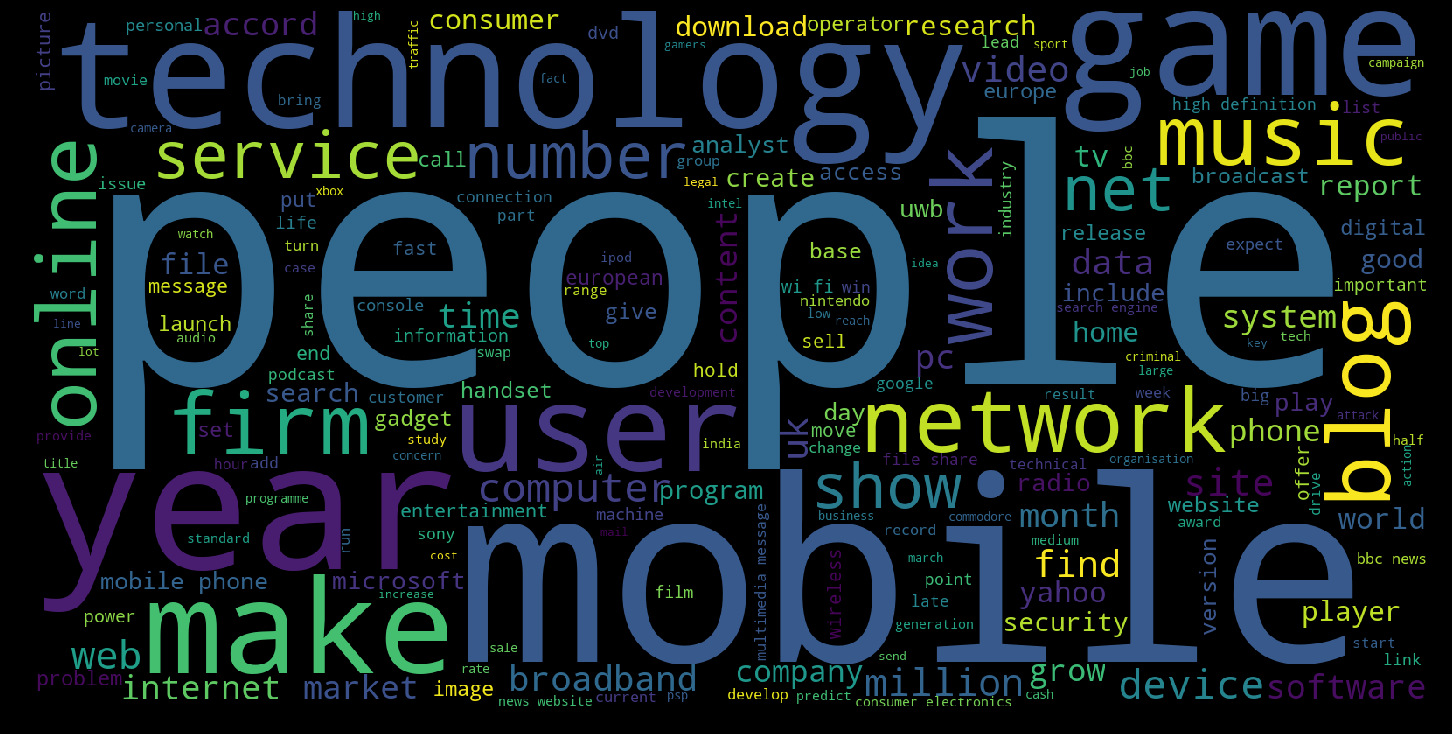

In [367]:
# Visualization: wordcloud for each category
list_merge =  list(([item for items in df_handle.keywords.tolist() for item in items]))
wordcloudplot(list_merge)

## TOP 10 MOST COMMON WORDS

### For All Tokens


Most frequent top-10 words:  [('people', 133), ('mobile', 117), ('year', 89), ('technology', 87), ('game', 87), ('music', 67), ('make', 66), ('phone', 64), ('blog', 62), ('firm', 59)]


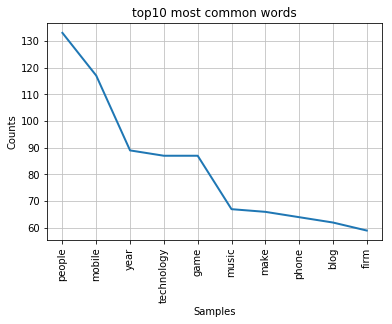

In [368]:
word_frequency = nltk.FreqDist(list_merge)
#What are the top-10 most frequent words
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))
word_frequency.plot(10, title='top10 most common words')

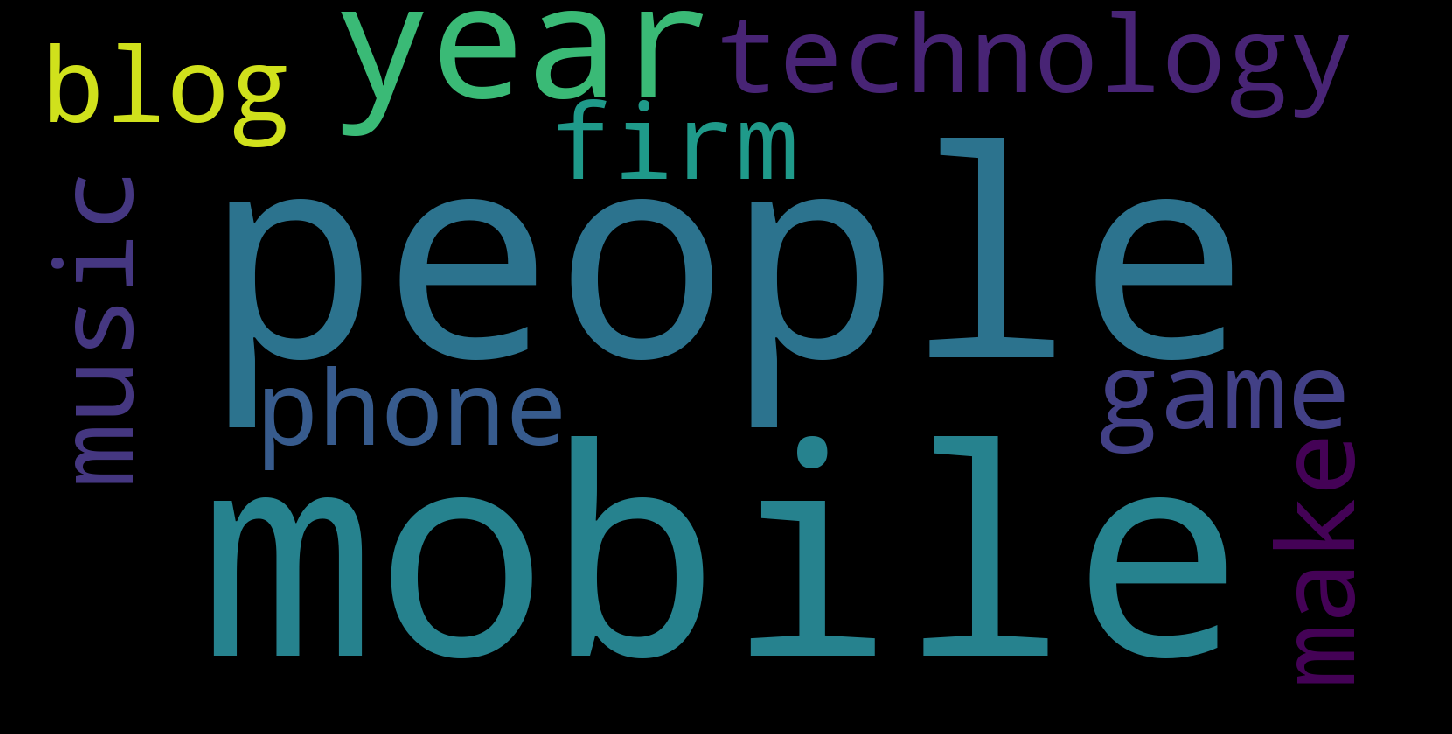

In [369]:
word_frequency =  nltk.FreqDist(list_merge)
topw = [w[0]+':' + str(w[1]) for w in word_frequency.most_common(10)]
wordcloudplot(topw)

### For each document

The document:0

Most frequent top-10 noun_keys words:  [('download', 11), ('programme', 10), ('tv', 9), ('people', 8), ('uk', 7), ('show', 6), ('episode', 6), ('net', 5), ('report', 4), ('program', 4)]


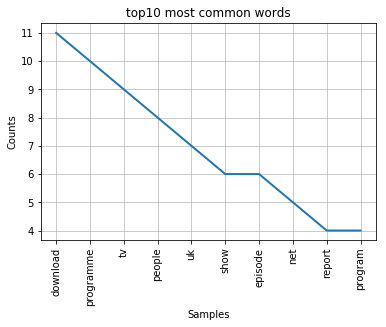

The document:1

Most frequent top-10 noun_keys words:  [('price', 5), ('service', 4), ('supplier', 4), ('feed', 3), ('survey', 3), ('pc', 3), ('pro', 3), ('internet', 3), ('customer', 3), ('people', 3)]


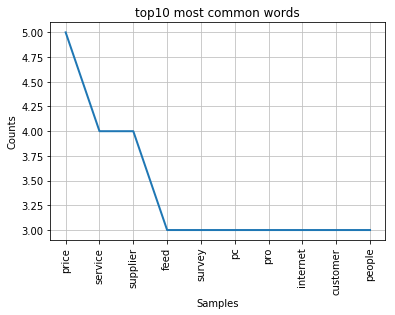

The document:2

Most frequent top-10 noun_keys words:  [('virus', 9), ('program', 9), ('criminal', 9), ('malicious', 6), ('write', 6), ('machine', 6), ('change', 4), ('infect', 4), ('spyware', 4), ('tech', 3)]


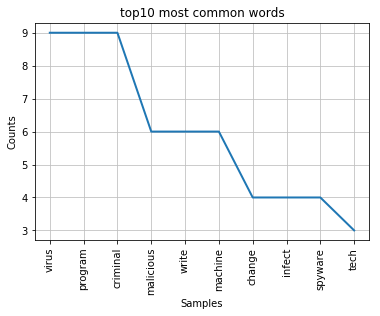

The document:3

Most frequent top-10 noun_keys words:  [('blog', 19), ('year', 7), ('category', 6), ('bloggies', 5), ('site', 4), ('news', 4), ('award', 3), ('people', 3), ('nomination', 3), ('top', 3)]


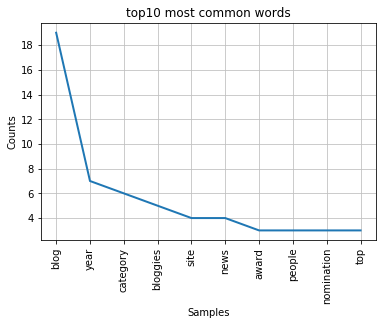

The document:4

Most frequent top-10 noun_keys words:  [('dvd', 18), ('high', 16), ('definition', 14), ('film', 9), ('dean', 9), ('home', 6), ('time', 6), ('studio', 6), ('work', 5), ('star', 5)]


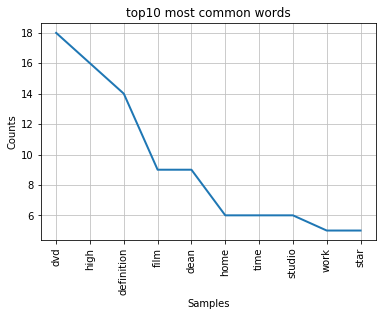

The document:5

Most frequent top-10 noun_keys words:  [('game', 27), ('play', 11), ('mobile', 10), ('time', 8), ('phone', 6), ('handset', 6), ('title', 6), ('bit', 4), ('short', 3), ('launch', 3)]


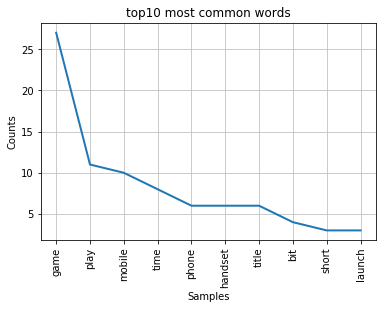

The document:6

Most frequent top-10 noun_keys words:  [('aid', 10), ('donation', 10), ('people', 7), ('online', 7), ('site', 7), ('organisation', 6), ('list', 6), ('cash', 5), ('donate', 5), ('web', 4)]


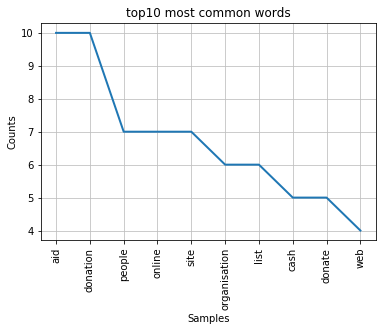

The document:7

Most frequent top-10 noun_keys words:  [('blog', 16), ('medium', 6), ('nachison', 5), ('information', 5), ('web', 4), ('news', 4), ('traditional', 4), ('mainstream', 3), ('number', 3), ('grow', 3)]


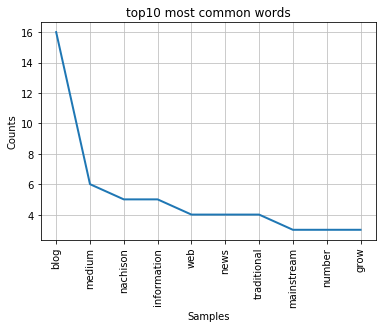

The document:8

Most frequent top-10 noun_keys words:  [('site', 10), ('block', 5), ('bush', 4), ('website', 4), ('netcraft', 4), ('traffic', 4), ('election', 3), ('view', 3), ('monitoring', 3), ('president', 2)]


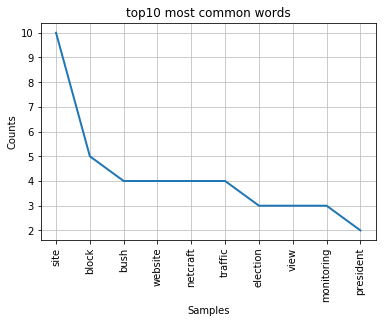

The document:9

Most frequent top-10 noun_keys words:  [('simonetti', 11), ('airline', 10), ('blog', 9), ('employee', 7), ('company', 7), ('picture', 5), ('delta', 5), ('image', 5), ('personal', 5), ('suspend', 4)]


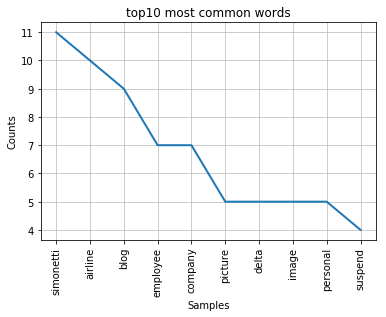

The document:10

Most frequent top-10 noun_keys words:  [('panda', 9), ('network', 6), ('world', 5), ('reserve', 5), ('wireless', 4), ('wolong', 4), ('staff', 3), ('digital', 3), ('technology', 3), ('child', 3)]


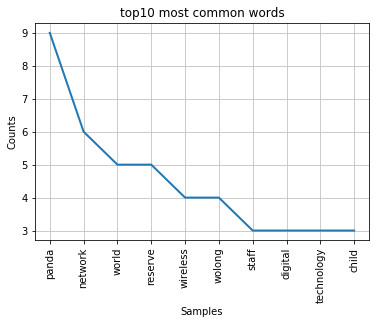

The document:11

Most frequent top-10 noun_keys words:  [('podcast', 12), ('radio', 10), ('curry', 8), ('create', 7), ('internet', 7), ('show', 7), ('ipod', 6), ('music', 6), ('call', 6), ('audio', 5)]


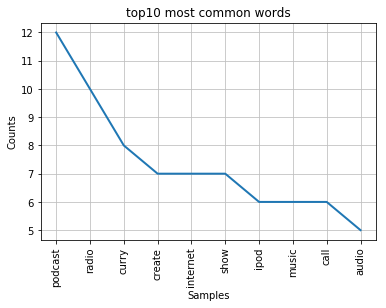

The document:12

Most frequent top-10 noun_keys words:  [('laser', 12), ('network', 8), ('set', 6), ('tata', 6), ('speed', 5), ('bridge', 4), ('firm', 4), ('data', 4), ('work', 4), ('permission', 4)]


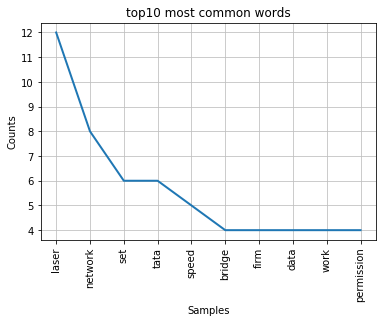

The document:13

Most frequent top-10 noun_keys words:  [('battlefront', 7), ('game', 7), ('war', 6), ('star', 5), ('feel', 3), ('good', 3), ('noise', 3), ('force', 2), ('gameplay', 2), ('back', 2)]


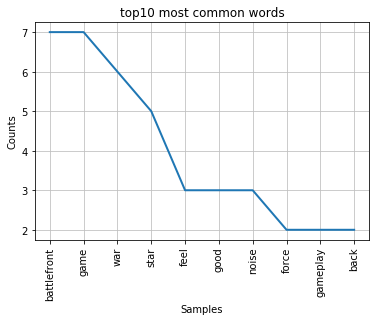

The document:14

Most frequent top-10 noun_keys words:  [('technology', 10), ('gate', 7), ('make', 7), ('game', 6), ('device', 6), ('gadget', 5), ('work', 5), ('people', 5), ('consumer', 4), ('show', 4)]


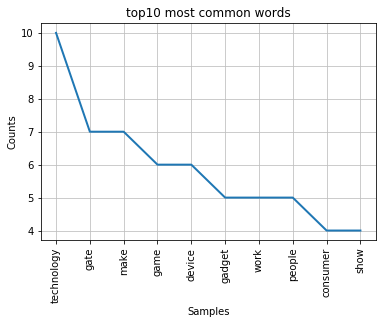

The document:15

Most frequent top-10 noun_keys words:  [('blog', 17), ('word', 12), ('year', 5), ('merriam', 5), ('webster', 5), ('people', 5), ('number', 5), ('term', 4), ('dictionary', 4), ('list', 4)]


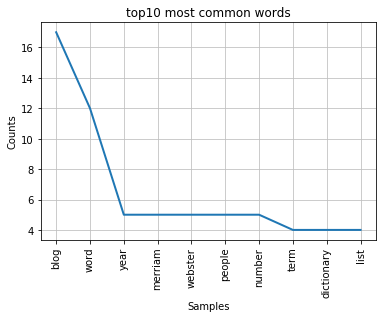

The document:16

Most frequent top-10 noun_keys words:  [('file', 18), ('system', 14), ('exeem', 10), ('bittorrent', 9), ('share', 8), ('network', 7), ('swap', 7), ('version', 7), ('legal', 6), ('software', 6)]


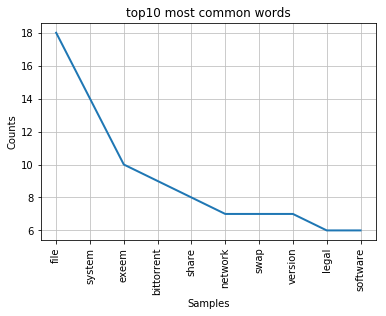

The document:17

Most frequent top-10 noun_keys words:  [('release', 3), ('charity', 2), ('anthem', 2), ('aid', 2), ('issue', 2), ('raise', 2), ('record', 2), ('year', 2), ('world', 1), ('american', 1)]


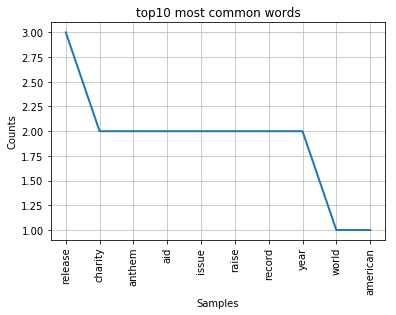

The document:18

Most frequent top-10 noun_keys words:  [('broadband', 8), ('tv', 8), ('year', 7), ('number', 6), ('analyst', 5), ('research', 4), ('million', 4), ('people', 4), ('net', 4), ('rise', 4)]


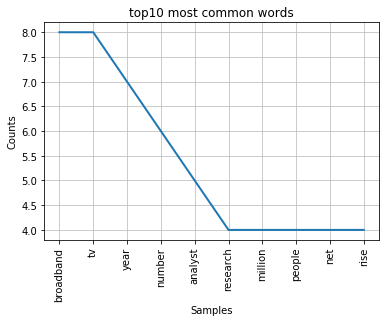

The document:19

Most frequent top-10 noun_keys words:  [('game', 10), ('halo', 4), ('million', 4), ('online', 4), ('world', 4), ('player', 4), ('nintendo', 4), ('sell', 3), ('sale', 3), ('xbox', 3)]


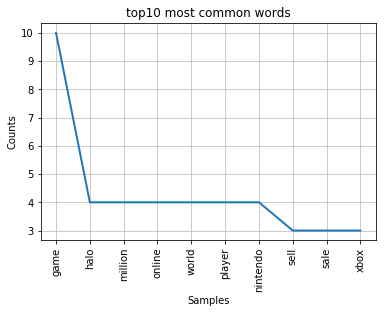

The document:20

Most frequent top-10 noun_keys words:  [('mobile', 16), ('india', 10), ('market', 8), ('game', 7), ('grow', 4), ('million', 4), ('report', 3), ('accord', 3), ('analyst', 3), ('stat', 3)]


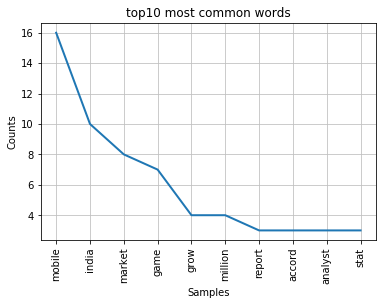

The document:21

Most frequent top-10 noun_keys words:  [('computer', 5), ('grid', 5), ('world', 5), ('project', 5), ('problem', 4), ('health', 3), ('donate', 3), ('million', 3), ('research', 3), ('community', 2)]


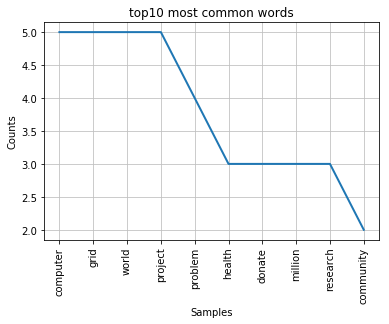

The document:22

Most frequent top-10 noun_keys words:  [('device', 15), ('medium', 11), ('portable', 11), ('people', 9), ('video', 9), ('content', 8), ('watch', 7), ('archos', 6), ('consumer', 6), ('year', 5)]


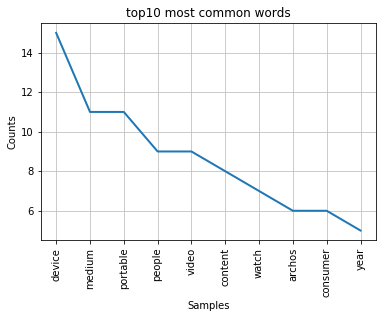

The document:23

Most frequent top-10 noun_keys words:  [('bbc', 9), ('sport', 9), ('piero', 8), ('broadcast', 6), ('give', 4), ('analysis', 4), ('player', 4), ('technology', 4), ('camera', 4), ('wale', 3)]


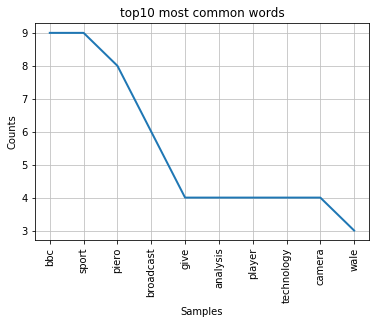

The document:24

Most frequent top-10 noun_keys words:  [('multimedia', 12), ('message', 11), ('phone', 10), ('send', 9), ('mobile', 7), ('people', 7), ('number', 5), ('operator', 5), ('customer', 5), ('firm', 5)]


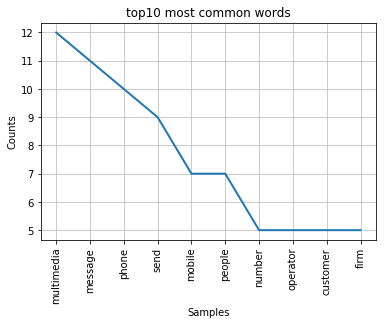

The document:25

Most frequent top-10 noun_keys words:  [('console', 6), ('nintendo', 5), ('sony', 4), ('ship', 4), ('psp', 3), ('japan', 3), ('handheld', 3), ('year', 3), ('gamers', 2), ('game', 2)]


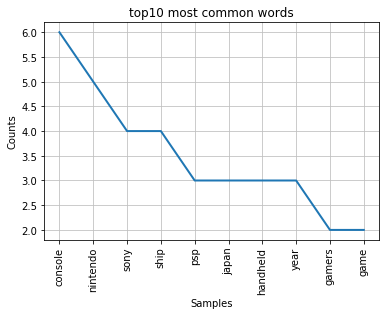

The document:26

Most frequent top-10 noun_keys words:  [('mac', 8), ('ipod', 8), ('job', 7), ('apple', 6), ('computer', 6), ('mini', 4), ('market', 4), ('low', 3), ('mass', 3), ('machine', 3)]


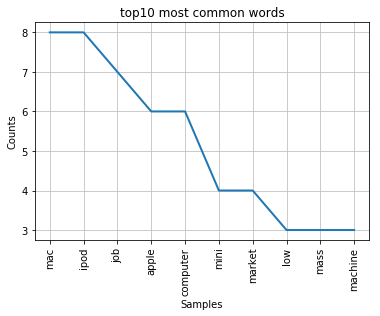

The document:27

Most frequent top-10 noun_keys words:  [('mobile', 16), ('phone', 6), ('uk', 5), ('online', 5), ('figure', 5), ('gprs', 5), ('mm', 5), ('people', 5), ('multimedia', 4), ('mda', 4)]


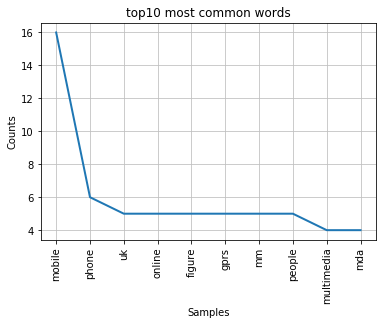

The document:28

Most frequent top-10 noun_keys words:  [('search', 16), ('desktop', 9), ('file', 6), ('firm', 5), ('web', 5), ('yahoo', 4), ('mail', 4), ('user', 4), ('internet', 3), ('technology', 3)]


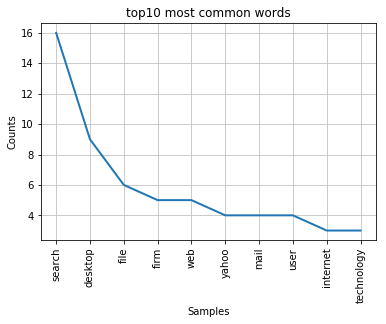

The document:29

Most frequent top-10 noun_keys words:  [('mobile', 10), ('jacobsen', 6), ('computer', 5), ('hack', 3), ('access', 3), ('secret', 3), ('service', 3), ('hacker', 2), ('man', 2), ('phone', 2)]


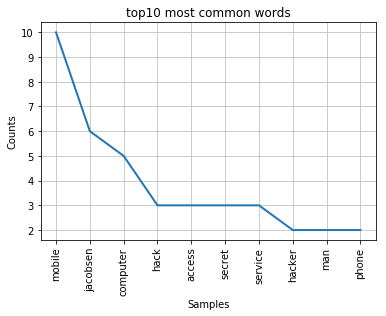

The document:30

Most frequent top-10 noun_keys words:  [('uwb', 15), ('technology', 6), ('data', 5), ('ofcom', 4), ('radio', 4), ('network', 3), ('device', 3), ('short', 3), ('adoption', 3), ('wireless', 2)]


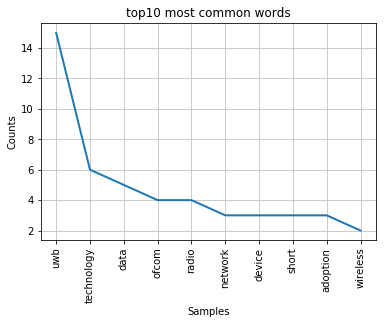

The document:31

Most frequent top-10 noun_keys words:  [('net', 13), ('security', 10), ('woman', 7), ('year', 7), ('program', 7), ('people', 5), ('home', 5), ('virus', 5), ('user', 5), ('broadband', 5)]


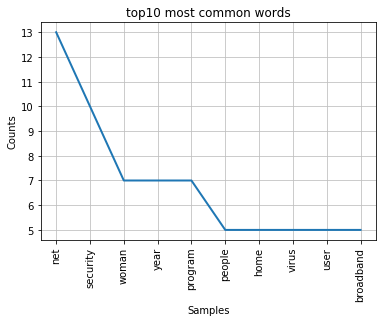

The document:32

Most frequent top-10 noun_keys words:  [('mobile', 18), ('service', 15), ('tv', 15), ('music', 9), ('people', 6), ('broadcast', 6), ('standard', 6), ('report', 5), ('download', 5), ('europe', 5)]


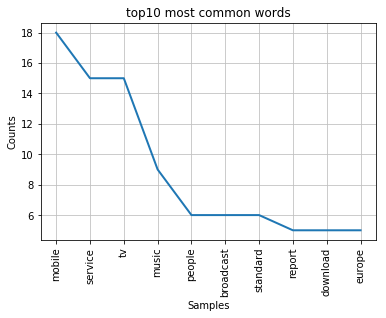

The document:33

Most frequent top-10 noun_keys words:  [('colour', 7), ('software', 7), ('wong', 7), ('blind', 5), ('read', 5), ('student', 4), ('image', 4), ('develop', 3), ('note', 3), ('map', 3)]


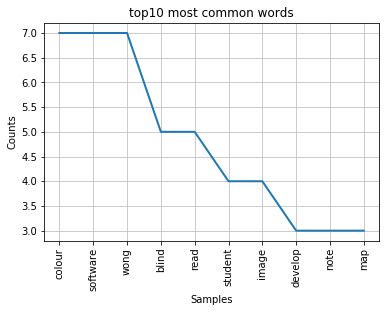

The document:34

Most frequent top-10 noun_keys words:  [('sigarchi', 9), ('blogger', 7), ('sentence', 7), ('day', 7), ('iran', 6), ('iranian', 6), ('arrest', 5), ('online', 5), ('campaign', 4), ('revolutionary', 3)]


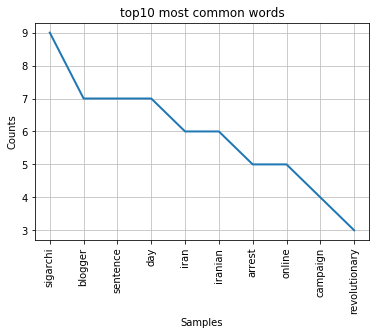

The document:35

Most frequent top-10 noun_keys words:  [('yahoo', 24), ('search', 11), ('google', 9), ('internet', 7), ('year', 7), ('web', 6), ('portal', 5), ('weiner', 5), ('dot', 4), ('brand', 3)]


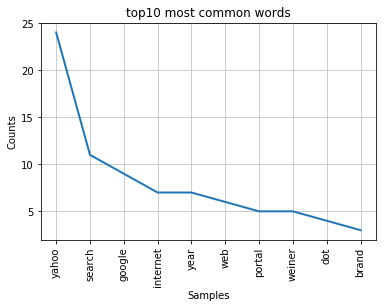

The document:36

Most frequent top-10 noun_keys words:  [('law', 7), ('directive', 6), ('parliament', 6), ('patent', 5), ('european', 5), ('council', 5), ('draft', 4), ('minister', 4), ('eu', 3), ('software', 3)]


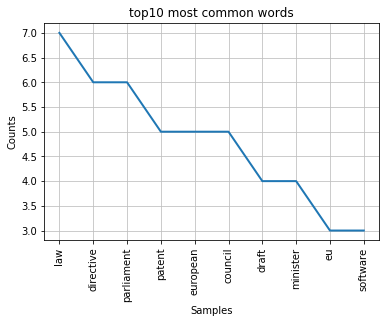

The document:37

Most frequent top-10 noun_keys words:  [('uwb', 11), ('technology', 10), ('intel', 6), ('data', 5), ('wi', 4), ('fi', 4), ('wireless', 4), ('ultra', 3), ('usb', 3), ('phone', 3)]


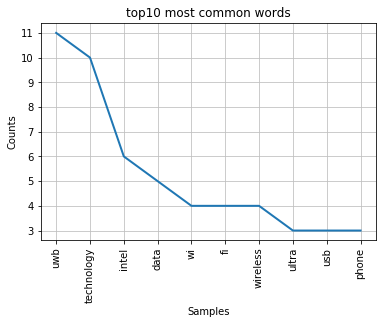

The document:38

Most frequent top-10 noun_keys words:  [('wi', 10), ('fi', 10), ('find', 9), ('security', 8), ('network', 7), ('wireless', 5), ('rsa', 5), ('survey', 4), ('london', 4), ('frankfurt', 4)]


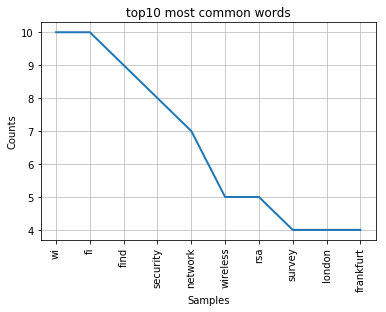

The document:39

Most frequent top-10 noun_keys words:  [('sony', 6), ('device', 6), ('psp', 5), ('sell', 5), ('handheld', 4), ('gadget', 4), ('million', 4), ('gaming', 4), ('launch', 4), ('market', 4)]


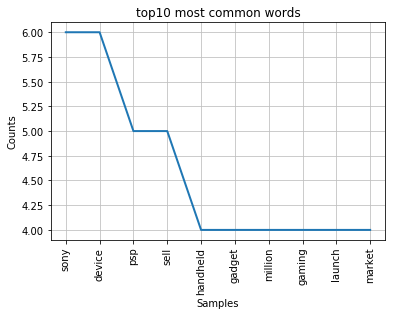

The document:40

Most frequent top-10 noun_keys words:  [('file', 14), ('court', 9), ('share', 7), ('firm', 6), ('peer', 6), ('supreme', 5), ('network', 5), ('industry', 5), ('innovation', 5), ('music', 5)]


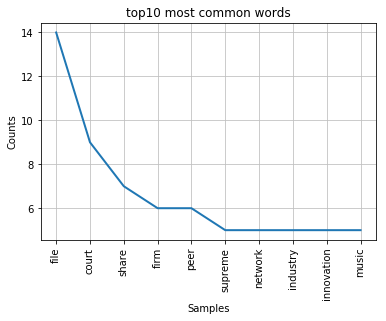

The document:41

Most frequent top-10 noun_keys words:  [('commodore', 12), ('computer', 7), ('brand', 5), ('home', 3), ('sell', 3), ('game', 3), ('digital', 2), ('music', 2), ('plan', 2), ('pc', 2)]


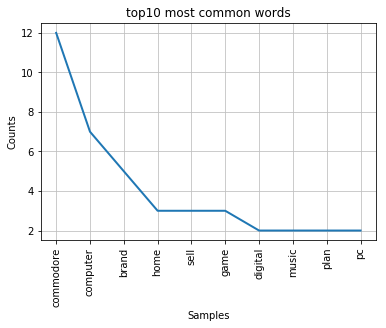

The document:42

Most frequent top-10 noun_keys words:  [('music', 23), ('mobile', 22), ('phone', 11), ('pc', 11), ('download', 6), ('market', 5), ('babinet', 5), ('player', 4), ('song', 4), ('device', 4)]


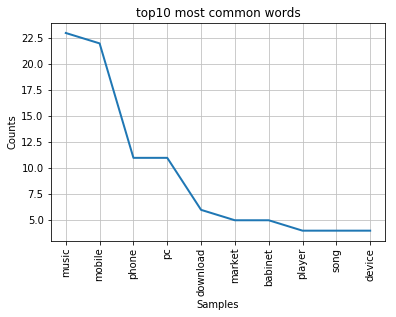

The document:43

Most frequent top-10 noun_keys words:  [('multimedia', 12), ('message', 11), ('phone', 10), ('send', 9), ('mobile', 7), ('people', 7), ('number', 5), ('operator', 5), ('customer', 5), ('firm', 5)]


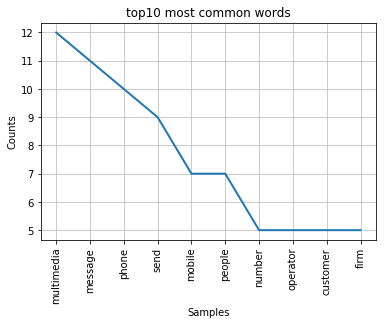

The document:44

Most frequent top-10 noun_keys words:  [('broadband', 10), ('people', 6), ('online', 5), ('report', 5), ('uk', 5), ('net', 5), ('fast', 4), ('web', 4), ('access', 4), ('demos', 3)]


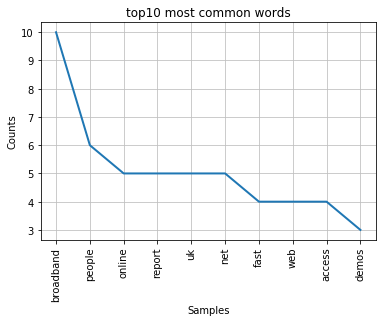

The document:45

Most frequent top-10 noun_keys words:  [('microsoft', 7), ('game', 7), ('xbox', 6), ('console', 5), ('machine', 5), ('unveil', 4), ('gdc', 4), ('year', 4), ('detail', 3), ('generation', 3)]


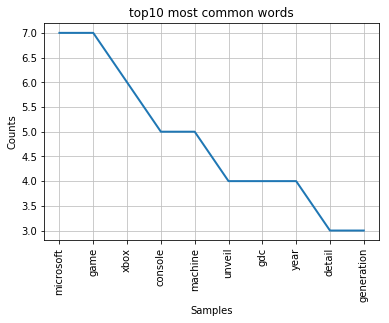

The document:46

Most frequent top-10 noun_keys words:  [('search', 15), ('engine', 10), ('result', 10), ('user', 8), ('pay', 6), ('information', 6), ('find', 5), ('searcher', 4), ('report', 4), ('pew', 4)]


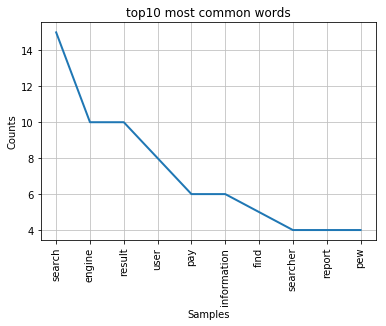

The document:47

Most frequent top-10 noun_keys words:  [('award', 12), ('game', 9), ('win', 8), ('bafta', 4), ('year', 4), ('title', 3), ('category', 3), ('half', 2), ('life', 2), ('pc', 2)]


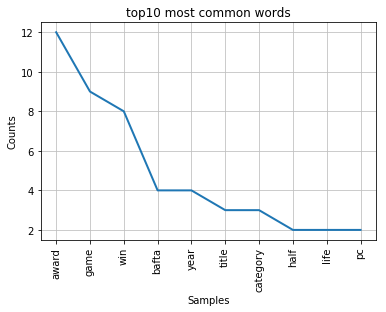

The document:48

Most frequent top-10 noun_keys words:  [('flaw', 7), ('microsoft', 6), ('security', 6), ('critical', 6), ('program', 5), ('fix', 4), ('hole', 4), ('release', 3), ('patch', 3), ('pc', 3)]


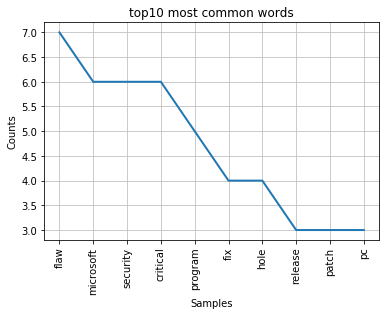

The document:49

Most frequent top-10 noun_keys words:  [('rfid', 11), ('tag', 11), ('consumer', 9), ('survey', 7), ('people', 6), ('technology', 5), ('concern', 3), ('concerned', 3), ('group', 3), ('show', 3)]


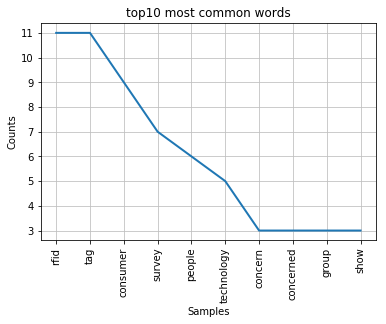

The document:50

Most frequent top-10 noun_keys words:  [('recycle', 9), ('energy', 8), ('power', 8), ('consumer', 7), ('technology', 6), ('electronics', 6), ('awareness', 6), ('epa', 6), ('billion', 6), ('good', 6)]


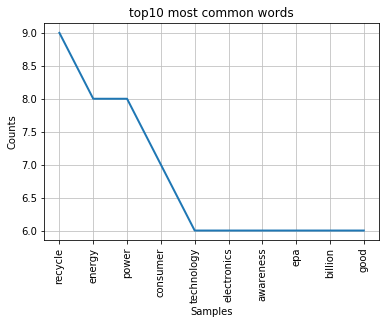

In [370]:
for index, row in df_handle.iterrows():
    word_frequency = nltk.FreqDist(row['keywords'])
    #What are the top-10 most frequent words
    print('The document:' + str(index))
    print("\nMost frequent top-10 noun_keys words: ", word_frequency.most_common(10))
    word_frequency.plot(10, title='top10 most common words')
    print('='*100)

## N-Gram

In [371]:
import collections
import re
import sys
import time
def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())    
def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

### For all corpus

In [372]:
ngrams = count_ngrams(list_merge, min_length=2, max_length=3)
print_most_frequent(ngrams, num=5)

----- 5 most common 2-grams -----
mobile phone: 25
wi fi: 18
file share: 16
high definition: 16
bbc news: 15

----- 5 most common 3-grams -----
bbc news website: 13
send multimedia message: 9
consumer electronics show: 5
phone user send: 5
user send multimedia: 5



### For each document

In [373]:
for index, row in df_handle.iterrows():
    print('The document:' + str(index))
    _tmp = row['keywords']
    ngrams = count_ngrams(_tmp, min_length=2, max_length=3)
    print_most_frequent(ngrams, num=10)
    print('='*100)

The document:0
----- 10 most common 2-grams -----
tv programme: 4
episode download: 3
video recorder: 3
download show: 2
file share: 2
people uk: 2
uk net: 1
net user: 1
user lead: 1
lead tv: 1

----- 10 most common 3-grams -----
uk net user: 1
net user lead: 1
user lead tv: 1
lead tv downloads: 1
tv downloads british: 1
downloads british tv: 1
british tv viewer: 1
tv viewer lead: 1
viewer lead trend: 1
lead trend illegally: 1

The document:1
----- 10 most common 2-grams -----
pc pro: 3
pro magazine: 2
internet service: 2
tim danton: 2
danton editor: 2
editor pc: 2
price drop: 2
survey find: 2
briton feed: 1
feed net: 1

----- 10 most common 3-grams -----
pc pro magazine: 2
tim danton editor: 2
danton editor pc: 2
editor pc pro: 2
briton feed net: 1
feed net service: 1
net service survey: 1
service survey conduct: 1
survey conduct pc: 1
conduct pc pro: 1

The document:2
----- 10 most common 2-grams -----
malicious program: 5
virus write: 3
infect machine: 2
machine connect: 2
rich pick

## Noun Tokens

### Extract Names

In [374]:
# ## Get Personal name from corpus 111
# import nltk
# from nameparser.parser import HumanName
# from nltk.corpus import wordnet
# person_list = []
# person_names=person_list

# # ## Get Personal name from corpus
# # def get_human_names(text):
# #     tokens = nltk.tokenize.word_tokenize(text)
# #     pos = nltk.pos_tag(tokens)
# #     sentt = nltk.ne_chunk(pos, binary = False)

# #     person = []
# #     name = ""
# #     for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'):
# #         for leaf in subtree.leaves():
# #             person.append(leaf[0])
# #         if len(person) > 1: #avoid grabbing lone surnames
# #             for part in person:
# #                 name += part + ' '
# #             if name[:-1] not in person_list:
# #                 person_list.append(name[:-1])
# #             name = ''
# #         person = []
# # #     print (person_list) 

# for index, row in df_handle.iterrows():
#     text = row['content']
#     names = get_human_names(text)
#     for person in person_list:
#         person_split = person.split(" ")
        
#         for name in person_split:
#             if wordnet.synsets(name):
#                 if(name in person):
#                     person_names.remove(person)
#                     break

# print(len(person_names))

In [375]:
import nltk
from nameparser.parser import HumanName
from nltk.corpus import wordnet

def extract_entities(text):
    listname = []
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if(chunk.label() == 'PERSON'):
                    listname.append(' '.join(c[0] for c in chunk.leaves()))
                    
    #     listname = set(list(listname))
    return listname


In [376]:
## Get Personal name from corpus 222

listname =[]
for index, row in df_handle.iterrows():
    text = row['content']
    listname.extend(extract_entities(text))
listname = set(list(listname))
listname

## Filter 
words = set(nltk.corpus.words.words('en'))

def isname1(string):
    return any([w not in words for w in string.lower().split()])

def isname2(string):
    return all([w not in words for w in string.lower().split()])

person_names2 =[]
for x in listname:
    if (isname2(x) == True):
        person_names2.append(x)

In [377]:
print(person_names2)

['Olivier Beauvillian', 'Olivier Beauvillain', 'Weiner', 'Shailendra Jain', 'Flickr', 'Shane Williams', 'Java', 'Andy Townsend', 'Babinet', 'Gawker', 'Piero', 'Francesco', 'Yaron Toren', 'Adamind', 'Gartner', 'Sloncek', 'Simpson', 'Nachison', 'Mobiles', 'Johnny Carson', 'Manuel Barroso', 'Stephen Breyer', 'Adam', 'Celltick', 'Lipietz', 'Kazaa', 'Blogs', 'Ebay', 'Suprnova', 'Sony', 'Musiwave', 'Sullivan', 'Noam Chomsky', 'Walkman', 'Archos', 'Sybari Software', 'Andrew', 'Nintendo DS', 'David Yarnton', 'Ayatollah Ali Khamenei', 'Hitman', 'Gary Stowell', 'Michael Pachter', 'Arash', 'Alexander', 'Jeffrey Matsuura', 'Jupiter', 'Froogle', 'Henri Crohas', 'Capgemini', 'Bluetooth', 'Tata', 'John Craig', 'Doug', 'Napster', 'Allen Weiner', 'Ofcom', 'Amazon', 'Ellen Simonetti', 'Jobs', 'Shapiro', 'Thomas Husson', 'Pouwelse', 'Macklin', 'Tim Koogle', 'Ewoks', 'David Theriault', 'Broadband Britain', 'Wonkette', 'Globio', 'Carolina Milanesi', 'Gates', 'Symantec', 'Jacobsen', 'Seti', 'Gmail', 'Marek 

### Extract noun phrase

In [378]:
def extract_noun(text):
    import nltk
    lines = text
    # function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns

In [379]:
import nltk
[n,d] = df_handle.shape
df_handle['noun_keys'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['noun_keys'].iloc[index] = extract_noun(" ".join(row['keywords']))

df_handle.head(10)

filename                                            content  \
0        0  UK net users leading TV downloads British TV v...   
1        1  Britons fed up with net service A survey condu...   
2       10  Rich pickings for hi-tech thieves Viruses, tro...   
3       11  Voters flock to blog awards site Voting is und...   
4       12  What high-definition will do to DVDs First it ...   
5       13  Mobile games come of age The BBC News website ...   
6       14  Web helps collect aid donations The web is hel...   
7       15  Blogs take on the mainstream Web logs or blogs...   
8       16  Bush website blocked outside US Surfers outsid...   
9       17  Blogger grounded by her airline A US airline a...   

                                            keywords  \
0  [uk, net, user, lead, tv, downloads, british, ...   
1  [briton, feed, net, service, survey, conduct, ...   
2  [rich, picking, tech, thieve, virus, trojan, m...   
3  [voter, flock, blog, award, site, voting, annu...   
4  [high, definition, dvds, humble, home, video, ...   
5  [mobile, game, age, bbc, news, website, game, ...   
6  [web, collect, aid, donation, web, aid, agency...   
7  [blog, mainstream, web, log, blog, estimate, m...   
8  [bush, website, block, surfer, unable, visit, ...   
9  [blogger, ground, airline, airline, attendant,...   

                                           noun_keys  
0  [user, lead, tv, downloads, tv, viewer, trend,...  
1  [briton, feed, service, survey, conduct, pc, m...  
2  [virus, program, catch, undergo, change, shift...  
3  [voter, flock, blog, site, bloggies, blog, spa...  
4  [definition, dvds, home, video, dvd, hollywood...  
5  [game, age, news, game, phone, mature, round, ...  
6  [web, collect, aid, donation, web, aid, agency...  
7  [blog, mainstream, web, log, blog, estimate, n...  
8  [website, block, surfer, visit, election, site...  
9  [blogger, ground, airline, airline, fight, job...

### For each Document

#### Wordcloud for Nouns in each document

In [380]:
# Visualization: wordcloud for each category
for index, row in df_handle.iterrows():
    print('The document:' + str(index))
    _tmp = list(row['noun_keys'])
    print(_tmp)
#     wordcloudplot(_tmp)
    print('='*100)

The document:0
['user', 'lead', 'tv', 'downloads', 'tv', 'viewer', 'trend', 'show', 'accord', 'research', 'episode', 'foot', 'hour', 'show', 'report', 'company', 'downloaders', 'downloads', 'tv', 'programme', 'increase', 'year', 'share', 'program', 'bittorrent', 'firm', 'tv', 'show', 'ben', 'coppin', 'episode', 'download', 'people', 'estimate', 'fan', 'tv', 'programme', 'wait', 'week', 'month', 'series', 'show', 'case', 'report', 'people', 'episode', 'britain', 'audience', 'coast', 'country', 'television', 'show', 'problem', 'basic', 'knowledge', 'internet', 'coppin', 'click', 'favourite', 'programme', 'download', 'effect', 'internet', 'video', 'recorder', 'figure', 'pin', 'people', 'tv', 'program', 'episode', 'download', 'analyst', 'people', 'tv', 'programme', 'challenge', 'broadcaster', 'concern', 'channel', 'schedule', 'people', 'concern', 'cut', 'program', 'industry', 'term', 'time', 'trend', 'watch', 'popularity', 'video', 'recorder', 'tivo', 'type', 'box', 'programme', 'trend', '

#### Top 10 most common nouns for each document

The document:0

Most frequent top-10 noun_keys words:  [('tv', 9), ('programme', 8), ('people', 8), ('show', 6), ('episode', 6), ('download', 6), ('program', 4), ('trend', 3), ('report', 3), ('year', 3)]


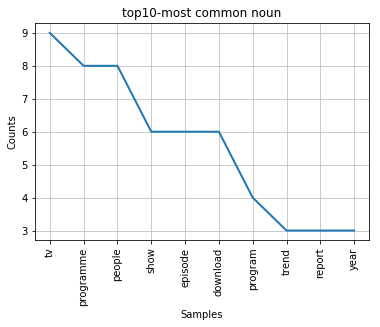

The document:1

Most frequent top-10 noun_keys words:  [('price', 5), ('service', 4), ('survey', 3), ('pc', 3), ('internet', 3), ('customer', 3), ('people', 3), ('provider', 3), ('danton', 3), ('month', 3)]


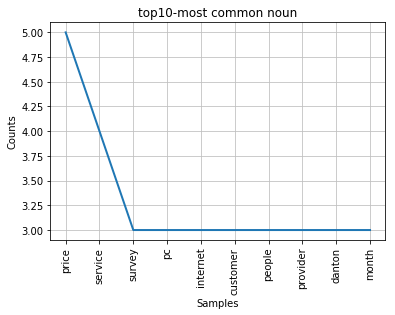

The document:2

Most frequent top-10 noun_keys words:  [('program', 9), ('virus', 7), ('machine', 6), ('change', 3), ('technology', 3), ('people', 3), ('data', 3), ('end', 3), ('firm', 3), ('network', 3)]


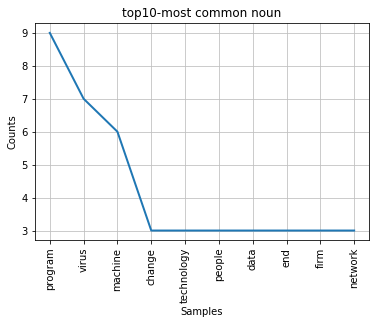

The document:3

Most frequent top-10 noun_keys words:  [('blog', 18), ('year', 7), ('bloggies', 5), ('category', 5), ('site', 4), ('news', 4), ('people', 3), ('nomination', 3), ('voter', 2), ('traffic', 2)]


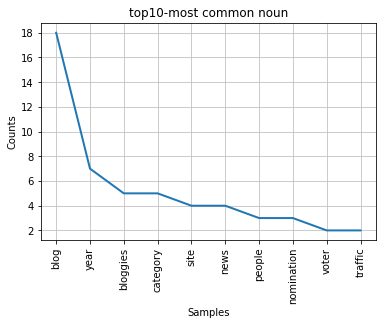

The document:4

Most frequent top-10 noun_keys words:  [('definition', 14), ('dvd', 12), ('film', 9), ('home', 6), ('time', 6), ('studio', 6), ('star', 5), ('world', 5), ('work', 4), ('war', 4)]


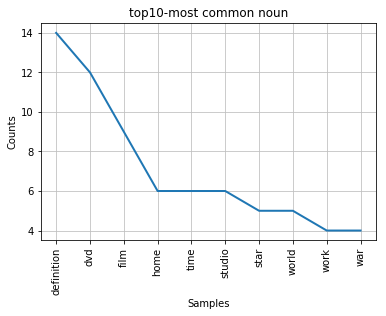

The document:5

Most frequent top-10 noun_keys words:  [('game', 27), ('time', 8), ('phone', 6), ('play', 6), ('title', 5), ('bit', 4), ('technology', 3), ('maker', 3), ('car', 3), ('launch', 2)]


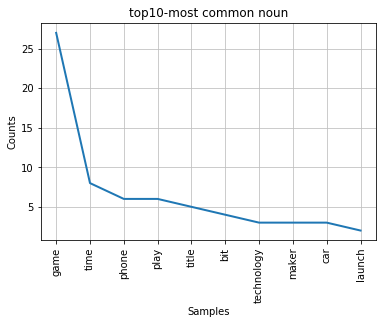

The document:6

Most frequent top-10 noun_keys words:  [('donation', 10), ('aid', 9), ('people', 7), ('site', 7), ('organisation', 6), ('cash', 5), ('list', 5), ('web', 4), ('agency', 4), ('effort', 3)]


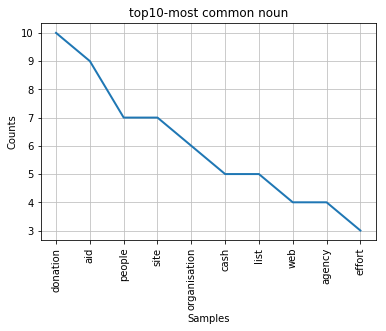

The document:7

Most frequent top-10 noun_keys words:  [('blog', 13), ('medium', 6), ('information', 5), ('news', 4), ('mainstream', 3), ('number', 3), ('people', 3), ('account', 3), ('source', 3), ('part', 3)]


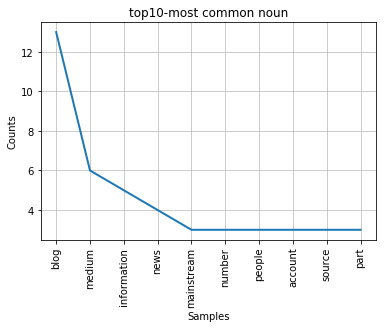

The document:8

Most frequent top-10 noun_keys words:  [('site', 10), ('block', 4), ('netcraft', 4), ('traffic', 4), ('election', 3), ('view', 3), ('website', 2), ('president', 2), ('george', 2), ('hour', 2)]


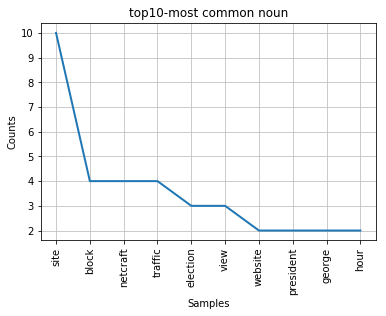

The document:9

Most frequent top-10 noun_keys words:  [('airline', 10), ('blog', 9), ('employee', 7), ('company', 7), ('picture', 5), ('image', 5), ('online', 4), ('problem', 4), ('ms', 4), ('policy', 4)]


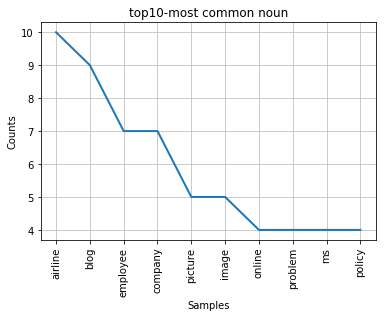

The document:10

Most frequent top-10 noun_keys words:  [('panda', 8), ('network', 6), ('world', 5), ('reserve', 5), ('wireless', 3), ('staff', 3), ('technology', 3), ('population', 2), ('nature', 2), ('data', 2)]


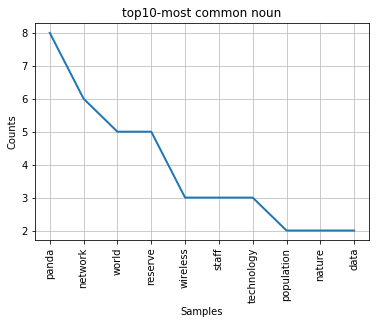

The document:11

Most frequent top-10 noun_keys words:  [('podcast', 10), ('radio', 9), ('show', 7), ('music', 6), ('internet', 6), ('ipod', 5), ('create', 5), ('call', 5), ('people', 5), ('player', 4)]


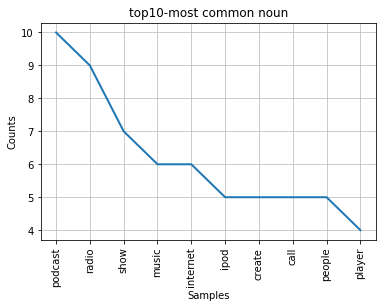

The document:12

Most frequent top-10 noun_keys words:  [('laser', 10), ('network', 8), ('tata', 5), ('speed', 5), ('bridge', 4), ('data', 4), ('work', 4), ('permission', 4), ('dig', 4), ('firm', 3)]


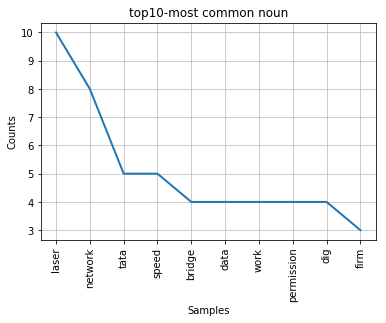

The document:13

Most frequent top-10 noun_keys words:  [('game', 7), ('war', 6), ('battlefront', 5), ('star', 5), ('force', 2), ('gameplay', 2), ('location', 2), ('jedi', 2), ('character', 2), ('element', 2)]


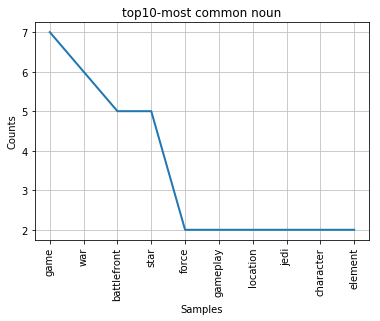

The document:14

Most frequent top-10 noun_keys words:  [('technology', 10), ('game', 6), ('gate', 5), ('work', 5), ('people', 5), ('device', 5), ('consumer', 4), ('trend', 4), ('gadget', 3), ('content', 3)]


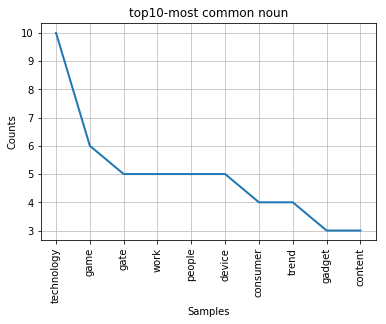

The document:15

Most frequent top-10 noun_keys words:  [('blog', 12), ('word', 12), ('year', 5), ('webster', 5), ('people', 5), ('number', 5), ('term', 4), ('merriam', 4), ('site', 4), ('month', 4)]


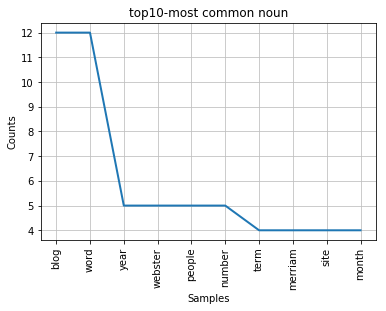

The document:16

Most frequent top-10 noun_keys words:  [('file', 16), ('system', 14), ('bittorrent', 9), ('share', 8), ('network', 7), ('version', 7), ('software', 6), ('tracker', 6), ('people', 5), ('site', 5)]


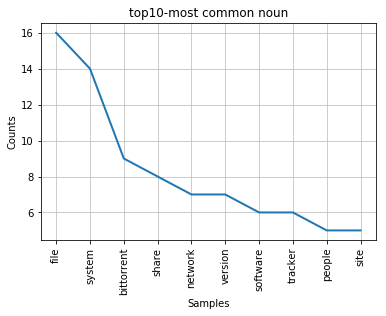

The document:17

Most frequent top-10 noun_keys words:  [('charity', 2), ('anthem', 2), ('release', 2), ('aid', 2), ('issue', 2), ('record', 2), ('year', 2), ('world', 1), ('inspire', 1), ('success', 1)]


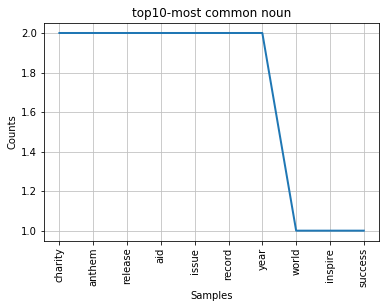

The document:18

Most frequent top-10 noun_keys words:  [('broadband', 8), ('tv', 8), ('year', 7), ('number', 6), ('analyst', 5), ('research', 4), ('people', 4), ('rise', 4), ('view', 3), ('netratings', 3)]


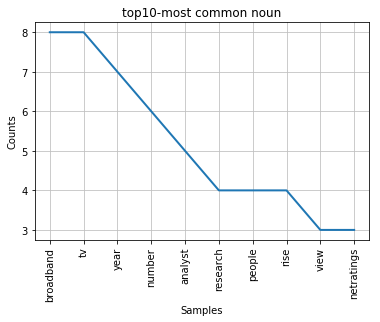

The document:19

Most frequent top-10 noun_keys words:  [('game', 10), ('halo', 4), ('world', 4), ('player', 4), ('sale', 3), ('xbox', 3), ('play', 3), ('place', 3), ('number', 3), ('warcraft', 3)]


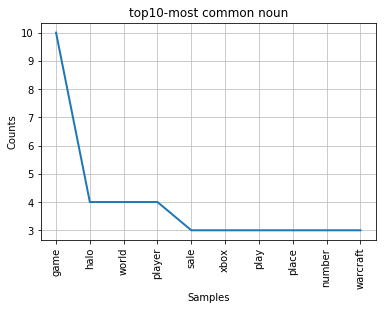

The document:20

Most frequent top-10 noun_keys words:  [('market', 8), ('game', 7), ('india', 4), ('report', 3), ('accord', 3), ('analyst', 3), ('mobile', 3), ('operator', 3), ('generate', 2), ('phone', 2)]


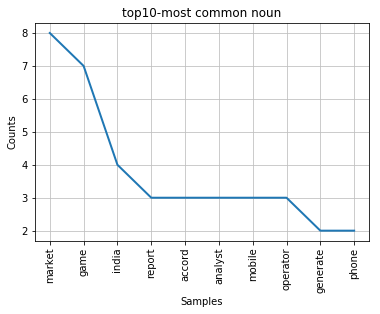

The document:21

Most frequent top-10 noun_keys words:  [('computer', 5), ('world', 5), ('project', 5), ('problem', 4), ('health', 3), ('donate', 3), ('research', 3), ('grid', 2), ('community', 2), ('time', 2)]


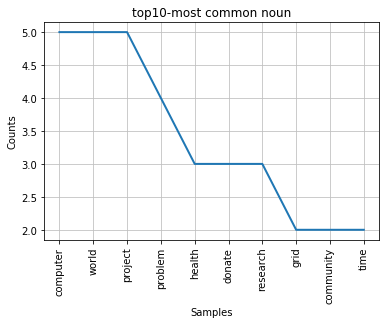

The document:22

Most frequent top-10 noun_keys words:  [('device', 14), ('medium', 11), ('people', 9), ('video', 7), ('consumer', 6), ('year', 5), ('base', 5), ('watch', 5), ('content', 5), ('player', 4)]


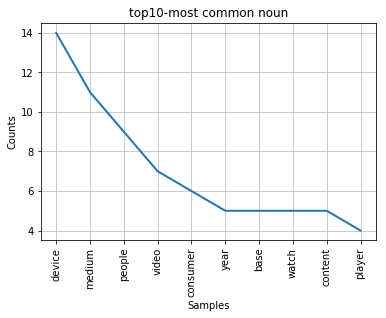

The document:23

Most frequent top-10 noun_keys words:  [('sport', 9), ('piero', 7), ('bbc', 7), ('broadcast', 5), ('analysis', 4), ('player', 4), ('technology', 4), ('camera', 4), ('work', 3), ('grow', 3)]


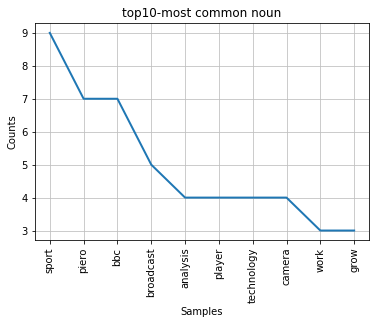

The document:24

Most frequent top-10 noun_keys words:  [('message', 11), ('phone', 10), ('people', 7), ('multimedia', 6), ('number', 5), ('customer', 5), ('firm', 5), ('network', 5), ('video', 4), ('operator', 4)]


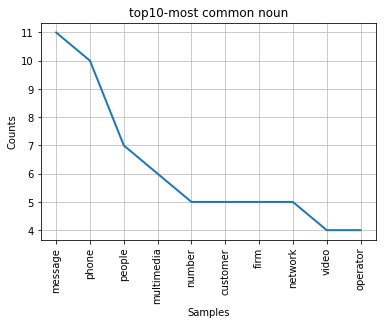

The document:25

Most frequent top-10 noun_keys words:  [('console', 4), ('sony', 3), ('year', 3), ('gamers', 2), ('psp', 2), ('game', 2), ('sale', 2), ('japan', 2), ('psps', 2), ('handheld', 2)]


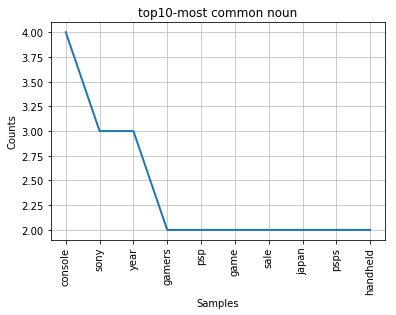

The document:26

Most frequent top-10 noun_keys words:  [('ipod', 8), ('mac', 7), ('job', 7), ('apple', 6), ('computer', 6), ('market', 4), ('mass', 3), ('machine', 3), ('music', 3), ('player', 3)]


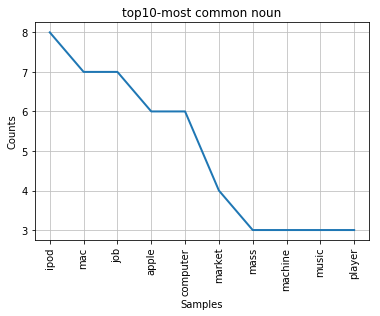

The document:27

Most frequent top-10 noun_keys words:  [('phone', 6), ('mobile', 5), ('figure', 5), ('people', 5), ('mda', 4), ('mm', 4), ('gprs', 4), ('online', 3), ('technology', 3), ('year', 3)]


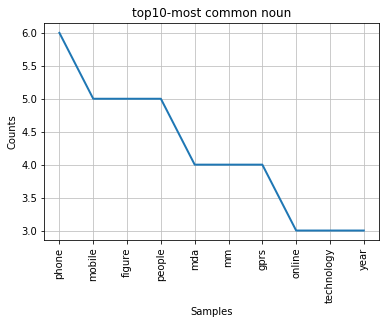

The document:28

Most frequent top-10 noun_keys words:  [('search', 14), ('desktop', 6), ('firm', 5), ('web', 5), ('mail', 4), ('file', 4), ('internet', 3), ('technology', 3), ('analyst', 3), ('yahoo', 2)]


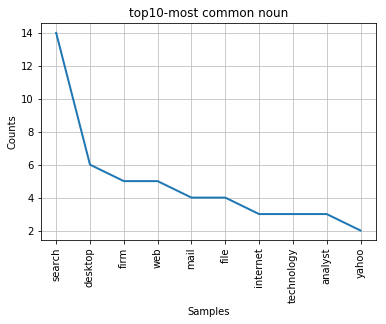

The document:29

Most frequent top-10 noun_keys words:  [('computer', 5), ('jacobsen', 5), ('mobile', 3), ('access', 3), ('service', 3), ('hacker', 2), ('man', 2), ('phone', 2), ('hack', 2), ('number', 2)]


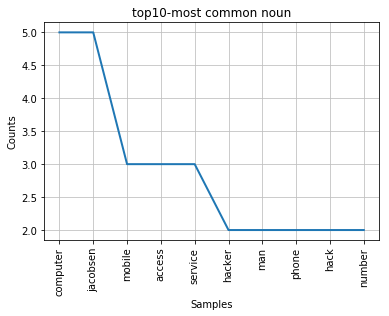

The document:30

Most frequent top-10 noun_keys words:  [('technology', 6), ('data', 5), ('radio', 4), ('network', 3), ('device', 3), ('adoption', 3), ('wireless', 2), ('problem', 2), ('air', 2), ('people', 2)]


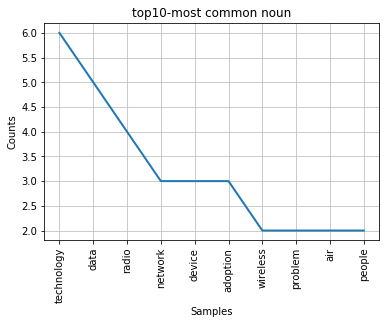

The document:31

Most frequent top-10 noun_keys words:  [('security', 10), ('woman', 7), ('year', 7), ('program', 7), ('people', 5), ('home', 5), ('virus', 5), ('computer', 4), ('pc', 4), ('research', 4)]


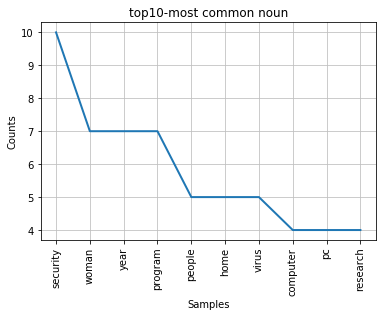

The document:32

Most frequent top-10 noun_keys words:  [('service', 15), ('tv', 15), ('music', 9), ('people', 6), ('download', 5), ('broadcast', 5), ('video', 5), ('phone', 5), ('report', 4), ('europe', 4)]


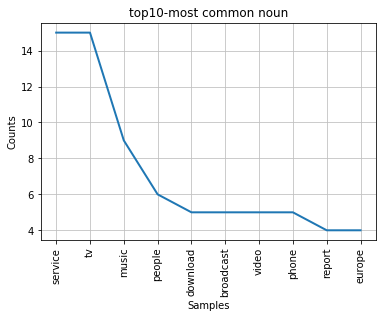

The document:33

Most frequent top-10 noun_keys words:  [('software', 7), ('student', 4), ('image', 4), ('note', 3), ('study', 3), ('develop', 2), ('order', 2), ('create', 2), ('colour', 2), ('music', 2)]


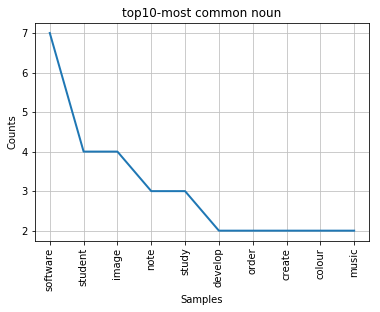

The document:34

Most frequent top-10 noun_keys words:  [('blogger', 7), ('sentence', 7), ('day', 7), ('iran', 4), ('campaign', 4), ('sigarchi', 3), ('journalist', 3), ('court', 3), ('authority', 3), ('jail', 2)]


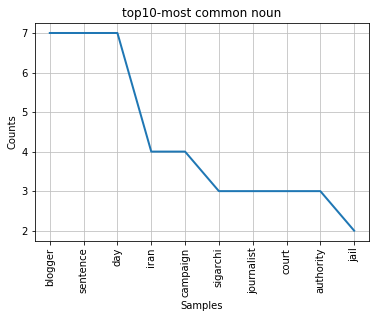

The document:35

Most frequent top-10 noun_keys words:  [('yahoo', 16), ('search', 11), ('year', 7), ('google', 7), ('internet', 6), ('weiner', 5), ('dot', 3), ('brand', 3), ('service', 3), ('technology', 3)]


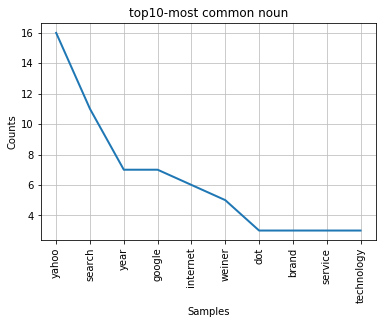

The document:36

Most frequent top-10 noun_keys words:  [('law', 7), ('council', 5), ('draft', 4), ('patent', 4), ('minister', 4), ('parliament', 4), ('software', 3), ('commission', 3), ('invention', 3), ('firm', 2)]


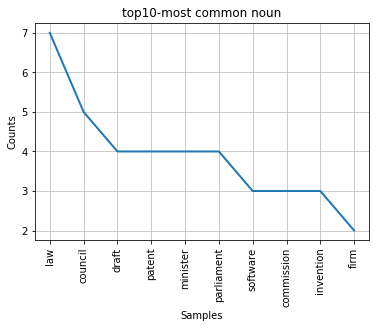

The document:37

Most frequent top-10 noun_keys words:  [('technology', 10), ('intel', 6), ('data', 5), ('wireless', 4), ('phone', 3), ('consumer', 3), ('connection', 2), ('standard', 2), ('year', 2), ('power', 2)]


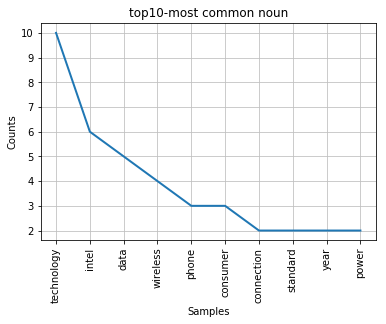

The document:38

Most frequent top-10 noun_keys words:  [('security', 8), ('network', 7), ('wi', 7), ('fi', 5), ('survey', 4), ('frankfurt', 4), ('data', 3), ('york', 3), ('netsurity', 3), ('wireless', 2)]


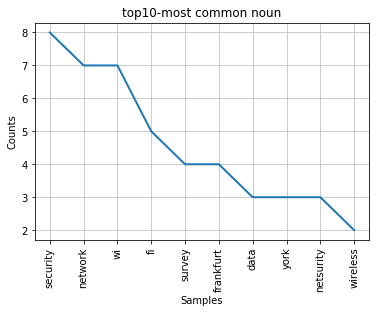

The document:39

Most frequent top-10 noun_keys words:  [('device', 6), ('sony', 5), ('psp', 5), ('gadget', 4), ('market', 4), ('game', 3), ('entertainment', 3), ('sell', 3), ('playstation', 2), ('sale', 2)]


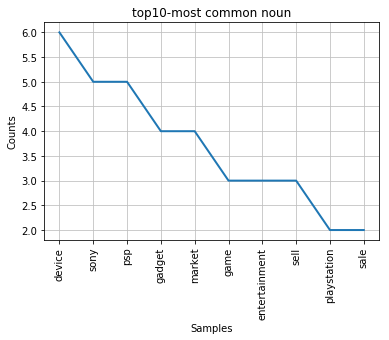

The document:40

Most frequent top-10 noun_keys words:  [('file', 14), ('court', 9), ('share', 7), ('firm', 6), ('peer', 6), ('network', 5), ('industry', 5), ('innovation', 5), ('music', 5), ('case', 5)]


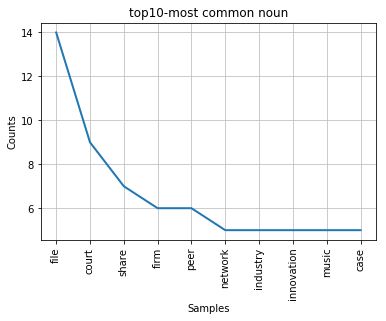

The document:41

Most frequent top-10 noun_keys words:  [('commodore', 9), ('computer', 7), ('brand', 5), ('home', 3), ('game', 3), ('music', 2), ('plan', 2), ('firm', 2), ('find', 1), ('life', 1)]


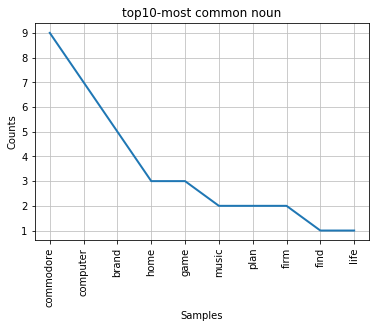

The document:42

Most frequent top-10 noun_keys words:  [('music', 23), ('phone', 11), ('pc', 11), ('mobile', 6), ('download', 5), ('market', 5), ('babinet', 5), ('player', 4), ('device', 4), ('work', 3)]


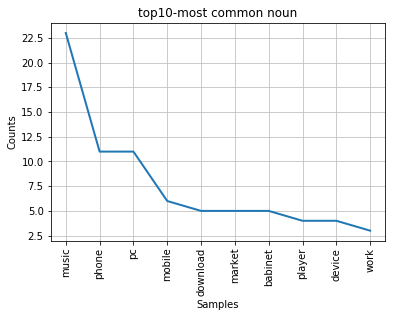

The document:43

Most frequent top-10 noun_keys words:  [('message', 11), ('phone', 10), ('people', 7), ('multimedia', 6), ('number', 5), ('customer', 5), ('firm', 5), ('network', 5), ('video', 4), ('operator', 4)]


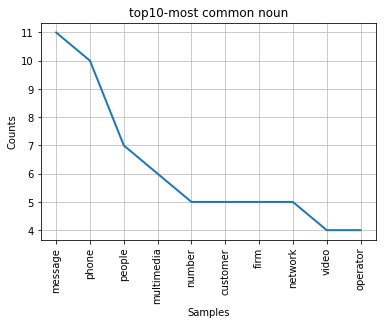

The document:44

Most frequent top-10 noun_keys words:  [('broadband', 8), ('people', 6), ('report', 5), ('access', 4), ('online', 3), ('encourage', 2), ('user', 2), ('site', 2), ('connection', 2), ('speed', 2)]


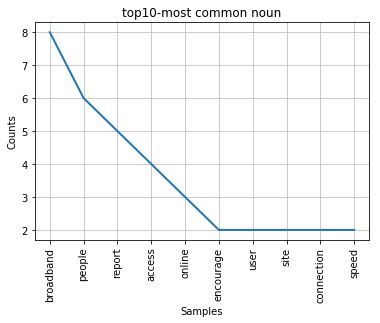

The document:45

Most frequent top-10 noun_keys words:  [('game', 7), ('machine', 5), ('xbox', 4), ('year', 4), ('generation', 3), ('console', 3), ('gamers', 3), ('developer', 3), ('sony', 3), ('release', 3)]


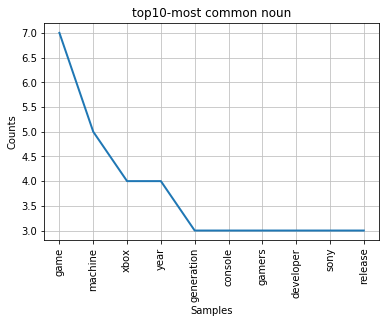

The document:46

Most frequent top-10 noun_keys words:  [('search', 14), ('engine', 10), ('result', 10), ('pay', 6), ('information', 6), ('user', 5), ('report', 4), ('research', 3), ('show', 3), ('question', 3)]


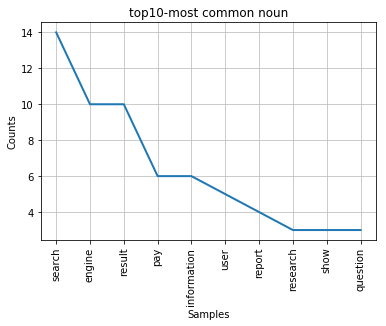

The document:47

Most frequent top-10 noun_keys words:  [('game', 9), ('award', 7), ('year', 4), ('title', 3), ('category', 3), ('half', 2), ('life', 2), ('bafta', 2), ('pc', 2), ('direction', 2)]


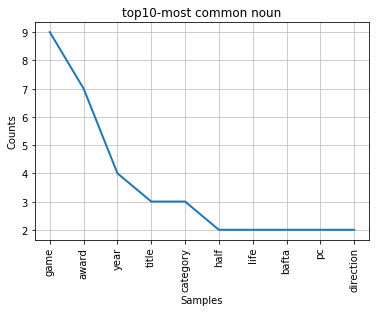

The document:48

Most frequent top-10 noun_keys words:  [('flaw', 7), ('security', 6), ('program', 5), ('fix', 4), ('release', 3), ('patch', 3), ('hole', 3), ('attack', 3), ('virus', 3), ('software', 3)]


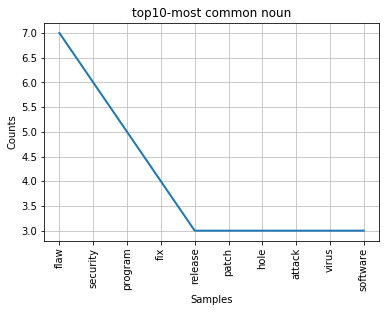

The document:49

Most frequent top-10 noun_keys words:  [('tag', 10), ('consumer', 9), ('rfid', 7), ('survey', 7), ('people', 6), ('technology', 5), ('concern', 3), ('group', 3), ('item', 3), ('privacy', 2)]


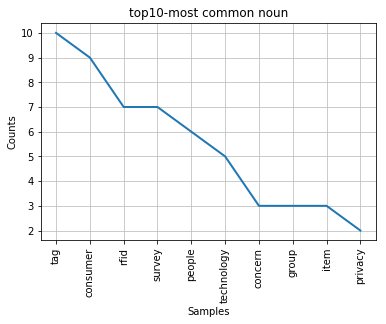

The document:50

Most frequent top-10 noun_keys words:  [('recycle', 9), ('energy', 8), ('power', 8), ('consumer', 7), ('technology', 6), ('electronics', 6), ('environment', 5), ('month', 4), ('market', 4), ('awareness', 4)]


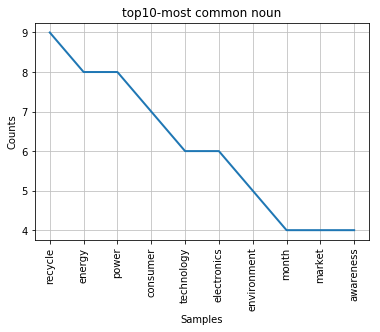

In [381]:
for index, row in df_handle.iterrows():
    print('The document:' + str(index))
    word_frequency = nltk.FreqDist(row['noun_keys'])
    #What are the top-10 most frequent words
    print("\nMost frequent top-10 noun_keys words: ", word_frequency.most_common(10))
    word_frequency.plot(10, title='top10-most common noun')
    print('='*100)

### For whole corpus

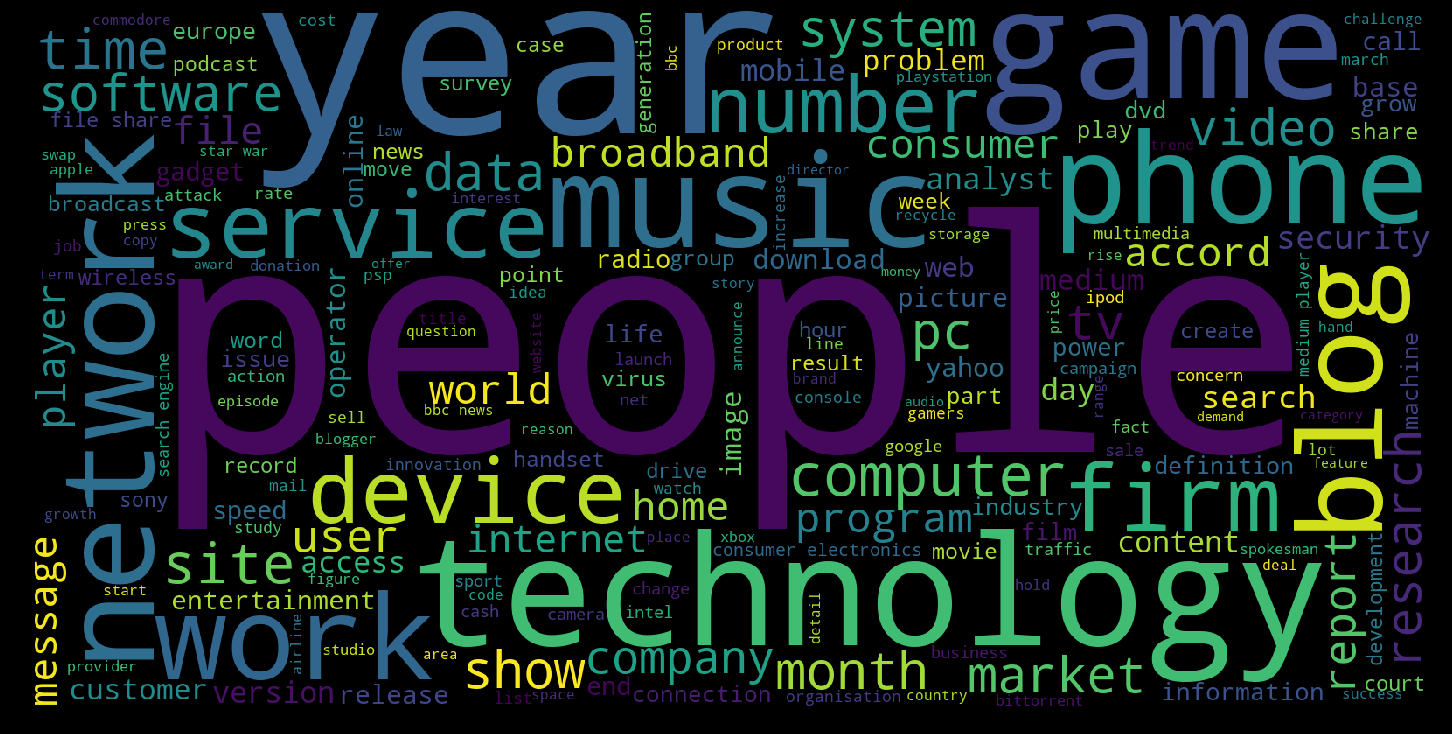

In [382]:
# Visualization: wordcloud for each category
list_noun_merge =  list(([item for items in df_handle.noun_keys.tolist() for item in items]))
wordcloudplot(list_noun_merge)


Most frequent top-10 words:  [('people', 133), ('year', 89), ('technology', 87), ('game', 87), ('music', 67), ('phone', 64), ('network', 59), ('blog', 53), ('firm', 52), ('work', 51)]


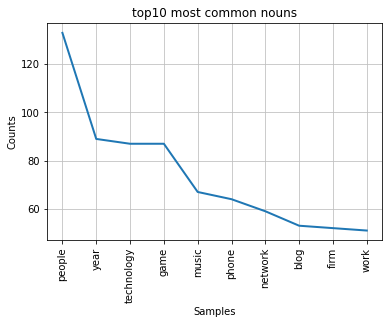

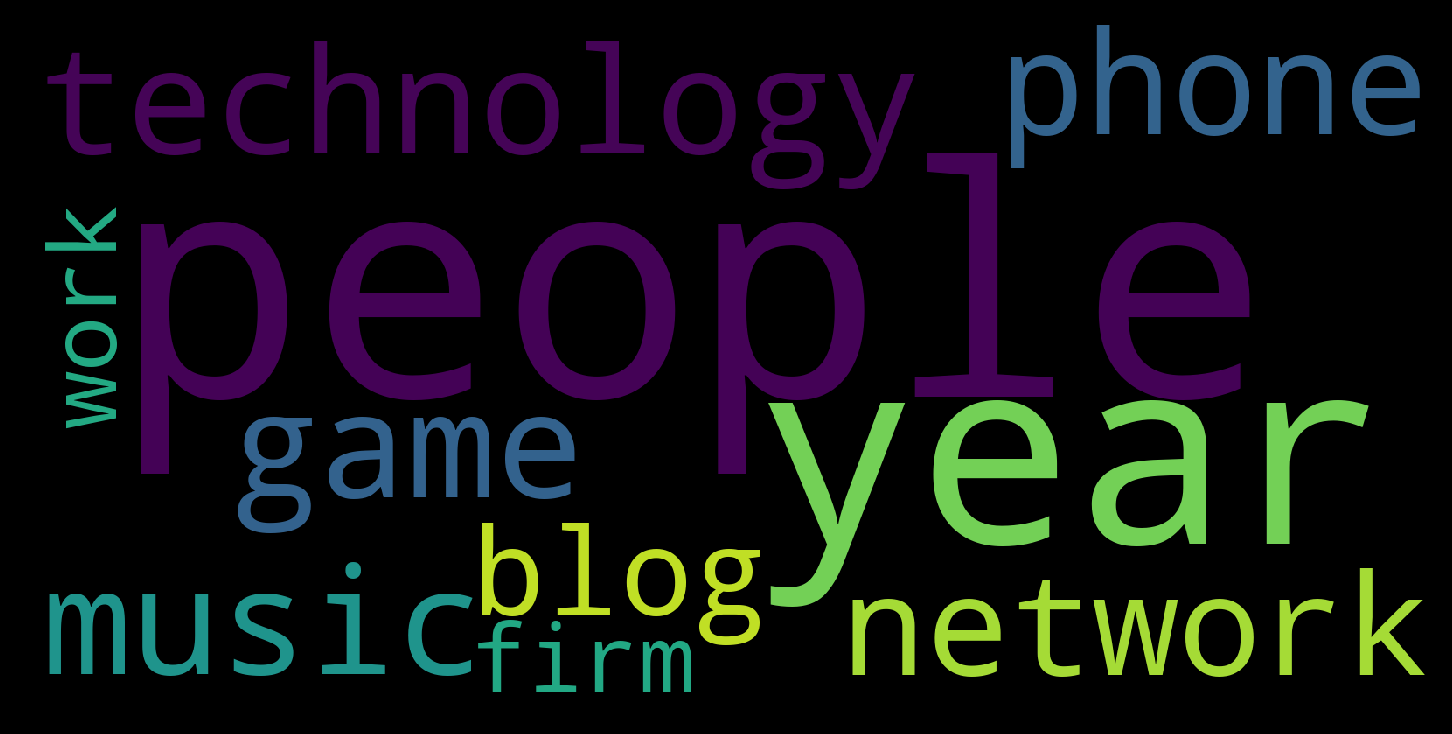

In [383]:
word_frequency = nltk.FreqDist(list_noun_merge)
#What are the top-10 most frequent words
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))
word_frequency.plot(10, title='top10 most common nouns')

print('='*100)

word_frequency =  nltk.FreqDist(list_noun_merge)
topw = [w[0]+':' + str(w[1]) for w in word_frequency.most_common(10)]
wordcloudplot(topw)

In [384]:
# def wordcloud_list(my_list):
#     import matplotlib.pyplot as plt
#     from collections import Counter
#     word_could_dict=Counter(my_list)
#     wordcloud = WordCloud(width = 1000, height = 500,background_color='white',colormap='Dark2').generate_from_frequencies(word_could_dict)

#     plt.figure(figsize=(15,10))
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()
#     plt.close()

In [385]:
ngrams = count_ngrams(list_noun_merge, min_length=2, max_length=3)
print_most_frequent(ngrams, num=10)

----- 10 most common 2-grams -----
file share: 14
consumer electronics: 13
search engine: 12
medium player: 11
bbc news: 9
star war: 9
news website: 8
tv programme: 6
video recorder: 6
music player: 6

----- 10 most common 3-grams -----
file share system: 4
bbc news website: 3
number blog existence: 3
fact number people: 3
analyst jupiter research: 3
camera phone send: 3
phone send multimedia: 3
send multimedia message: 3
music download service: 3
file share software: 3



## Find the Topic 

In [386]:
true_test_labels = ['business', 'entertainment', 'politics', 'sports', 'tech']

In [387]:

df_total_dist = pd.DataFrame(index=range(51),columns=true_test_labels)
for index, row in df_handle.iterrows():
#     print('The document:' + str(index))
    word_frequency = nltk.FreqDist(row['keywords'])
    t = word_frequency.most_common() 
    for each in true_test_labels:
        dist = 0
        for gram, count in t:
            dist = dist + nltk.edit_distance(each, gram)
        df_total_dist[each].iloc[index] = dist
df_total_dist   

business  entertainment  politics  sports  tech
0       1173           1744      1164     981   895
1        694           1056       702     594   523
2       1332           1968      1331    1091   981
3       1120           1682      1118     944   867
4       1500           2251      1498    1279  1145
5       1879           2807      1860    1557  1411
6        947           1432       934     788   718
7       1702           2481      1690    1480  1357
8        755           1149       762     648   600
9       1223           1799      1233    1029   981
10       908           1328       892     770   720
11      1903           2873      1886    1572  1435
12       767           1143       755     639   563
13      1765           2633      1782    1515  1415
14      1213           1793      1209    1033   914
15      1206           1780      1202    1024   928
16      1286           1895      1265    1068   994
17       455            717       465     378   337
18       842           1273       851     705   643
19       809           1232       812     664   589
20       925           1345       921     778   728
21      1137           1630      1088     965   910
22      1421           2136      1431    1205  1107
23      1027           1520      1022     853   759
24      1186           1784      1209    1004   904
25       378            586       387     317   273
26       854           1310       869     720   671
27       725           1082       725     629   571
28       909           1334       915     780   739
29       650            946       639     535   508
30      1195           1782      1204    1019   929
31      1146           1716      1171     984   893
32      1309           1913      1299    1100  1015
33       808           1193       795     679   616
34       973           1460       984     832   776
35      1555           2343      1586    1348  1212
36       810           1182       802     692   625
37       856           1291       864     726   660
38       816           1231       821     697   654
39       883           1360       896     735   653
40      1382           2000      1371    1204  1142
41       644            948       641     553   500
42      1349           2018      1357    1171  1078
43      1194           1796      1217    1011   912
44       826           1213       811     693   651
45       984           1415       966     838   759
46       732           1112       738     599   552
47       670            963       654     577   532
48       583            872       577     494   460
49       887           1284       890     769   702
50      1807           2608      1791    1538  1418

Smaller distance means closer to that topic!

In [388]:
print(dict(df_total_dist.sum()))
print('---'*10)
d = dict(df_total_dist.sum())
results = min(d, key=d.get)
print('The topic is: ' + results)

{'business': 54100, 'entertainment': 80409, 'politics': 54052, 'sports': 45804, 'tech': 41925}
------------------------------
The topic is: tech


## Find the different document

In [391]:
def computeTF(wdict,bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wdict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val >0 :
                idfDict[word] +=1
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N/float(val))
        
        return idfDict
    
def computeTFIDF(tfBow, idfs):
    tfidf ={}
    for word, val in tfBow.items():
        tfidf[word]= val*idfs[word]
    return tfidf

In [392]:
wordSet= list(set([item for items in df_handle.keywords.tolist() for item in items])) ## can use noun_keys

In [393]:
docList =[]
tfBow = []
for index, row in df_handle.iterrows():
#     print('The document:' + str(index))
    bowA = row['keywords']  ## can use noun_key
    wordDictA = dict.fromkeys(wordSet, 0)
    for word in bowA:
        wordDictA[word]+=1
    
    tfBowA = computeTF(wordDictA, bowA)
    tfBow.append(tfBowA)
    docList.append(wordDictA)
print('done')

done


In [394]:
idfs  = computeIDF(docList)
TF = pd.DataFrame([]) 
for each in tfBow:
    tfidfBow = computeTF(each, idfs)
    TF = TF.append(tfidfBow,1)
TF

abandon       ability  absolute    abtahi  abundance   academy    accept  \
0   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
1   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
2   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
3   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
4   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
5   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
6   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
7   0.000000  0.000000e+00  0.000000  0.000001   0.000000  0.000000  0.000000   
8   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
9   0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
10  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
11  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
12  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
13  0.000000  0.000000e+00  0.000001  0.000000   0.000001  0.000000  0.000000   
14  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
15  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
16  0.000000  9.967148e-07  0.000000  0.000000   0.000000  0.000000  0.000000   
17  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
18  0.000000  1.602374e-06  0.000000  0.000000   0.000000  0.000000  0.000000   
19  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
20  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
21  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
22  0.000000  9.937572e-07  0.000000  0.000000   0.000000  0.000000  0.000000   
23  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
24  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
25  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
26  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
27  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
28  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
29  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
30  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
31  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
32  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
33  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
34  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
35  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
36  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
37  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
38  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
39  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000002  0.000000   
40  0.000001  1.069956e-06  0.000000  0.000000   0.000000  0.000000  0.000000   
41  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
42  0.000000  1.017922e-06  0.000000  0.000000   0.000000  0.000000  0.000001   
43  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
44  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
45  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
46  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
47  0.000000  0.000000e+00  0.000000  0.000000   0.000000  0.000000  0.000000   
48  0.000000  0.000000e+00  0.000000

In [395]:
mean_vector = np.mean(TF)
rrr = pd.DataFrame(index=range(51),columns=['tomean'])
minx = 1000; results =0
for index, row in TF.iterrows():
    from scipy import spatial
    rrr.iloc[index].tomean = 1 - spatial.distance.cosine(row.values, mean_vector.values)
    if (minx > rrr.iloc[index].tomean):
        minx = rrr.iloc[index].tomean
        results = index

print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 36
With file name: 41


## HERE 1

In [396]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cosine_matrix =  cosine_similarity(TF.values)
df_cosine = pd.DataFrame(cosine_matrix,index=range(51),columns=range(51))

# print(dict(df_cosine.sum(axis=1)))
# print('---'*10)
d ={};i=0
for index, row in df_handle.iterrows():
    d[i] = (df_cosine.iloc[index].sum()) * sum(TF.iloc[index].values!=0)
    i = i+1
results = min(d, key=d.get)
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 17
With file name: 24


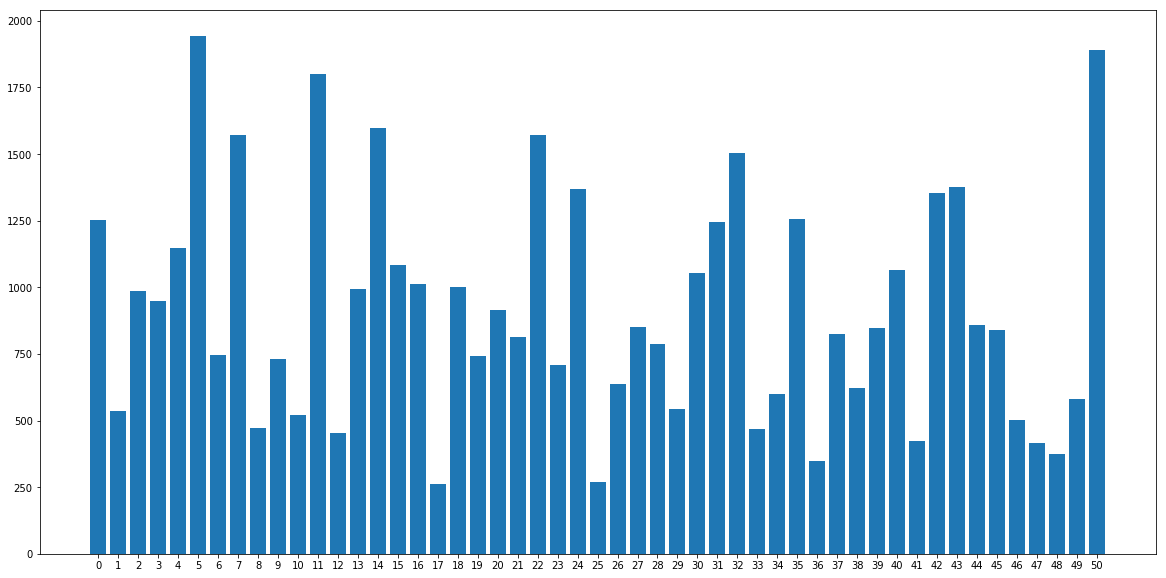

In [397]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))

plt.show()

In [398]:
print(df_handle.iloc[results].content)

US charity anthem is re-released We Are The World, the American charity anthem inspired by the success of Band Aid, has been re-issued to raise money for Aids research and tsunami victims. More than 40 stars sang as group USA For Africa, including Lionel Richie, Diana Ross, Ray Charles, Bob Dylan, Michael Jackson and Bruce Springsteen. It topped the charts in the US and UK, raising millions of dollars for African famine relief. The re-release also marks the 20th anniversary of the original recording. It has been re-issued as part of a two-disc DVD set, which will also feature footage from the recording session of the track in January 1985. The single was originally released in the US on 7 March 1985 and sold 800,000 copies in its first week. It went on to win Grammys for song of the year and record of the year.


In [399]:
# import seaborn as sns
# %matplotlib inline
# plt.figure(figsize=(20,20))
# sns.heatmap(df_cosine, annot=False,robust=True, fmt="f", cmap='RdBu_r', vmin=0, vmax=0.025)
# plt.show()

In [400]:
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import pandas

# threshold = 0.01
# data = df_cosine
# cmap = mpl.cm.ddcoolwarm
# norm = mpl.colors.Normalize(vmin=-1 * threshold, vmax=threshold)
# cmap.set_over('slategray')
# cmap.set_under('forestgreen')


# fig, ax = plt.subplots(figsize=(20,20))
# # plt.figure(figsize=(20,20))
# ax.set_aspect('equal')
# cb_ax=fig.add_axes([0.85, 0.1, 0.03, 0.8])
# img = ax.imshow(data, cmap=cmap, norm=norm, interpolation='none')
# cb = mpl.colorbar.ColorbarBase(cb_ax, cmap=cmap, norm=norm, extend='both')

@@@ Different

In [401]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None,smooth_idf=False)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(x) for x in df_handle.keywords])

In [402]:
su = sum(tfidf_matrix.toarray().T)
results = np.argmin(su)
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 25
With file name: 31


## HERE 2

In [403]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from numpy.linalg import norm

cosine_matrix_2 =  cosine_similarity(tfidf_matrix)
df_cosine = pd.DataFrame(cosine_matrix_2,index=range(51),columns=range(51))

d ={};i=1

for index, row in df_handle.iterrows():
    d[i] = (df_cosine.iloc[index].sum()) 
    i = i+1

    
# d = dict(df_cosine.sum(axis=1))
results = min(d, key=d.get)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

The PREDICTED topic is: 37
With file name: 42


## Checking Only!

In [404]:
# import seaborn as sns
# %matplotlib inline
# plt.figure(figsize=(20,20))
# sns.heatmap(df_cosine, annot=False,robust=True, fmt="f", cmap='RdBu_r', vmin=0, vmax=0.025)
# plt.show()

In [405]:
data_path = r'../../DATA/bbc-fulltext/bbc/entertainment/'



df_true = pd.DataFrame([],columns=['filename','content'])

for root, directories, files in os.walk(data_path):
    for filename in files:
        _name = os.path.splitext(filename)[0]
        filepath = os.path.join(root, filename)
        f = open(filepath,"r",encoding='latin-1') 
        content = f.read()
        content = " ".join(str(content).split())
#             content = str(content).replace("\n"," ")
        pieces = {'filename': _name, 'content': (content)}
        df_true = df_true.append(pieces,ignore_index=True)
# df_true.head(10)

In [406]:
for index1, row1 in df_handle.iterrows():
    for index2, row2 in df_true.iterrows():
        if(row1['content']==row2['content']):
            print('The true topic is:'+ str(index1))
            print('With file name: '+ str(df_handle.iloc[index1]['filename']))
            trueidx = index1
            break;

The true topic is:17
With file name: 24


In [407]:
print(df_handle.iloc[trueidx].content)

US charity anthem is re-released We Are The World, the American charity anthem inspired by the success of Band Aid, has been re-issued to raise money for Aids research and tsunami victims. More than 40 stars sang as group USA For Africa, including Lionel Richie, Diana Ross, Ray Charles, Bob Dylan, Michael Jackson and Bruce Springsteen. It topped the charts in the US and UK, raising millions of dollars for African famine relief. The re-release also marks the 20th anniversary of the original recording. It has been re-issued as part of a two-disc DVD set, which will also feature footage from the recording session of the track in January 1985. The single was originally released in the US on 7 March 1985 and sold 800,000 copies in its first week. It went on to win Grammys for song of the year and record of the year.


In [49]:
# def firstn(n):
#     num = 0
#     while num < n:
#         yield num
#         num += 1

# def to_n(n):
#     return np.arange(n)
        
# sum_of_first_n = (firstn(10))
# firstn2 = to_n(10)
# for i in sum_of_first_n:
#     print(i)
    
# for i in firstn2:
#     print(i)

## Check the folders

In [50]:
data_path = r'../../DATA/DistributedFolder/'

std_folders = [os.path.join(data_path, o) for o in os.listdir(data_path) 
                    if os.path.isdir(os.path.join(data_path,o))]

In [51]:
def find_distance_wordnet(word1,word2):
    from nltk.corpus import wordnet as wn
    max_similarity = 0
    for eachsyn in wn.synsets(word1):
        for eachsyn2 in wn.synsets(word2):
            if (eachsyn.path_similarity(eachsyn2) != None):
                if (float(eachsyn.path_similarity(eachsyn2))!=0):
                    max_similarity = max_similarity + eachsyn.path_similarity(eachsyn2)

    return max_similarity

print(find_distance_wordnet('cat','dog'))
print(find_distance_wordnet('cat','lion'))
print(find_distance_wordnet('cat','frog'))
print(find_distance_wordnet('electronic','technology'))
print(find_distance_wordnet('music','song'))
print(find_distance_wordnet('music','sing'))

6.471604371720467
4.086836247687642
2.7936008436008444
0
3.089036780213252
0


In [419]:
def read_raw(path):
    df_raw = pd.DataFrame([],columns=['filename','content'])

    for root, directories, files in os.walk(path):
        for filename in files:
            _name = os.path.splitext(filename)[0]
            filepath = os.path.join(root, filename)
            f = open(filepath,"r",encoding='latin-1') 
            content = f.read()
            content = " ".join(str(content).split())
    #             content = str(content).replace("\n"," ")
            pieces = {'filename': _name, 'content': (content)}
            df_raw = df_raw.append(pieces,ignore_index=True)
    return df_raw

def jaccard_similarity(tokens1, tokens2):
    """Return the Jaccard similarity between two lists of tokens."""
    tokens1_set = set(tokens1)
    tokens2_set = set(tokens2)
    return len(tokens1_set.intersection(tokens2_set)) / len(tokens1_set.union(tokens2_set))

def top_n(tokens, n):
    """Given a list of tokens, return the n most frequent."""
    frequency_counter = collections.Counter(tokens)
    top_n_pairs = frequency_counter.most_common(n)
    top_n_tokens, _ = zip(*top_n_pairs)  # separate the (word, frequency) pairs into two lists
    return top_n_tokens

In [ ]:
df_test_q9_q10 = pd.DataFrame(index=range(41),columns=['Name','Q9','Q10','Q101','Q102','Q103','Q104','Q105'])
i = 0
for each in std_folders:
    print(each)
    df_test_q9_q10['Name'].iloc[i] = str(each)
    df_raw = read_raw(each)
       
    ## df_handle_tmp
    df_handle_tmp = df_raw.copy()
    [n,d] = df_handle_tmp.shape
    df_handle_tmp['keywords'] = ['']*n

    for index, row in df_handle_tmp.iterrows():
        df_handle_tmp['keywords'].iloc[index] = text_to_keys(row['content'],0)
        
    ## insert noun_keys
    import nltk
    [n,d] = df_handle_tmp.shape
    df_handle_tmp['noun_keys'] = ['']*n

    for index, row in df_handle_tmp.iterrows():
        df_handle_tmp['noun_keys'].iloc[index] = extract_noun(" ".join(row['keywords']))
        
    ## TASK09:
    true_test_labels = ['business', 'entertainment', 'politics', 'sports', 'tech']

    df_total_dist = pd.DataFrame(index=range(51),columns=true_test_labels)
    for index, row in df_handle_tmp.iterrows():
    #     print('The document:' + str(index))
        word_frequency = nltk.FreqDist(row['keywords'])
        t = word_frequency.most_common(20) 
        for each in true_test_labels:
            dist = 0
            for gram, count in t:
                dist = dist + nltk.edit_distance(each, gram)
            df_total_dist[each].iloc[index] = dist 
            
    d = dict(df_total_dist.sum())
    result_9 = min(d, key=d.get)
    if result_9 == 'tech':
        df_test_q9_q10['Q9'].iloc[i] = 1
    else:
        df_test_q9_q10['Q9'].iloc[i] = 0
    
    ### TASK 10 ----- 
    ################## pairwise distance ##########
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(norm='l2',ngram_range=[1,3])
    tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(x) for x in df_handle_tmp.noun_keys])
    
    df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
    df_tfidf.head(10)
        
    from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
    cosine_matrix =  cosine_similarity(tfidf_matrix)
    df_cosine = pd.DataFrame(cosine_matrix,index=range(51),columns=range(51))
    
    d ={};j=0
    for index, row in df_handle_tmp.iterrows():
        d[j] = (df_cosine.iloc[index].sum() )
        j=j+1

    mean_vector = np.mean(df_tfidf)
    _mean_diff = pd.DataFrame(index=range(51),columns=['tomean'])
    minx = np.inf; result_tmp_3 =0
    for index, row in df_tfidf.iterrows():
        from scipy import spatial
        _mean_diff.iloc[index].tomean = 1 - spatial.distance.cosine(row.values, mean_vector.values)
        if (minx > _mean_diff.iloc[index].tomean):
            minx = _mean_diff.iloc[index].tomean
            result_tmp_3 = index

    
    ############# Distance to topic vectors ###################
    business_words = ['business','profit','market','employee','firm',
                      'risk','bank','company','management','marketing',
                      'commerce','enterprise'] 
    entertainment_words = ['entertainment','film','music','concert',
                           'newspaper','sitcom','star',
                           'singer','party','festival',
                           'celebration','comedy','guitarist','ballet',
                           'dancer','footstep','director',
                           'cartoon'] 
    politics_words = ['politic','labour','government','election',
                      'minister','nominee','union','affair']
    sports_words = ['sport','game','competition','winner','risk',
                    'athletic','match','racing','compete','football','player']
    tech_words = ['technology','mobile','technology','internet',
                  'computer','domain','definition','bandwidth', 
                  'cpu','server','game','3D','mechanic','developer',
                  'formula']


    keys = ([business_words,entertainment_words,politics_words,sports_words,tech_words])
    flat_list = [item for sublist in keys for item in sublist]

    df_keys_check = pd.DataFrame([],index=range(51),columns=true_test_labels)
    for index, row in df_handle_tmp.iterrows():
#         exists_keys = row.noun_keys
#         indx = 0
#         for eachgroup in keys:
#             dist = 0
#             for eachkey in eachgroup:
# #                 if (eachkey in exists_keys):
# #                     dist = dist + exists_keys.count(eachkey)/len(exists_keys)
#                 dist = dist + nltk.edit_distance(eachkey,word) * exists_keys.count(eachkey)
# #                 else:
# #                     dist = dist + 0
#             df_keys_check[true_test_labels[indx]].iloc[index] = dist 
#             indx +=1    
#         l2_norm = np.sqrt(1 + sum(df_keys_check.iloc[index]))
#         df_keys_check.iloc[index] = df_keys_check.iloc[index] / l2_norm
#         del l2_norm
    
        exists_keys = row.keywords
        indx = 0
        for eachgroup in keys:
            dist = jaccard_similarity(eachgroup, exists_keys)
            df_keys_check[true_test_labels[indx]].iloc[index] = dist 
            indx +=1    
#         l2_norm = np.sqrt(1 + sum(df_keys_check.iloc[index]))
#         df_keys_check.iloc[index] = df_keys_check.iloc[index] / l2_norm
#         del l2_norm
    
    from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
    cosine_matrix =  cosine_similarity(df_keys_check.values)
    df_cosine = pd.DataFrame(cosine_matrix,index=range(51),columns=range(51))

    mean_vector1 = np.mean(df_cosine)
    _mean_diff1 = pd.DataFrame(index=range(51),columns=['tomean'])
    minxxx = np.inf; result_tmp_31 =0
    for index, row in df_cosine.iterrows():
        from scipy import spatial
        _mean_diff1.iloc[index].tomean = 1 - spatial.distance.cosine(row.values, mean_vector1.values)
        if (minxxx > _mean_diff1.iloc[index].tomean):
            minxxx = _mean_diff1.iloc[index].tomean
            result_tmp_31 = index
        
    d1 ={};l=0
    for index, row in df_handle_tmp.iterrows():
        d1[l] = ((df_cosine.iloc[index].sum()))
        l = l+1

    ## ##############################################################
    def really_safe_normalise_in_place(d):
        import math, operator
        factor=1.0/math.fsum(d.values())
        for k in d:
            d[k] = d[k]*factor
        key_for_max = max(d.items(), key=operator.itemgetter(1))[0]
        diff = 1.0 - math.fsum(d.values())
        #print "discrepancy = " + str(diff)
        d[key_for_max] += diff
        return d
    

    result_tmp_1 = min(d, key=d.get)
    result_tmp_2 = min(d1, key=d1.get)
    result_tmp_4 = result_tmp_31
#     ############# Distance to wordnet ###################
    def find_distance_wordnet(word1,word2):
        from nltk.corpus import wordnet as wn
        max_similarity = 0
        for eachsyn in wn.synsets(word1):
            for eachsyn2 in wn.synsets(word2):
                if (eachsyn.path_similarity(eachsyn2) != None):
                    if max_similarity < (float(eachsyn.path_similarity(eachsyn2))):
                        max_similarity = eachsyn.path_similarity(eachsyn2)

        return max_similarity   
    
#     df_total_dist = pd.DataFrame(index=range(51),columns=true_test_labels)   
#     for index, row in df_handle_tmp.iterrows():
#         bowA = row['noun_keys']
#         dist = 0
#         for eachtopic in true_test_labels:
#             for word in bowA:
#                 dist = dist + find_distance_wordnet(eachtopic, word)
#             df_total_dist[eachtopic].iloc[index] = dist
             
    
    from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
    cosine_matrix2 =  cosine_similarity(df_keys_check.values)
    df_cosine2 = pd.DataFrame(cosine_matrix2,index=range(51),columns=range(51))

    mean_vector2 = np.mean(df_cosine2)
    _mean_diff2 = pd.DataFrame(index=range(51),columns=['tomean'])
    minxxx = np.inf; result_tmp_5 =0
    for index, row in df_cosine2.iterrows():
        from scipy import spatial
        _mean_diff2.iloc[index].tomean = 1 - spatial.distance.cosine(row.values, mean_vector2.values)
        if (minxxx > _mean_diff2.iloc[index].tomean):
            minxxx = _mean_diff2.iloc[index].tomean
            result_tmp_5 = index


#     theta = df_keys_check['tech'].values
#     indx_5 = np.where(theta==np.min(theta[np.nonzero(theta)]))

#     result_tmp_5 = int(indx_5[0])
        #######################################################
    result_10 = result_tmp_2
    #######################################################
    data_path = r'../../DATA/bbc-fulltext/bbc/entertainment/'

    df_true = pd.DataFrame([],columns=['filename','content'])

    for root, directories, files in os.walk(data_path):
        for filename in files:
            _name = os.path.splitext(filename)[0]
            filepath = os.path.join(root, filename)
            f = open(filepath,"r",encoding='latin-1') 
            content = f.read()
            content = " ".join(str(content).split())
    #             content = str(content).replace("\n"," ")
            pieces = {'filename': _name, 'content': (content)}
            df_true = df_true.append(pieces,ignore_index=True)
    
    
    for index1, row1 in df_handle_tmp.iterrows():
        for index2, row2 in df_true.iterrows():
            if(row1['content']==row2['content']):
                trueidx_tmp = index1
                break;
                
    if (str(df_handle_tmp.iloc[result_10]['filename']) == str(df_handle_tmp.iloc[trueidx_tmp]['filename'])):
        df_test_q9_q10['Q10'].iloc[i] = str(df_handle_tmp.iloc[trueidx_tmp]['filename'])
    else:
        df_test_q9_q10['Q10'].iloc[i] = str(df_handle_tmp.iloc[trueidx_tmp]['filename'])
     
    
    if (str(df_handle_tmp.iloc[result_tmp_1]['filename']) == str(df_handle_tmp.iloc[trueidx_tmp]['filename'])):
        df_test_q9_q10['Q101'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_1]['filename'])
    else:
        df_test_q9_q10['Q101'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_1]['filename'])
    
    if (str(df_handle_tmp.iloc[result_tmp_2]['filename']) == str(df_handle_tmp.iloc[trueidx_tmp]['filename'])):
        df_test_q9_q10['Q102'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_2]['filename'])
    else:
        df_test_q9_q10['Q102'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_2]['filename'])
        
    if (str(df_handle_tmp.iloc[result_tmp_3]['filename']) == str(df_handle_tmp.iloc[trueidx_tmp]['filename'])):
        df_test_q9_q10['Q103'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_3]['filename'])
    else:
        df_test_q9_q10['Q103'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_3]['filename'])
        
    if (str(df_handle_tmp.iloc[result_tmp_4]['filename']) == str(df_handle_tmp.iloc[trueidx_tmp]['filename'])):
        df_test_q9_q10['Q104'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_4]['filename'])
    else:
        df_test_q9_q10['Q104'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_4]['filename'])
        
    if (str(df_handle_tmp.iloc[result_tmp_5]['filename']) == str(df_handle_tmp.iloc[trueidx_tmp]['filename'])):
        df_test_q9_q10['Q105'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_5]['filename'])
    else:
        df_test_q9_q10['Q105'].iloc[i] = str(df_handle_tmp.iloc[result_tmp_5]['filename'])
    i = i+1
    del df_handle_tmp, trueidx_tmp

../../DATA/DistributedFolder/13354426_Lalor Clodagh
../../DATA/DistributedFolder/14376516_Jordan Michael
../../DATA/DistributedFolder/14497212_Mc Connell Cathal
../../DATA/DistributedFolder/15200836_Koudelka Lilah
../../DATA/DistributedFolder/15202696_Verma Ritik
../../DATA/DistributedFolder/15202780_Singh Suryansh
../../DATA/DistributedFolder/15303171_Goloba Hakeem
../../DATA/DistributedFolder/15312186_Kennedy Mark
../../DATA/DistributedFolder/15316046_Krishnan Aditya
../../DATA/DistributedFolder/15317451_Brierton Laura
../../DATA/DistributedFolder/15326961_Alabi Boluwade
../../DATA/DistributedFolder/15328671_Mullen Michael
../../DATA/DistributedFolder/15342516_Hamill Ray
../../DATA/DistributedFolder/15347736_Connors William
../../DATA/DistributedFolder/15348051_Condren Aonghus
../../DATA/DistributedFolder/15351401_Weakliam Cathal
../../DATA/DistributedFolder/15362981_Burke Elizabeth
../../DATA/DistributedFolder/15363761_Byrne Lucy
../../DATA/DistributedFolder/15370251_Kavanagh Sinead

In [ ]:
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q101),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q102),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q103),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q104),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q105),'/', len(df_test_q9_q10))
df_test_q9_q10

In [ ]:
def find_majority(k):
    myMap = {}
    maximum = ( '', 0 ) # (occurring element, occurrences)
    for n in k:
        if n in myMap: myMap[n] += 1
        else: myMap[n] = 1

        # Keep track of maximum on the go
        if myMap[n] > maximum[1]: maximum = (n,myMap[n])

    return maximum

In [ ]:
[n,d] = df_test_q9_q10.shape
df_test_q9_q10['SWE'] = ['']*n
for index1, row1 in df_test_q9_q10.iterrows():
        vector = [row1.Q101,row1.Q102,row1.Q104,row1.Q105]
        df_test_q9_q10['SWE'].iloc[index1] = find_majority(vector)[0]
df_test_q9_q10      

In [ ]:
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q101),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q102),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q103),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q104),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.Q105),'/', len(df_test_q9_q10))
print(sum(df_test_q9_q10.Q10==df_test_q9_q10.SWE),'/', len(df_test_q9_q10))
df_test_q9_q10.loc[df_test_q9_q10.Q10 != df_test_q9_q10.SWE]['Name']

## Difference to topic's vectors

In [ ]:
avdl  = np.mean([len(x) for x in(df_handle['keywords'])])

def find_distance_wordnet(word1,word2):
        from nltk.corpus import wordnet as wn
        max_similarity = 0
        for eachsyn in wn.synsets(word1):
            for eachsyn2 in wn.synsets(word2):
                if (eachsyn.path_similarity(eachsyn2) != None):
                    if max_similarity < (float(eachsyn.path_similarity(eachsyn2))):
                        max_similarity = eachsyn.path_similarity(eachsyn2)

        return max_similarity   

In [337]:
def find_distance_wordnet2(word1,word2):
    from nltk.corpus import wordnet as wn
    s1 = wn.synsets(word1)
    s2 = wn.synsets(word2)
    if s1 != [] and s2 != []:
        sy1 = s1[0]
        sy2 = s2[0]
        max_similarity = sy1.path_similarity(sy2)
        if max_similarity is not None:
            return max_similarity
        else: 
            return 0
    else:
        return 0

In [338]:
business_words = ['business','profit','market','employee','firm',
                  'risk','bank','company','management','marketing',
                  'commerce','enterprise'] 
entertainment_words = ['entertainment','film','music','concert',
                       'newspaper','sitcom','star',
                       'singer','party','festival',
                       'celebration','comedy','guitarist','ballet',
                       'dancer','footstep','director',
                       'cartoon'] 
politics_words = ['politic','labour','government','election',
                  'minister','nominee','union','affair']
sports_words = ['sport','game','competition','winner','risk',
                'athletic','match','racing','compete','football','player']
tech_words = ['technology','mobile','technology','internet',
              'computer','domain','definition','bandwidth', 
              'cpu','server','game','3D','mechanic','developer',
              'formula']



keys = ([business_words,entertainment_words,politics_words,sports_words,tech_words])
flat_list = [item for sublist in keys for item in sublist]

df_keys_check = pd.DataFrame([],index=range(51),columns=true_test_labels)
avdl  = np.mean([len(x) for x in(df_handle['keywords'])])

for index, row in df_handle.iterrows():
    exists_keys = row.keywords
    no_d = len(exists_keys)
    b = 0.3
    indx = 0
    for eachgroup in keys:
        dist = 0
        for eachkey in eachgroup:
            for word in exists_keys:
#               if (eachkey in exists_keys):
#                 exists_keys.count(eachkey)
                 dist = dist + find_distance_wordnet2(eachkey,word) 
#                 else:
#                     dist = dist + 0
        df_keys_check[true_test_labels[indx]].iloc[index] = dist 
        indx +=1    
    l2_norm = np.sqrt(sum(df_keys_check.iloc[index]))
    df_keys_check.iloc[index] = df_keys_check.iloc[index] / l2_norm
df_keys_check

business entertainment politics   sports     tech
0   7.78781       11.0968  4.24989  7.22389  9.68741
1   6.34259       8.96712   3.4736  5.57513  7.41643
2   7.64946        10.671  3.98387  7.52433  9.32923
3   8.14872        12.627  4.52583  7.43977  10.3464
4   6.58864       9.06172  3.50126  5.72585  7.55854
5   6.47963       9.44176  3.66832  5.84618  7.78828
6   5.26213        7.8897   2.9683  4.93967  6.50266
7    6.8411       10.1781   4.0015  6.13502  8.15854
8   5.87201       8.55373  3.22791  5.33835  7.15382
9   6.20339       9.24614  3.49672  5.81235  7.72509
10  4.84574       7.30953  2.74352  4.72837   6.0891
11  4.34751       6.67428  2.53186  3.94253  5.60696
12   6.0053       8.71658  3.32215   5.1989  7.01227
13  5.61037       8.22745  3.12926  5.11897  6.93746
14  5.65906       8.08956  3.06175  5.14616  6.79449
15  6.30248       9.06247  3.33229  6.08825  7.65867
16  5.44491       7.92624  2.98115  5.21281  6.64136
17   7.0148       10.8355  4.01145  6.36164  9.04314
18  6.38277       9.50841  3.65703  5.88604  8.00879
19  4.84574       7.30953  2.74352  4.72837   6.0891
20  7.13493       10.4033    3.965  6.41483  8.78449
21  5.40119       8.05213  3.06047  4.91758  6.47981
22  6.25958       9.44587  3.53955   5.7865  7.83098
23  5.28598       7.60966   3.0135  4.61335  6.27108
24  6.33978       9.45959  3.52441  6.18487  7.82408
25  6.99244       10.3192  3.86066  6.97855  8.53944
26  6.00065       8.86201  3.45657  5.40146  7.22513
27  4.36882       6.40228  2.53738  3.86866  5.24531
28  6.31195       9.13668   3.3866  5.48638  7.03344
29   6.1104       8.97647  3.38542  5.70351  7.46512
30  5.98311       9.11495  3.29977  5.45656  7.50185
31   5.9781       8.63662  3.16508  5.38334  7.35175
32  7.61211       10.8172  4.11618  6.76952  8.91756
33  7.08742       10.8046  4.00501  6.54671  8.80816
34  8.46703       12.1603  4.66369  7.59123  10.7619
35  5.92838       8.45284  3.19496  5.31982  7.22411
36  4.85647       7.03772  2.68991   4.2666  5.97152
37  8.41471       12.0761   4.6277  7.54396  10.7043
38   4.6343       6.37436  2.39559  4.03289  5.29764
39  6.49704        9.6123  3.59729  6.07239  8.50168
40  6.21885       9.17976  3.47597  5.66722  7.68606
41  6.22388       8.79921   3.4324  5.43854  7.28381
42  6.09446       8.90359   3.3595  5.53196  7.86639
43  5.23283       7.84784  3.01254  4.96917  6.64179
44  9.03118       13.1855  4.98424  9.06308  11.5926
45  5.72276       8.68349  3.28567  5.32151   7.0392
46  5.64825       8.11742  3.19479  5.06091  6.67507
47  4.90452       7.36891  2.80151  4.37833  6.47075
48  5.31894       8.22238  2.91642  5.21474   6.5878
49   5.2784        7.7382  2.87234  4.74753  6.48347
50  6.86845        9.4807  3.67488  5.78598  7.79916

In [339]:
theta = df_keys_check['tech'].values
i = np.where( theta==np.min(theta[np.nonzero(theta)]))
    
results = int(i[0])
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 27
With file name: 33


In [222]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cosine_matrix =  cosine_similarity(df_keys_check.values)
df_cosine = pd.DataFrame(cosine_matrix,index=range(51),columns=range(51))

d1 ={};i=0
for index, row in df_handle.iterrows():
    d1[i] = ((df_cosine.iloc[index].sum()))
    i = i+1

results = min(d1, key=d1.get)
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 1
With file name: 1


In [268]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, cosine_distances
cosine_matrix =  cosine_similarity(df_keys_check.values)
df_cosine = pd.DataFrame(cosine_matrix,index=range(51),columns=range(51))

mean_vector1 = np.mean(df_keys_check)
_mean_diff1 = pd.DataFrame(index=range(51),columns=['tomean'])
minxxx = np.inf; result_tmp_31 = 0
for index, row in df_keys_check.iterrows():
    from scipy import spatial
    _mean_diff1.iloc[index].tomean = (1 - float(cosine_distances([row.values], [mean_vector1.values])))
    if (minxxx > _mean_diff1.iloc[index].tomean):
        minxxx = _mean_diff1.iloc[index].tomean
        result_tmp_31 = index
    
results = result_tmp_31
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 1
With file name: 1


In [265]:
_mean_diff1

tomean
0    0.97173
1   0.342401
2   0.885914
3   0.892159
4   0.893685
5   0.878589
6    0.74991
7   0.453235
8   0.943078
9   0.889881
10  0.707914
11  0.909288
12  0.399554
13  0.930997
14  0.961871
15  0.777995
16  0.970771
17  0.849775
18  0.921172
19  0.707914
20  0.971754
21  0.608048
22  0.965062
23  0.919452
24  0.836471
25  0.752352
26  0.929222
27  0.941661
28  0.412273
29  0.660196
30  0.936022
31  0.925345
32  0.882529
33  0.888261
34  0.926032
35   0.97408
36   0.95201
37  0.926036
38  0.909235
39    0.9745
40  0.889881
41  0.687369
42   0.95913
43  0.919811
44  0.893958
45  0.543436
46  0.700617
47  0.953428
48   0.59157
49  0.945679
50  0.785321

In [226]:
def really_safe_normalise_in_place(d):
    import math, operator
    factor=1.0/math.fsum(d.values())
    for k in d:
        d[k] = d[k]*factor
    key_for_max = max(d.items(), key=operator.itemgetter(1))[0]
    diff = 1.0 - math.fsum(d.values())
    #print "discrepancy = " + str(diff)
    d[key_for_max] += diff
    return d
    
zzz = really_safe_normalise_in_place(d)
print(d)

{0: 0.01725645261529798, 1: 0.018305223144159, 2: 0.022611041560015054, 3: 0.019197570444782482, 4: 0.01753298430547533, 5: 0.017118769152196716, 6: 0.020503498135179692, 7: 0.018824201750149788, 8: 0.016026424260931323, 9: 0.019183557514199336, 10: 0.018455212752281076, 11: 0.022088027570364672, 12: 0.020641590825708135, 13: 0.02150976619438014, 14: 0.02039723809727633, 15: 0.016866151441251472, 16: 0.01697703626551378, 17: 0.02326936549953866, 18: 0.01576853933474928, 19: 0.017210087738974936, 20: 0.01863062472485294, 21: 0.013386290748240302, 22: 0.01909579156831636, 23: 0.01658791886153523, 24: 0.02221445359854803, 25: 0.023731132121753363, 26: 0.017603899287369724, 27: 0.020602611811108455, 28: 0.01589408008546347, 29: 0.021878714812815045, 30: 0.015500285848356988, 31: 0.017612507042068112, 32: 0.01763204698304883, 33: 0.018822150567558187, 34: 0.01811604017895791, 35: 0.011686275105288822, 36: 0.022797275763578536, 37: 0.019788909075591946, 38: 0.017693131469219713, 39: 0.020269

In [227]:
vvvv = really_safe_normalise_in_place(d1)
print(d1)

{0: 0.0223758910465515, 1: 0.009581580745515303, 2: 0.020490600331200332, 3: 0.021089003122095107, 4: 0.021357011770967833, 5: 0.02114554236530816, 6: 0.01771228365825835, 7: 0.011809824180605272, 8: 0.02172992459350692, 9: 0.02012676704139607, 10: 0.015981222208368347, 11: 0.021459936186043818, 12: 0.010763959263785736, 13: 0.022325233253780174, 14: 0.022351188824497357, 15: 0.017811349688174164, 16: 0.02268479752233289, 17: 0.020402077043739624, 18: 0.02102931503386699, 19: 0.015981222208368347, 20: 0.022553124010063215, 21: 0.015708003627092248, 22: 0.02249251426632096, 23: 0.021861876531067793, 24: 0.01915098753253329, 25: 0.01722303688486956, 26: 0.02190029023743318, 27: 0.022556110191291705, 28: 0.011330010266497147, 29: 0.016626013030983506, 30: 0.022290132330444475, 31: 0.022431400032934347, 32: 0.021624347965302205, 33: 0.0215005191759609, 34: 0.02117673220530115, 35: 0.022743926268504473, 36: 0.022285978663256194, 37: 0.02117683377139695, 38: 0.022105157714015736, 39: 0.02274

In [228]:
print([min(vvvv.values()),min(zzz.values())])

[0.009581580745515303, 0.011686275105288822]


In [229]:
c = { k: zzz.get(k, 0) + vvvv.get(k, 0)*10 for k in set(zzz) }
results = min(c, key=c.get)
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))


results = min(zzz, key=zzz.get)
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

results = min(vvvv, key=vvvv.get)
print('---'*10)
print('The PREDICTED topic is: ' + str(results))
print('With file name: ' + str(df_handle.iloc[results]['filename']))

------------------------------
The PREDICTED topic is: 1
With file name: 1
------------------------------
The PREDICTED topic is: 35
With file name: 40
------------------------------
The PREDICTED topic is: 1
With file name: 1


In [230]:
MALE = 'male'
FEMALE = 'female'
UNKNOWN = 'unknown'
BOTH = 'both'

MALE_WORDS = set([
    'guy','spokesman','chairman',"men's",'men','him',"he's",'his',
    'boy','boyfriend','boyfriends','boys','brother','brothers','dad',
    'dads','dude','father','fathers','fiance','gentleman','gentlemen',
    'god','grandfather','grandpa','grandson','groom','he','himself',
    'husband','husbands','king','male','man','mr','nephew','nephews',
    'priest','prince','son','sons','uncle','uncles','waiter','widower',
    'widowers'
])

FEMALE_WORDS = set([
    'heroine','spokeswoman','chairwoman',"women's",'actress','women',
    "she's",'her','aunt','aunts','bride','daughter','daughters','female',
    'fiancee','girl','girlfriend','girlfriends','girls','goddess',
    'granddaughter','grandma','grandmother','herself','ladies','lady',
    'lady','mom','moms','mother','mothers','mrs','ms','niece','nieces',
    'priestess','princess','queens','she','sister','sisters','waitress',
    'widow','widows','wife','wives','woman'
])

In [231]:
def genderize(words):

    mwlen = len(MALE_WORDS.intersection(words))
    fwlen = len(FEMALE_WORDS.intersection(words))

    if mwlen > 0 and fwlen == 0:
        return MALE
    elif mwlen == 0 and fwlen > 0:
        return FEMALE
    elif mwlen > 0 and fwlen > 0:
        return BOTH
    else:
        return UNKNOWN

In [232]:
from collections import Counter

def count_gender(sentences):

    sents = Counter()
    words = Counter()

    for sentence in sentences:
        gender = genderize(sentence)
        sents[gender] += 1
        words[gender] += len(sentence)

    return sents, words

In [233]:
import nltk

def parse_gender(text):

    sentences = [
        [word.lower() for word in nltk.word_tokenize(sentence)]
        for sentence in nltk.sent_tokenize(text)
    ]

    sents, words = count_gender(sentences)
    total = sum(words.values())

    for gender, count in words.items():
        pcent = (count / total) * 100
        nsents = sents[gender]

        print(
            "{:0.2f} % {} ({} sentences)".format(pcent, gender, nsents)
        )

In [234]:
parse_gender(df_handle.iloc[3]['content'])

68.83 % unknown (33 sentences)
31.17 % male (12 sentences)
